$$
d_{t+1}=\begin{cases} \dfrac{d_{t}}{2},\; d_{t}\bmod2=0\\\;\\ \dfrac{3\cdot d_{t}+1}{2},\; d_{t}\bmod2\ne0 \end{cases}
$$

$$
{3(2n+1)+1}={6n+4}=2(3n+2)
$$

| n                 | 0   | 1   | 2   | 3   |
| ----------------- | --- | --- | --- | --- |
| $d$ - нечет       | 1   | x   | x   | x   |
| $2d$              | 0   | 1   | x   | x   |
| $3d=2d+d$         | 1   | y   | y   | y   |
| $\dfrac{3d}{2}$   | y   | y   | y   | y   |
| $\dfrac{3d}{2}+1$ | z   | z   | z   | z   |
| $3d+1$            | 0   | z   | z   | z   |
| $\dfrac{3d+1}{2}$ | z   | z   | z   | z   |

$$
\dfrac{3(2n+1)}{2}+1=\dfrac{6n+5}{2}=3n+2+\frac{1}{2}
$$
При $d$ - нечетном и делении нацело: $\dfrac{3d+1}{2}\sim\dfrac{3d}{2}+1=\dfrac{d}{2}+d+1$

```verilog
module collatz(
 input [16:0] d,
 output [32:0] res
);
 assign res = (d >> 1) + ((d[0]==1) ? (d + 1) : 0);
endmodule
```

Функция, определяющая максимальное деление на 2.

$$
\text{leg}_{2}(n\cdot2^k)=n
$$

Пока это математически не представимо, но представимо в схемотехнике с помощью Приоритетного шифратора



```verilog
module CollatzFunc #(
    WIDTH = 8,
    localparam ENC_WIDTH = $clog2(WIDTH))(
    input [WIDTH-1:0] dataIn,
    output [WIDTH-1:0] dataOut,
    output error
);
    wire [WIDTH-1:0] preResult;
    assign preResult = (dataIn >> 1) + ((dataIn[0])? (dataIn+1):0);  

    reg [ENC_WIDTH-1:0] encs;
    integer n, flag;
    always @(preResult)begin
        encs = 0;
        flag = 0;
        for(n = 0; n <= WIDTH-1; n = n + 1)
            if(preResult[n] & ~flag) begin
                encs = n;
                flag = 1;
            end
    end

    assign error = preResult == 0;
    assign dataOut = preResult >> encs;    
    
endmodule
```

In [2]:
def leg(m, n):
    p = m
    a = 0
    while (p%n==0):
        p//=n
        a+=1
    return a, p
leg(26,2)

(1, 13)

In [3]:
import numpy as np
def collatz(start):
    m = start
    arr = [m]
    while m!=1:
        # m = (m >> 1) + ((m + 1) if (m%2==1) else 0)
        m = (leg((m >> 1) + (m + 1),2)[1] if (m%2==1) else leg(m,2)[1])
        arr.append(m)
    return np.arange(len(arr)), np.array(arr)
collatz(26)

(array([0, 1, 2, 3]), array([26, 13,  5,  1]))

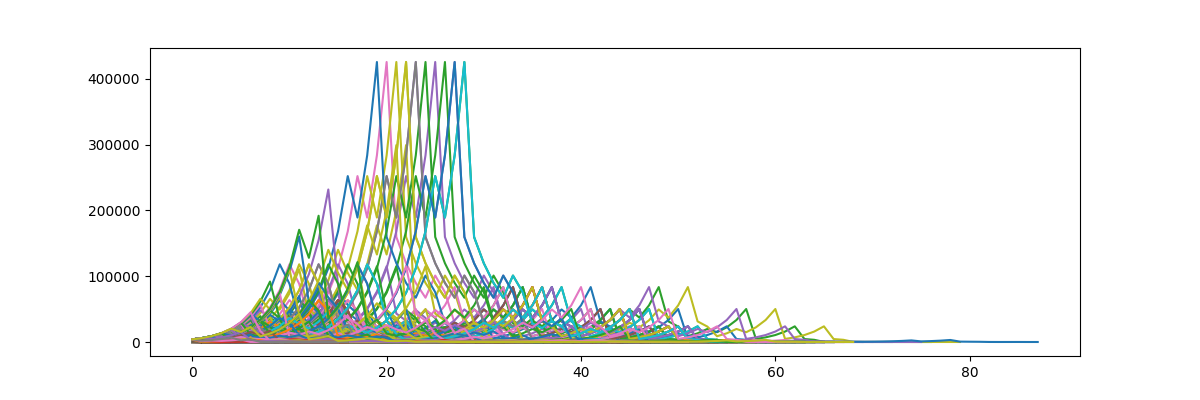

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
for i in range(1,4000):
    plt.plot(*collatz(i))

# Описание

Модель автомата, который проверяет натуральные числа на [Гипотезу Коллатца](https://ru.wikipedia.org/wiki/Гипотеза_Коллатца)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   version="1.1"
   viewBox="0 0 2110 1301"
   id="svg4796"
   sodipodi:docname="Kollatz's Machine.svg"
   inkscape:version="1.2.2 (732a01da63, 2022-12-09)"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg">
  <defs
     id="defs4800" />
  <sodipodi:namedview
     id="namedview4798"
     pagecolor="#ffffff"
     bordercolor="#000000"
     borderopacity="0.25"
     inkscape:showpageshadow="2"
     inkscape:pageopacity="0.0"
     inkscape:pagecheckerboard="0"
     inkscape:deskcolor="#d1d1d1"
     showgrid="false"
     inkscape:zoom="0.18139892"
     inkscape:cx="234.29025"
     inkscape:cy="606.39831"
     inkscape:window-width="2560"
     inkscape:window-height="1490"
     inkscape:window-x="1668"
     inkscape:window-y="1137"
     inkscape:window-maximized="1"
     inkscape:current-layer="svg4796" />
  <rect
     style="fill:#ffffff;stroke-width:1.88976;stroke-linecap:round;stroke-linejoin:round;stroke-miterlimit:0;paint-order:fill markers stroke"
     id="rect7480"
     width="2110"
     height="1301"
     x="0"
     y="0" />
  <g
     id="g7322">
    <polyline
       fill="none"
       points="1315,825 1315,915 1295,915"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2" />
    <polyline
       fill="none"
       points="865,825 865,915 845,915"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline4" />
    <polyline
       fill="none"
       points="925,765 925,755 935,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline6" />
    <polyline
       fill="none"
       points="1845,645 1255,645 1255,755 1245,755"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline8" />
    <polyline
       fill="none"
       points="475,765 475,755 485,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline10" />
    <polyline
       fill="none"
       points="135,105 135,115 45,115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline12" />
    <polyline
       fill="none"
       points="1495,825 1495,915 1475,915"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline14" />
    <polyline
       fill="none"
       points="1045,825 1045,915 1025,915"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline16" />
    <polyline
       fill="none"
       points="595,825 595,915 575,915"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline18" />
    <polyline
       fill="none"
       points="1555,765 1555,755 1565,755"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline20" />
    <polyline
       fill="none"
       points="1105,765 1105,755 1115,755"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline22" />
    <polyline
       fill="none"
       points="1735,1065 1745,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline24" />
    <polyline
       fill="none"
       points="1815,1095 1725,1095 1725,1045 1745,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline26" />
    <polyline
       fill="none"
       points="445,105 445,125"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline28" />
    <polyline
       fill="none"
       points="915,105 915,115 995,115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline30" />
    <polyline
       fill="none"
       points="1605,1065 1615,1065 1615,1085 1555,1085 1555,1065 1565,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline32" />
    <polyline
       fill="none"
       points="655,765 655,755 665,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline34" />
    <polyline
       fill="none"
       points="1615,1085 1615,1115"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline36" />
    <polyline
       fill="none"
       points="315,105 315,115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline38" />
    <polyline
       fill="none"
       points="665,245 685,245 685,205 645,205 645,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline40" />
    <polyline
       fill="none"
       points="1155,1065 1165,1065 1165,1085 1105,1085 1105,1065 1115,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline42" />
    <polyline
       fill="none"
       points="1675,825 1675,915 1655,915"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline44" />
    <polyline
       fill="none"
       points="1165,1085 1165,1115"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline46" />
    <polyline
       fill="none"
       points="705,1065 715,1065 715,1085 655,1085 655,1065 665,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline48" />
    <polyline
       fill="none"
       points="1225,825 1225,915 1205,915"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline50" />
    <polyline
       fill="none"
       points="1595,1025 1615,1025 1615,1045 1605,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline52" />
    <polyline
       fill="none"
       points="715,1085 715,1115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline54" />
    <polyline
       fill="none"
       points="1145,1025 1165,1025 1165,1045 1155,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline56" />
    <polyline
       fill="none"
       points="245,105 245,125 335,125"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline58" />
    <polyline
       fill="none"
       points="775,825 775,915 755,915"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline60" />
    <polyline
       fill="none"
       points="395,1045 375,1045 375,1095 455,1095 455,1065 475,1065 485,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline62" />
    <polyline
       fill="none"
       points="1735,765 1735,755 1745,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline64" />
    <polyline
       fill="none"
       points="1475,825 1475,845 1565,845 1565,825"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline66" />
    <polyline
       fill="none"
       points="695,1025 715,1025 715,1045 705,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline68" />
    <polyline
       fill="none"
       points="215,205 215,235 225,235"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline70" />
    <polyline
       fill="none"
       points="1285,765 1285,755 1295,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline72" />
    <polyline
       fill="none"
       points="1785,995 1865,995 1865,1085 1845,1085"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline74" />
    <polyline
       fill="none"
       points="95,1105 95,1285 295,1285"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline76" />
    <polyline
       fill="none"
       points="1025,825 1025,845 1115,845 1115,825"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline78" />
    <polyline
       fill="none"
       points="1345,825 1345,855 1335,855 1335,905 1345,905"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline80" />
    <polyline
       fill="none"
       points="1465,1065 1475,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline82" />
    <polyline
       fill="none"
       points="1185,825 1185,835 1275,835 1365,835 1365,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline84" />
    <polyline
       fill="none"
       points="835,765 835,755 845,755"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline86" />
    <polyline
       fill="none"
       points="1845,1105 1875,1105"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline88" />
    <polyline
       fill="none"
       points="1905,845 1935,845 1935,835"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline90" />
    <polyline
       fill="none"
       points="1795,1085 1795,1115"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline92" />
    <polyline
       fill="none"
       points="735,895 735,885 765,885 765,955 825,955 825,935"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline94" />
    <polyline
       fill="none"
       points="1955,715 1975,715"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline96" />
    <polyline
       fill="none"
       points="895,825 895,855 885,855 885,905 895,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline98" />
    <polyline
       fill="none"
       points="915,205 915,235 925,235"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline100" />
    <polyline
       fill="none"
       points="45,125 155,125 245,125"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline102" />
    <polyline
       fill="none"
       points="615,25 675,25 675,175 705,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline104" />
    <polyline
       fill="none"
       points="325,25 365,25 365,175 405,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline106" />
    <polyline
       fill="none"
       points="575,825 575,845 665,845 665,825"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline108" />
    <polyline
       fill="none"
       points="1335,1065 1345,1065 1345,1085 1285,1085 1285,1065 1295,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline110" />
    <polyline
       fill="none"
       points="1015,1065 1025,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline112" />
    <polyline
       fill="none"
       points="1025,115 1035,115 1035,125 1035,155 1025,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline114" />
    <polyline
       fill="none"
       points="735,825 735,835 825,835 915,835 915,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline116" />
    <polyline
       fill="none"
       points="1895,1105 1955,1105 1955,715 1735,715 1645,715 1645,735 1655,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline118" />
    <polyline
       fill="none"
       points="705,755 715,755 715,575 1845,575"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline120" />
    <polyline
       fill="none"
       points="745,155 755,155 755,205 715,205 695,205 695,275 615,275 615,255 625,255"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline122" />
    <polyline
       fill="none"
       points="1605,755 1615,755 1615,685 1845,685"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline124" />
    <polyline
       fill="none"
       points="515,1005 525,1005 525,995 615,995 615,1005 605,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline126" />
    <polyline
       fill="none"
       points="1345,1085 1345,1115"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline128" />
    <polyline
       fill="none"
       points="835,25 875,25 875,175 895,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline130" />
    <polyline
       fill="none"
       points="1725,825 1725,835 1635,835 1635,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline132" />
    <polyline
       fill="none"
       points="445,825 445,855 435,855"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline134" />
    <polyline
       fill="none"
       points="575,735 565,735 565,715 655,715 655,735 665,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline136" />
    <polyline
       fill="none"
       points="885,1065 895,1065 895,1085 835,1085 835,1065 845,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline138" />
    <polyline
       fill="none"
       points="935,155 945,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline140" />
    <polyline
       fill="none"
       points="1865,1085 1875,1085"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline142" />
    <polyline
       fill="none"
       points="1615,925 1605,925 1605,945 1685,945 1685,905 1695,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline144" />
    <polyline
       fill="none"
       points="185,855 185,875 305,875 305,475 325,475"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline146" />
    <polyline
       fill="none"
       points="335,105 335,125 445,125 535,125 625,125 625,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline148" />
    <polyline
       fill="none"
       points="1475,1045 1455,1045 1455,1095 1535,1095 1535,1065 1555,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline150" />
    <polyline
       fill="none"
       points="845,825 845,845 935,845 1025,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline152" />
    <polyline
       fill="none"
       points="885,735 905,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline154" />
    <polyline
       fill="none"
       points="925,25 965,25 965,175 985,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline156" />
    <polyline
       fill="none"
       points="565,1065 575,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline158" />
    <polyline
       fill="none"
       points="1405,825 1405,915 1385,915"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline160" />
    <polyline
       fill="none"
       points="175,105 175,245 165,245"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline162" />
    <polyline
       fill="none"
       points="1775,1025 1795,1025 1795,1045 1785,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline164" />
    <polyline
       fill="none"
       points="895,1085 895,1115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline166" />
    <polyline
       fill="none"
       points="1275,825 1275,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline168" />
    <polyline
       fill="none"
       points="285,5 375,5 485,5"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline170" />
    <polyline
       fill="none"
       points="805,905 795,905 795,855 795,775 815,775 815,735 795,735"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline172" />
    <polyline
       fill="none"
       points="1165,925 1155,925 1155,945 1235,945 1235,905 1245,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline174" />
    <polyline
       fill="none"
       points="435,735 455,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline176" />
    <polyline
       fill="none"
       points="265,245 285,245 285,205 265,205 265,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline178" />
    <polyline
       fill="none"
       points="385,845 485,845 575,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline180" />
    <polyline
       fill="none"
       points="1685,1025 1705,1025 1705,1045 1695,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline182" />
    <polyline
       fill="none"
       points="385,1015 395,1015"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline184" />
    <polyline
       fill="none"
       points="1025,1045 1005,1045 1005,1095 1085,1095 1085,1065 1105,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline186" />
    <polyline
       fill="none"
       points="435,1065 445,1065 445,1085 385,1085 385,1065 395,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline188" />
    <polyline
       fill="none"
       points="425,105 425,115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline190" />
    <polyline
       fill="none"
       points="1325,1025 1345,1025 1345,1045 1335,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline192" />
    <polyline
       fill="none"
       points="625,125 745,125 845,125 845,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline194" />
    <polyline
       fill="none"
       points="825,825 825,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline196" />
    <polyline
       fill="none"
       points="955,825 955,915 935,915"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline198" />
    <polyline
       fill="none"
       points="1155,755 1165,755 1165,635 1845,635"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline200" />
    <polyline
       fill="none"
       points="445,1085 445,1115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline202" />
    <polyline
       fill="none"
       points="745,105 745,125"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline204" />
    <polyline
       fill="none"
       points="575,1045 555,1045 555,1095 635,1095 635,1065 655,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline206" />
    <polyline
       fill="none"
       points="795,5 885,5 975,5 1045,5 1045,35 1065,35"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline208" />
    <polyline
       fill="none"
       points="715,925 705,925 705,945 785,945 785,905 795,905"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline210" />
    <polyline
       fill="none"
       points="1235,1025 1255,1025 1255,1045 1245,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline212" />
    <polyline
       fill="none"
       points="875,1025 895,1025 895,1045 885,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline214" />
    <polyline
       fill="none"
       points="935,105 935,125 1035,125"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline216" />
    <polyline
       fill="none"
       points="1655,825 1655,845 1745,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline218" />
    <polyline
       fill="none"
       points="505,825 505,915 485,915"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline220" />
    <polyline
       fill="none"
       points="715,205 715,235 725,235"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline222" />
    <polyline
       fill="none"
       points="135,115 225,115 315,115 425,115 515,115 515,105"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline224" />
    <polyline
       fill="none"
       points="1935,845 1935,985 105,985"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline226" />
    <polyline
       fill="none"
       points="1465,765 1465,755 1475,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline228" />
    <polyline
       fill="none"
       points="1905,865 1925,865 1925,885 1835,885 1835,735 1805,735 1805,705 1845,705"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline230" />
    <polyline
       fill="none"
       points="795,1045 805,1045 805,1025 785,1025"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline232" />
    <polyline
       fill="none"
       points="965,245 985,245 985,205 955,205 955,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline234" />
    <polyline
       fill="none"
       points="1205,825 1205,845 1295,845 1295,825"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline236" />
    <polyline
       fill="none"
       points="1525,825 1525,855 1515,855"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline238" />
    <polyline
       fill="none"
       points="1735,715 1735,735 1745,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline240" />
    <polyline
       fill="none"
       points="145,1105 145,1245 295,1245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline242" />
    <polyline
       fill="none"
       points="1885,625 1935,625 1935,835 1905,835"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline244" />
    <polyline
       fill="none"
       points="1695,995 1695,1005 1685,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline246" />
    <polyline
       fill="none"
       points="795,1065 805,1065 805,1085 805,1115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline248" />
    <polyline
       fill="none"
       points="425,1025 445,1025 445,1045 435,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline250" />
    <polyline
       fill="none"
       points="1365,895 1365,885 1395,885 1395,955 1455,955 1455,935"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline252" />
    <polyline
       fill="none"
       points="1015,765 1015,755 1025,755"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline254" />
    <polyline
       fill="none"
       points="735,25 775,25 775,175 805,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline256" />
    <polyline
       fill="none"
       points="1645,1065 1655,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline258" />
    <polyline
       fill="none"
       points="1365,835 1455,835 1545,835 1545,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline260" />
    <polyline
       fill="none"
       points="445,225 445,215 475,215 475,285 545,285 545,265"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline262" />
    <polyline
       fill="none"
       points="885,995 975,995 1065,995 1065,1005 1055,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline264" />
    <polyline
       fill="none"
       points="925,715 1015,715 1105,715 1105,735 1115,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline266" />
    <polyline
       fill="none"
       points="1785,1065 1795,1065 1795,1085 1735,1085 1735,1065 1735,1055 1715,1055 1715,1095 1635,1095 1635,1045 1655,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline268" />
    <polyline
       fill="none"
       points="855,155 855,205 815,205 815,235 825,235"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline270" />
    <polyline
       fill="none"
       points="1285,715 1285,735 1295,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline272" />
    <polyline
       fill="none"
       points="1075,825 1075,855 1065,855"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline274" />
    <polyline
       fill="none"
       points="1545,935 1545,955 1485,955 1485,885 1455,885 1455,895"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline276" />
    <polyline
       fill="none"
       points="195,5 195,155 205,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline278" />
    <polyline
       fill="none"
       points="915,895 915,885 945,885 945,955 1005,955 1005,935"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline280" />
    <polyline
       fill="none"
       points="755,825 755,845 845,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline282" />
    <polyline
       fill="none"
       points="145,855 145,885 295,885 295,435 325,435"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline284" />
    <polyline
       fill="none"
       points="1245,995 1245,1005 1235,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline286" />
    <polyline
       fill="none"
       points="1195,1065 1205,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline288" />
    <polyline
       fill="none"
       points="885,755 895,755 895,595 1845,595"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline290" />
    <polyline
       fill="none"
       points="845,125 935,125"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline292" />
    <polyline
       fill="none"
       points="1785,885 1785,945 1695,945 1695,925 1705,925"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline294" />
    <polyline
       fill="none"
       points="1775,1005 1785,1005 1785,995 1695,995 1605,995 1605,1005 1595,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline296" />
    <polyline
       fill="none"
       points="475,715 565,715"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline298" />
    <polyline
       fill="none"
       points="115,155 105,155 105,5 195,5 285,5 285,155 295,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline300" />
    <polyline
       fill="none"
       points="1515,735 1535,735"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline302" />
    <polyline
       fill="none"
       points="915,835 1005,835 1095,835 1095,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline304" />
    <polyline
       fill="none"
       points="1565,845 1655,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline306" />
    <polyline
       fill="none"
       points="565,765 565,755 575,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline308" />
    <polyline
       fill="none"
       points="2005,705 2035,705"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline310" />
    <polyline
       fill="none"
       points="1525,1085 1525,1115"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline312" />
    <polyline
       fill="none"
       points="495,105 495,135 545,135 545,155 545,205 515,205 495,205 495,275 415,275 415,255 425,255"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline314" />
    <polyline
       fill="none"
       points="795,995 795,1005 785,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline316" />
    <polyline
       fill="none"
       points="1845,605 985,605 985,755 975,755"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline318" />
    <polyline
       fill="none"
       points="245,1105 245,1165 295,1165"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline320" />
    <polyline
       fill="none"
       points="465,895 465,885 495,885 495,955 555,955 555,935"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline322" />
    <polyline
       fill="none"
       points="225,105 225,115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline324" />
    <polyline
       fill="none"
       points="205,105 205,135 255,135 255,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline326" />
    <polyline
       fill="none"
       points="625,825 625,855 615,855"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline328" />
    <polyline
       fill="none"
       points="1095,935 1095,955 1035,955 1035,885 1005,885 1005,895"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline330" />
    <polyline
       fill="none"
       points="835,715 835,735 845,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline332" />
    <polyline
       fill="none"
       points="1325,1005 1335,1005 1335,995 1245,995 1155,995 1155,1005 1145,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline334" />
    <polyline
       fill="none"
       points="1205,735 1195,735 1195,715 1285,715 1375,715 1375,735 1385,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline336" />
    <polyline
       fill="none"
       points="1335,905 1325,905 1325,945 1245,945 1245,925 1255,925"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline338" />
    <polyline
       fill="none"
       points="145,25 145,15 185,15 185,175 205,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline340" />
    <polyline
       fill="none"
       points="525,755 535,755 535,555 1845,555"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline342" />
    <polyline
       fill="none"
       points="975,215 975,275 915,275 915,255 925,255"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline344" />
    <polyline
       fill="none"
       points="465,825 465,835 555,835 645,835 645,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline346" />
    <polyline
       fill="none"
       points="155,155 165,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline348" />
    <polyline
       fill="none"
       points="1435,905 1425,905 1425,855 1425,775 1445,775 1445,735 1425,735"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline350" />
    <polyline
       fill="none"
       points="1115,845 1205,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline352" />
    <polyline
       fill="none"
       points="745,1065 755,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline354" />
    <polyline
       fill="none"
       points="495,155 485,155 485,5 575,5 695,5 795,5 795,155 805,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline356" />
    <polyline
       fill="none"
       points="1175,735 1175,775 1155,775 1155,855 1165,855 1165,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline358" />
    <polyline
       fill="none"
       points="1065,735 1085,735"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline360" />
    <polyline
       fill="none"
       points="435,755 445,755 445,545 1845,545"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline362" />
    <polyline
       fill="none"
       points="1585,825 1585,915 1565,915"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline364" />
    <polyline
       fill="none"
       points="645,935 645,955 585,955 585,885 555,885 555,895"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline366" />
    <polyline
       fill="none"
       points="1295,1045 1275,1045 1275,1095 1355,1095 1355,1065 1375,1065 1375,1085 1435,1085 1435,1115"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline368" />
    <polyline
       fill="none"
       points="515,115 605,115 725,115 825,115 825,105"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline370" />
    <polyline
       fill="none"
       points="945,265 945,285 875,285 875,215 845,215 845,225"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline372" />
    <polyline
       fill="none"
       points="125,235 115,235 115,205 165,205 165,155 165,135 115,135 115,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline374" />
    <polyline
       fill="none"
       points="1075,1085 1075,1115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline376" />
    <polyline
       fill="none"
       points="1455,825 1455,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline378" />
    <polyline
       fill="none"
       points="515,205 515,235 525,235"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline380" />
    <polyline
       fill="none"
       points="575,5 575,155 585,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline382" />
    <polyline
       fill="none"
       points="615,735 635,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline384" />
    <polyline
       fill="none"
       points="765,245 785,245 785,205 765,205 765,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline386" />
    <polyline
       fill="none"
       points="725,735 725,775 705,775 705,855"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline388" />
    <polyline
       fill="none"
       points="875,1005 885,1005 885,995 795,995 705,995 705,1005 695,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline390" />
    <polyline
       fill="none"
       points="755,735 745,735 745,715 835,715 925,715 925,735 935,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline392" />
    <polyline
       fill="none"
       points="865,105 865,205 885,205 885,245 865,245"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline394" />
    <polyline
       fill="none"
       points="665,845 755,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline396" />
    <polyline
       fill="none"
       points="1345,925 1335,925 1335,945 1415,945 1415,905 1425,905"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline398" />
    <polyline
       fill="none"
       points="885,905 875,905 875,945 795,945 795,925 805,925"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline400" />
    <polyline
       fill="none"
       points="1205,1045 1185,1045 1185,1095 1265,1095 1265,1065 1285,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline402" />
    <polyline
       fill="none"
       points="615,1065 625,1065 625,1085 565,1085 565,1065 545,1065 545,1095 465,1095 465,1045 485,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline404" />
    <polyline
       fill="none"
       points="985,905 975,905 975,855 975,775 995,775 995,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline406" />
    <polyline
       fill="none"
       points="1425,755 1435,755 1435,665 1845,665"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline408" />
    <polyline
       fill="none"
       points="605,105 605,115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline410" />
    <polyline
       fill="none"
       points="1935,985 1935,1085 1895,1085"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline412" />
    <polyline
       fill="none"
       points="845,1045 825,1045 825,1095 905,1095 905,1065 925,1065 925,1085 985,1085 985,1115"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline414" />
    <polyline
       fill="none"
       points="1135,825 1135,915 1115,915"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline416" />
    <polyline
       fill="none"
       points="1505,1025 1525,1025 1525,1045 1515,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline418" />
    <polyline
       fill="none"
       points="2005,725 2085,725"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline420" />
    <polyline
       fill="none"
       points="435,25 475,25 475,175 495,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline422" />
    <polyline
       fill="none"
       points="625,1085 625,1115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline424" />
    <polyline
       fill="none"
       points="1005,825 1005,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline426" />
    <polyline
       fill="none"
       points="585,105 585,135 635,135 635,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline428" />
    <polyline
       fill="none"
       points="445,265 445,285 375,285 375,215 345,215 345,225"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline430" />
    <polyline
       fill="none"
       points="355,105 355,205 385,205 385,245 365,245"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline432" />
    <polyline
       fill="none"
       points="755,1045 735,1045 735,1095 815,1095 815,1065 835,1065"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline434" />
    <polyline
       fill="none"
       points="535,905 525,905 525,855 525,775 545,775 545,735"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline436" />
    <polyline
       fill="none"
       points="895,925 885,925 885,945 965,945 965,905 975,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline438" />
    <polyline
       fill="none"
       points="525,25 565,25 565,175 585,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline440" />
    <polyline
       fill="none"
       points="525,255 515,255 515,275 595,275 595,205 615,205"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline442" />
    <polyline
       fill="none"
       points="1725,835 1855,835 1855,825 1875,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline444" />
    <polyline
       fill="none"
       points="1415,1025 1435,1025 1435,1045 1425,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline446" />
    <polyline
       fill="none"
       points="245,225 245,215 275,215 275,285 345,285 345,265"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline448" />
    <polyline
       fill="none"
       points="395,735 385,735 385,715 475,715 475,735 485,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline450" />
    <polyline
       fill="none"
       points="535,155 545,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline452" />
    <polyline
       fill="none"
       points="625,155 635,155 635,205 615,205 615,235 625,235"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline454" />
    <polyline
       fill="none"
       points="425,1005 435,1005 435,995 525,995"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline456" />
    <polyline
       fill="none"
       points="555,825 555,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline458" />
    <polyline
       fill="none"
       points="985,925 975,925 975,945 1055,945 1055,905 1065,905"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline460" />
    <polyline
       fill="none"
       points="1045,35 1045,55"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline462" />
    <polyline
       fill="none"
       points="1055,1025 1075,1025 1075,1045 1065,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline464" />
    <polyline
       fill="none"
       points="1425,1065 1435,1065 1435,1085"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline466" />
    <polyline
       fill="none"
       points="155,105 155,125"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline468" />
    <polyline
       fill="none"
       points="1745,825 1745,845 1855,845 1855,855 1875,855"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline470" />
    <polyline
       fill="none"
       points="685,825 685,915 665,915"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline472" />
    <polyline
       fill="none"
       points="475,1065 475,1085 535,1085 535,1115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline474" />
    <polyline
       fill="none"
       points="465,105 465,205 485,205 485,245 465,245"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline476" />
    <polyline
       fill="none"
       points="1645,765 1645,755 1655,755"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline478" />
    <polyline
       fill="none"
       points="1425,855 1435,855 1435,825"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline480" />
    <polyline
       fill="none"
       points="385,835 465,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline482" />
    <polyline
       fill="none"
       points="1555,715 1645,715"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline484" />
    <polyline
       fill="none"
       points="445,925 435,925 435,945 515,945 515,905 525,905"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline486" />
    <polyline
       fill="none"
       points="965,1025 985,1025 985,1045 975,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline488" />
    <polyline
       fill="none"
       points="1515,995 1605,995"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline490" />
    <polyline
       fill="none"
       points="2055,705 2075,705 2075,345 55,345 55,915 5,915 5,975 45,975 45,965"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline492" />
    <polyline
       fill="none"
       points="1705,825 1705,855 1695,855"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline494" />
    <polyline
       fill="none"
       points="1385,825 1385,845 1475,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline496" />
    <polyline
       fill="none"
       points="975,1065 985,1065 985,1085"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline498" />
    <polyline
       fill="none"
       points="295,105 295,135 345,135 345,155 345,205 315,205 295,205 295,275 215,275 215,255 225,255"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline500" />
    <polyline
       fill="none"
       points="605,1025 625,1025 625,1045 615,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline502" />
    <polyline
       fill="none"
       points="825,255 815,255 815,275 895,275 895,205 915,205 945,205 945,155 945,135 895,135 895,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline504" />
    <polyline
       fill="none"
       points="1545,895 1545,885 1575,885 1575,955 1635,955 1635,935"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline506" />
    <polyline
       fill="none"
       points="535,925 525,925 525,945 605,945 605,905 615,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline508" />
    <polyline
       fill="none"
       points="1195,765 1195,755 1205,755"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline510" />
    <polyline
       fill="none"
       points="975,855 985,855 985,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline512" />
    <polyline
       fill="none"
       points="825,115 915,115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline514" />
    <polyline
       fill="none"
       points="405,905 435,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline516" />
    <polyline
       fill="none"
       points="1035,155 1035,215 975,215 945,215 945,225"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline518" />
    <polyline
       fill="none"
       points="1515,755 1525,755 1525,675 1845,675"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline520" />
    <polyline
       fill="none"
       points="1845,655 1345,655 1345,755 1335,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline522" />
    <polyline
       fill="none"
       points="1065,995 1155,995"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline524" />
    <polyline
       fill="none"
       points="1105,715 1195,715"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline526" />
    <polyline
       fill="none"
       points="1785,765 1785,755 1875,755 1875,795 1925,795 1925,815 1905,815"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline528" />
    <polyline
       fill="none"
       points="705,905 715,905"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline530" />
    <polyline
       fill="none"
       points="1545,835 1635,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline532" />
    <polyline
       fill="none"
       points="525,1045 535,1045 535,1025 515,1025"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline534" />
    <polyline
       fill="none"
       points="805,105 805,135 855,135 855,155 845,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline536" />
    <polyline
       fill="none"
       points="1365,935 1365,955 1305,955 1305,885 1275,885 1275,895"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline538" />
    <polyline
       fill="none"
       points="55,915 375,915 375,955 465,955 465,935"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline540" />
    <polyline
       fill="none"
       points="935,825 935,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline542" />
    <polyline
       fill="none"
       points="745,265 745,285 675,285 675,215 645,215 645,225"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline544" />
    <polyline
       fill="none"
       points="745,225 745,215 775,215 775,285 845,285 845,265"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline546" />
    <polyline
       fill="none"
       points="1255,1085 1195,1085 1195,1065 1175,1065 1175,1095 1095,1095 1095,1045 1115,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline548" />
    <polyline
       fill="none"
       points="1255,825 1255,855 1245,855"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline550" />
    <polyline
       fill="none"
       points="1465,715 1465,735 1475,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline552" />
    <polyline
       fill="none"
       points="1725,935 1725,955 1665,955 1665,885 1635,885 1635,895"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline554" />
    <polyline
       fill="none"
       points="1425,995 1425,1005 1415,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline556" />
    <polyline
       fill="none"
       points="1095,895 1095,885 1125,885 1125,955 1185,955 1185,935"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline558" />
    <polyline
       fill="none"
       points="315,205 315,235 325,235"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline560" />
    <polyline
       fill="none"
       points="325,515 315,515 315,865 235,865 235,855"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline562" />
    <polyline
       fill="none"
       points="195,1105 195,1205 295,1205"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline564" />
    <polyline
       fill="none"
       points="695,5 695,155 705,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline566" />
    <polyline
       fill="none"
       points="375,5 375,155 405,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline568" />
    <polyline
       fill="none"
       points="535,105 535,125"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline570" />
    <polyline
       fill="none"
       points="525,1065 535,1065 535,1085"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline572" />
    <polyline
       fill="none"
       points="1375,1065 1385,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline574" />
    <polyline
       fill="none"
       points="1065,755 1075,755 1075,615 1845,615"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline576" />
    <polyline
       fill="none"
       points="715,825 715,855 705,855 705,905 695,905 695,945 615,945 615,925 625,925"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline578" />
    <polyline
       fill="none"
       points="565,245 585,245 585,205 555,205 555,105"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline580" />
    <polyline
       fill="none"
       points="545,225 545,215 575,215 575,285 645,285 645,265"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline582" />
    <polyline
       fill="none"
       points="1525,925 1515,925 1515,945 1595,945 1595,905 1605,905 1615,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline584" />
    <polyline
       fill="none"
       points="1605,855 1605,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline586" />
    <polyline
       fill="none"
       points="1695,1065 1705,1065 1705,1085 1645,1085 1645,1065 1625,1065 1625,1095 1545,1095 1545,1045 1565,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline588" />
    <polyline
       fill="none"
       points="615,995 705,995"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline590" />
    <polyline
       fill="none"
       points="655,715 745,715"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline592" />
    <polyline
       fill="none"
       points="1785,735 1805,735 1805,785 1785,785 1785,885 1725,885 1725,895"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline594" />
    <polyline
       fill="none"
       points="1695,735 1715,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline596" />
    <polyline
       fill="none"
       points="1095,835 1185,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline598" />
    <polyline
       fill="none"
       points="745,765 745,755 755,755"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline600" />
    <polyline
       fill="none"
       points="1515,1065 1525,1065 1525,1085 1465,1085 1465,1065 1445,1065 1445,1095 1365,1095 1365,1045 1385,1045"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline602" />
    <polyline
       fill="none"
       points="525,855 535,855 535,825"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline604" />
    <polyline
       fill="none"
       points="795,755 805,755 805,585 1845,585"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline606" />
    <polyline
       fill="none"
       points="1705,1085 1705,1115"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline608" />
    <polyline
       fill="none"
       points="915,935 915,955 855,955 855,885 825,885 825,895"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline610" />
    <polyline
       fill="none"
       points="1015,715 1015,735 1025,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline612" />
    <polyline
       fill="none"
       points="725,105 725,115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline614" />
    <polyline
       fill="none"
       points="645,895 645,885 675,885 675,955 735,955 735,935"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline616" />
    <polyline
       fill="none"
       points="805,825 805,855 795,855"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline618" />
    <polyline
       fill="none"
       points="245,265 245,285 185,285 185,215 145,215 145,225"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline620" />
    <polyline
       fill="none"
       points="805,1085 745,1085 745,1065 725,1065 725,1095 645,1095 645,1045 665,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline622" />
    <polyline
       fill="none"
       points="405,105 405,135 455,135 455,155 445,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline624" />
    <polyline
       fill="none"
       points="885,5 885,155 895,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline626" />
    <polyline
       fill="none"
       points="705,105 705,135 755,135 755,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline628" />
    <polyline
       fill="none"
       points="975,995 975,1005 965,1005"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline630" />
    <polyline
       fill="none"
       points="1385,755 1375,755 1375,765"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline632" />
    <polyline
       fill="none"
       points="1275,935 1275,955 1215,955 1215,885 1185,885 1185,895"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline634" />
    <polyline
       fill="none"
       points="1755,765 1755,775 1975,775 1975,965 195,965"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline636" />
    <polyline
       fill="none"
       points="235,25 275,25 275,175 295,175"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline638" />
    <polyline
       fill="none"
       points="485,825 485,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline640" />
    <polyline
       fill="none"
       points="95,855 95,895 285,895 285,395 325,395"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline642" />
    <polyline
       fill="none"
       points="1075,925 1065,925 1065,945 1145,945 1145,905 1155,905 1165,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline644" />
    <polyline
       fill="none"
       points="1245,1065 1255,1065 1255,1085 1255,1115"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline646" />
    <polyline
       fill="none"
       points="1155,855 1155,905"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline648" />
    <polyline
       fill="none"
       points="925,1065 935,1065"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline650" />
    <polyline
       fill="none"
       points="975,5 975,155 985,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline652" />
    <polyline
       fill="none"
       points="1695,755 1705,755 1705,695 1845,695"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline654" />
    <polyline
       fill="none"
       points="645,835 735,835"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline656" />
    <polyline
       fill="none"
       points="1375,715 1465,715 1555,715 1555,735 1565,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline658" />
    <polyline
       fill="none"
       points="1515,905 1505,905 1505,945 1425,945 1425,925 1435,925"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline660" />
    <polyline
       fill="none"
       points="1505,1005 1515,1005 1515,995 1425,995 1335,995"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline662" />
    <polyline
       fill="none"
       points="1295,845 1385,845"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline664" />
    <polyline
       fill="none"
       points="1745,915 1765,915 1765,825"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline666" />
    <polyline
       fill="none"
       points="335,155 345,155"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline668" />
    <polyline
       fill="none"
       points="245,155 255,155 255,205 215,205 195,205 195,275 115,275 115,255 125,255"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline670" />
    <polyline
       fill="none"
       points="1615,825 1615,855 1605,855 1605,775 1625,775 1625,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline672" />
    <polyline
       fill="none"
       points="1245,735 1265,735"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline674" />
    <polyline
       fill="none"
       points="615,755 625,755 625,565 1845,565"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline676" />
    <polyline
       fill="none"
       points="455,155 455,205 415,205"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline678" />
    <polyline
       fill="none"
       points="1065,1065 1075,1065 1075,1085 1015,1085 1015,1065 995,1065 995,1095 915,1095 915,1045 935,1045"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline680" />
    <polyline
       fill="none"
       points="725,255 715,255 715,275 795,275 795,205 815,205"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline682" />
    <polyline
       fill="none"
       points="325,255 315,255 315,275 405,275 405,205 415,205 415,235 425,235"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline684" />
    <polyline
       fill="none"
       points="1355,735 1355,775 1335,775 1335,855"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline686" />
    <ellipse
       cx="755.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse688" />
    <ellipse
       cx="1785.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse690" />
    <ellipse
       cx="1265.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse692" />
    <ellipse
       cx="625.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse694" />
    <ellipse
       cx="1255.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse696" />
    <ellipse
       cx="735.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse698" />
    <ellipse
       cx="475.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse700" />
    <ellipse
       cx="1535.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse702" />
    <ellipse
       cx="1525.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse704" />
    <ellipse
       cx="1005.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse706" />
    <ellipse
       cx="745.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse708" />
    <ellipse
       cx="1805.0"
       cy="705.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse710" />
    <ellipse
       cx="375.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse712" />
    <ellipse
       cx="1805.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse714" />
    <ellipse
       cx="635.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse716" />
    <ellipse
       cx="1935.0"
       cy="835.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse718" />
    <ellipse
       cx="1795.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse720" />
    <ellipse
       cx="1935.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse722" />
    <ellipse
       cx="1275.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse724" />
    <ellipse
       cx="475.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse726" />
    <ellipse
       cx="1015.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse728" />
    <ellipse
       cx="615.0"
       cy="855.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse730" />
    <ellipse
       cx="1035.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse732" />
    <ellipse
       cx="1035.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse734" />
    <ellipse
       cx="615.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse736" />
    <ellipse
       cx="485.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse738" />
    <ellipse
       cx="245.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse740" />
    <ellipse
       cx="1935.0"
       cy="985.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse742" />
    <ellipse
       cx="1545.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse744" />
    <ellipse
       cx="615.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse746" />
    <ellipse
       cx="745.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse748" />
    <ellipse
       cx="1285.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse750" />
    <ellipse
       cx="885.0"
       cy="855.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse752" />
    <ellipse
       cx="1045.0"
       cy="35.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse754" />
    <ellipse
       cx="885.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse756" />
    <ellipse
       cx="755.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse758" />
    <ellipse
       cx="515.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse760" />
    <ellipse
       cx="885.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse762" />
    <ellipse
       cx="1015.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse764" />
    <ellipse
       cx="1555.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse766" />
    <ellipse
       cx="515.0"
       cy="205.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse768" />
    <ellipse
       cx="1155.0"
       cy="855.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse770" />
    <ellipse
       cx="915.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse772" />
    <ellipse
       cx="1155.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse774" />
    <ellipse
       cx="1025.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse776" />
    <ellipse
       cx="255.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse778" />
    <ellipse
       cx="1955.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse780" />
    <ellipse
       cx="915.0"
       cy="205.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse782" />
    <ellipse
       cx="1155.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse784" />
    <ellipse
       cx="1285.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse786" />
    <ellipse
       cx="635.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse788" />
    <ellipse
       cx="1425.0"
       cy="855.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse790" />
    <ellipse
       cx="625.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse792" />
    <ellipse
       cx="1425.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse794" />
    <ellipse
       cx="1295.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse796" />
    <ellipse
       cx="795.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse798" />
    <ellipse
       cx="1425.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse800" />
    <ellipse
       cx="905.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse802" />
    <ellipse
       cx="1555.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse804" />
    <ellipse
       cx="1695.0"
       cy="855.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse806" />
    <ellipse
       cx="895.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse808" />
    <ellipse
       cx="1695.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse810" />
    <ellipse
       cx="135.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse812" />
    <ellipse
       cx="1565.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse814" />
    <ellipse
       cx="1695.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse816" />
    <ellipse
       cx="1175.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse818" />
    <ellipse
       cx="535.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse820" />
    <ellipse
       cx="1165.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse822" />
    <ellipse
       cx="645.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse824" />
    <ellipse
       cx="935.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse826" />
    <ellipse
       cx="1445.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse828" />
    <ellipse
       cx="1435.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse830" />
    <ellipse
       cx="915.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse832" />
    <ellipse
       cx="655.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse834" />
    <ellipse
       cx="285.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse836" />
    <ellipse
       cx="1715.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse838" />
    <ellipse
       cx="545.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse840" />
    <ellipse
       cx="1705.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse842" />
    <ellipse
       cx="1185.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse844" />
    <ellipse
       cx="925.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse846" />
    <ellipse
       cx="525.0"
       cy="855.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse848" />
    <ellipse
       cx="945.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse850" />
    <ellipse
       cx="415.0"
       cy="205.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse852" />
    <ellipse
       cx="525.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse854" />
    <ellipse
       cx="155.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse856" />
    <ellipse
       cx="1455.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse858" />
    <ellipse
       cx="525.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse860" />
    <ellipse
       cx="655.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse862" />
    <ellipse
       cx="815.0"
       cy="205.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse864" />
    <ellipse
       cx="1195.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse866" />
    <ellipse
       cx="795.0"
       cy="855.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse868" />
    <ellipse
       cx="795.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse870" />
    <ellipse
       cx="665.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse872" />
    <ellipse
       cx="425.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse874" />
    <ellipse
       cx="1725.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse876" />
    <ellipse
       cx="795.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse878" />
    <ellipse
       cx="925.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse880" />
    <ellipse
       cx="695.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse882" />
    <ellipse
       cx="1465.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse884" />
    <ellipse
       cx="1065.0"
       cy="855.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse886" />
    <ellipse
       cx="825.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse888" />
    <ellipse
       cx="1065.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse890" />
    <ellipse
       cx="935.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse892" />
    <ellipse
       cx="165.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse894" />
    <ellipse
       cx="1065.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse896" />
    <ellipse
       cx="1195.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse898" />
    <ellipse
       cx="545.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse900" />
    <ellipse
       cx="1735.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse902" />
    <ellipse
       cx="1335.0"
       cy="855.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse904" />
    <ellipse
       cx="535.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse906" />
    <ellipse
       cx="1335.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse908" />
    <ellipse
       cx="1205.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse910" />
    <ellipse
       cx="1335.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse912" />
    <ellipse
       cx="1465.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse914" />
    <ellipse
       cx="815.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse916" />
    <ellipse
       cx="575.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse918" />
    <ellipse
       cx="1605.0"
       cy="855.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse920" />
    <ellipse
       cx="805.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse922" />
    <ellipse
       cx="1605.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse924" />
    <ellipse
       cx="1475.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse926" />
    <ellipse
       cx="1865.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse928" />
    <ellipse
       cx="975.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse930" />
    <ellipse
       cx="1605.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse932" />
    <ellipse
       cx="1085.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse934" />
    <ellipse
       cx="1735.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse936" />
    <ellipse
       cx="445.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse938" />
    <ellipse
       cx="1075.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse940" />
    <ellipse
       cx="555.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse942" />
    <ellipse
       cx="315.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse944" />
    <ellipse
       cx="1745.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse946" />
    <ellipse
       cx="845.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse948" />
    <ellipse
       cx="975.0"
       cy="215.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse950" />
    <ellipse
       cx="315.0"
       cy="205.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse952" />
    <ellipse
       cx="1355.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse954" />
    <ellipse
       cx="1345.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse956" />
    <ellipse
       cx="825.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse958" />
    <ellipse
       cx="565.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse960" />
    <ellipse
       cx="715.0"
       cy="205.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse962" />
    <ellipse
       cx="195.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse964" />
    <ellipse
       cx="1625.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse966" />
    <ellipse
       cx="455.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse968" />
    <ellipse
       cx="1615.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse970" />
    <ellipse
       cx="1095.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse972" />
    <ellipse
       cx="835.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse974" />
    <ellipse
       cx="435.0"
       cy="855.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse976" />
    <ellipse
       cx="855.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse978" />
    <ellipse
       cx="435.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse980" />
    <ellipse
       cx="725.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse982" />
    <ellipse
       cx="1365.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse984" />
    <ellipse
       cx="565.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse986" />
    <ellipse
       cx="1105.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse988" />
    <ellipse
       cx="705.0"
       cy="855.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse990" />
    <ellipse
       cx="705.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse992" />
    <ellipse
       cx="575.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse994" />
    <ellipse
       cx="335.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse996" />
    <ellipse
       cx="1635.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse998" />
    <ellipse
       cx="705.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1000" />
    <ellipse
       cx="835.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1002" />
    <ellipse
       cx="1375.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1004" />
    <ellipse
       cx="975.0"
       cy="855.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1006" />
    <ellipse
       cx="975.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1008" />
    <ellipse
       cx="845.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1010" />
    <ellipse
       cx="605.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1012" />
    <ellipse
       cx="975.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1014" />
    <ellipse
       cx="1105.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1016" />
    <ellipse
       cx="455.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1018" />
    <ellipse
       cx="1645.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1020" />
    <ellipse
       cx="1245.0"
       cy="855.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1022" />
    <ellipse
       cx="445.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1024" />
    <ellipse
       cx="55.0"
       cy="915.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1026" />
    <ellipse
       cx="1245.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1028" />
    <ellipse
       cx="1115.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1030" />
    <ellipse
       cx="345.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1032" />
    <ellipse
       cx="1245.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1034" />
    <ellipse
       cx="1375.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1036" />
    <ellipse
       cx="725.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1038" />
    <ellipse
       cx="745.0"
       cy="125.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1040" />
    <ellipse
       cx="485.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1042" />
    <ellipse
       cx="1515.0"
       cy="855.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1044" />
    <ellipse
       cx="715.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1046" />
    <ellipse
       cx="215.0"
       cy="205.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1048" />
    <ellipse
       cx="1515.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1050" />
    <ellipse
       cx="1385.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1052" />
    <ellipse
       cx="1785.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1054" />
    <ellipse
       cx="885.0"
       cy="5.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1056" />
    <ellipse
       cx="615.0"
       cy="205.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1058" />
    <ellipse
       cx="1515.0"
       cy="995.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1060" />
    <ellipse
       cx="995.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1062" />
    <ellipse
       cx="1645.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1064" />
    <ellipse
       cx="985.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1066" />
    <ellipse
       cx="465.0"
       cy="835.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1068" />
    <ellipse
       cx="1785.0"
       cy="885.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1070" />
    <ellipse
       cx="225.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1072" />
    <ellipse
       cx="1655.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse1074" />
    <polyline
       fill="none"
       points="1065,25 1084,25"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1076" />
    <polyline
       fill="none"
       points="1085,25 1085,44"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1078" />
    <polyline
       fill="none"
       points="1085,45 1066,45"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1080" />
    <polyline
       fill="none"
       points="1065,45 1065,26"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1082" />
    <polyline
       fill="none"
       points="1069,35 1069,31 1075,31 1075,39 1081,39 1081,35"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1084" />
    <ellipse
       cx="1065.0"
       cy="35.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1086" />
    <polyline
       fill="none"
       points="2085,715 2104,715"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1088" />
    <polyline
       fill="none"
       points="2105,715 2105,734"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1090" />
    <polyline
       fill="none"
       points="2105,735 2086,735"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1092" />
    <polyline
       fill="none"
       points="2085,735 2085,716"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1094" />
    <polyline
       fill="none"
       points="2089,725 2089,721 2095,721 2095,729 2101,729 2101,725"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1096" />
    <ellipse
       cx="2085.0"
       cy="725.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1098" />
    <polyline
       fill="none"
       points="1795,1135 1795,1145 315,1145 301,1145"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1100" />
    <polyline
       fill="none"
       points="1705,1135 1705,1155 315,1155 301,1155"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1102" />
    <polyline
       fill="none"
       points="1615,1135 1615,1165 315,1165 301,1165"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1104" />
    <polyline
       fill="none"
       points="1525,1135 1525,1175 315,1175 301,1175"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1106" />
    <polyline
       fill="none"
       points="296,1165 301,1165"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1108" />
    <polyline
       fill="none"
       points="301,1146 301,1174"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1110" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1142.0"
       id="text1112">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1152.0"
       id="text1114">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1162.0"
       id="text1116">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1172.0"
       id="text1118">3</text>
    <ellipse
       cx="295.0"
       cy="1165.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1120" />
    <ellipse
       cx="315.0"
       cy="1145.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1122" />
    <ellipse
       cx="315.0"
       cy="1155.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1124" />
    <ellipse
       cx="315.0"
       cy="1165.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1126" />
    <ellipse
       cx="315.0"
       cy="1175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1128" />
    <polyline
       fill="none"
       points="1435,1135 1435,1185 315,1185 301,1185"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1130" />
    <polyline
       fill="none"
       points="1345,1135 1345,1195 315,1195 301,1195"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1132" />
    <polyline
       fill="none"
       points="1255,1135 1255,1205 315,1205 301,1205"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1134" />
    <polyline
       fill="none"
       points="1165,1135 1165,1215 315,1215 301,1215"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1136" />
    <polyline
       fill="none"
       points="296,1205 301,1205"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1138" />
    <polyline
       fill="none"
       points="301,1186 301,1214"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1140" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1182.0"
       id="text1142">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1192.0"
       id="text1144">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1202.0"
       id="text1146">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1212.0"
       id="text1148">3</text>
    <ellipse
       cx="295.0"
       cy="1205.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1150" />
    <ellipse
       cx="315.0"
       cy="1185.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1152" />
    <ellipse
       cx="315.0"
       cy="1195.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1154" />
    <ellipse
       cx="315.0"
       cy="1205.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1156" />
    <ellipse
       cx="315.0"
       cy="1215.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1158" />
    <polyline
       fill="none"
       points="1075,1135 1075,1225 315,1225 301,1225"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1160" />
    <polyline
       fill="none"
       points="985,1135 985,1235 315,1235 301,1235"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1162" />
    <polyline
       fill="none"
       points="895,1135 895,1245 315,1245 301,1245"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1164" />
    <polyline
       fill="none"
       points="805,1135 805,1255 315,1255 301,1255"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1166" />
    <polyline
       fill="none"
       points="296,1245 301,1245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1168" />
    <polyline
       fill="none"
       points="301,1226 301,1254"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1170" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1222.0"
       id="text1172">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1232.0"
       id="text1174">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1242.0"
       id="text1176">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1252.0"
       id="text1178">3</text>
    <ellipse
       cx="295.0"
       cy="1245.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1180" />
    <ellipse
       cx="315.0"
       cy="1225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1182" />
    <ellipse
       cx="315.0"
       cy="1235.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1184" />
    <ellipse
       cx="315.0"
       cy="1245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1186" />
    <ellipse
       cx="315.0"
       cy="1255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1188" />
    <polyline
       fill="none"
       points="715,1135 715,1265 315,1265 301,1265"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1190" />
    <polyline
       fill="none"
       points="625,1135 625,1275 315,1275 301,1275"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1192" />
    <polyline
       fill="none"
       points="535,1135 535,1285 315,1285 301,1285"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1194" />
    <polyline
       fill="none"
       points="445,1135 445,1295 315,1295 301,1295"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1196" />
    <polyline
       fill="none"
       points="296,1285 301,1285"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1198" />
    <polyline
       fill="none"
       points="301,1266 301,1294"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1200" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1262.0"
       id="text1202">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1272.0"
       id="text1204">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1282.0"
       id="text1206">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="304.0"
       y="1292.0"
       id="text1208">3</text>
    <ellipse
       cx="295.0"
       cy="1285.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1210" />
    <ellipse
       cx="315.0"
       cy="1265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1212" />
    <ellipse
       cx="315.0"
       cy="1275.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1214" />
    <ellipse
       cx="315.0"
       cy="1285.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1216" />
    <ellipse
       cx="315.0"
       cy="1295.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1218" />
    <polyline
       fill="none"
       points="445,905 435,905 435,855 435,775 455,775 455,735 455,375 345,375 331,375"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1220" />
    <polyline
       fill="none"
       points="525,735 545,735 545,385 345,385 331,385"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1222" />
    <polyline
       fill="none"
       points="625,905 615,905 615,855 615,775 635,775 635,735 635,395 345,395 331,395"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1224" />
    <polyline
       fill="none"
       points="705,735 725,735 725,405 345,405 331,405"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1226" />
    <polyline
       fill="none"
       points="326,395 331,395"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1228" />
    <polyline
       fill="none"
       points="331,376 331,404"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1230" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="372.0"
       id="text1232">3</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="382.0"
       id="text1234">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="392.0"
       id="text1236">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="402.0"
       id="text1238">0</text>
    <ellipse
       cx="325.0"
       cy="395.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1240" />
    <ellipse
       cx="345.0"
       cy="375.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1242" />
    <ellipse
       cx="345.0"
       cy="385.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1244" />
    <ellipse
       cx="345.0"
       cy="395.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1246" />
    <ellipse
       cx="345.0"
       cy="405.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1248" />
    <polyline
       fill="none"
       points="815,735 815,415 345,415 331,415"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1250" />
    <polyline
       fill="none"
       points="885,855 885,775 905,775 905,735 905,425 345,425 331,425"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1252" />
    <polyline
       fill="none"
       points="975,735 995,735 995,435 345,435 331,435"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1254" />
    <polyline
       fill="none"
       points="1075,905 1065,905 1065,855 1065,775 1085,775 1085,735 1085,445 345,445 331,445"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1256" />
    <polyline
       fill="none"
       points="326,435 331,435"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1258" />
    <polyline
       fill="none"
       points="331,416 331,444"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1260" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="412.0"
       id="text1262">3</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="422.0"
       id="text1264">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="432.0"
       id="text1266">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="442.0"
       id="text1268">0</text>
    <ellipse
       cx="325.0"
       cy="435.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1270" />
    <ellipse
       cx="345.0"
       cy="415.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1272" />
    <ellipse
       cx="345.0"
       cy="425.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1274" />
    <ellipse
       cx="345.0"
       cy="435.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1276" />
    <ellipse
       cx="345.0"
       cy="445.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1278" />
    <polyline
       fill="none"
       points="1155,735 1175,735 1175,455 345,455 331,455"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1280" />
    <polyline
       fill="none"
       points="1255,905 1245,905 1245,855 1245,775 1265,775 1265,735 1265,465 345,465 331,465"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1282" />
    <polyline
       fill="none"
       points="1335,735 1355,735 1355,475 345,475 331,475"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1284" />
    <polyline
       fill="none"
       points="1445,735 1445,485 345,485 331,485"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1286" />
    <polyline
       fill="none"
       points="326,475 331,475"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1288" />
    <polyline
       fill="none"
       points="331,456 331,484"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1290" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="452.0"
       id="text1292">3</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="462.0"
       id="text1294">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="472.0"
       id="text1296">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="482.0"
       id="text1298">0</text>
    <ellipse
       cx="325.0"
       cy="475.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1300" />
    <ellipse
       cx="345.0"
       cy="455.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1302" />
    <ellipse
       cx="345.0"
       cy="465.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1304" />
    <ellipse
       cx="345.0"
       cy="475.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1306" />
    <ellipse
       cx="345.0"
       cy="485.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1308" />
    <polyline
       fill="none"
       points="1525,905 1515,905 1515,855 1515,775 1535,775 1535,735 1535,495 345,495 331,495"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1310" />
    <polyline
       fill="none"
       points="1605,735 1625,735 1625,505 345,505 331,505"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1312" />
    <polyline
       fill="none"
       points="1705,905 1695,905 1695,855 1695,775 1715,775 1715,735 1715,515 345,515 331,515"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1314" />
    <polyline
       fill="none"
       points="1805,705 1805,525 345,525 331,525"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1316" />
    <polyline
       fill="none"
       points="326,515 331,515"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1318" />
    <polyline
       fill="none"
       points="331,496 331,524"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1320" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="492.0"
       id="text1322">3</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="502.0"
       id="text1324">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="512.0"
       id="text1326">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="334.0"
       y="522.0"
       id="text1328">0</text>
    <ellipse
       cx="325.0"
       cy="515.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1330" />
    <ellipse
       cx="345.0"
       cy="495.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1332" />
    <ellipse
       cx="345.0"
       cy="505.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1334" />
    <ellipse
       cx="345.0"
       cy="515.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1336" />
    <ellipse
       cx="345.0"
       cy="525.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1338" />
    <polyline
       fill="none"
       points="815,75 815,65 825,65 825,55 825,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1340" />
    <polyline
       fill="none"
       points="855,75 855,65 845,65 845,55 845,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1342" />
    <path
       d=" M835.0,25.0 C820.0,35.0 820.0,35.0 820.0,55.0 C835.0,47.0 835.0,47.0 850.0,55.0 C850.0,35.0 850.0,35.0 835.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1344" />
    <ellipse
       cx="835.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1346" />
    <ellipse
       cx="825.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1348" />
    <ellipse
       cx="845.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1350" />
    <polyline
       fill="none"
       points="815,795 825,795 825,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1352" />
    <polyline
       fill="none"
       points="845,1015 835,1015 835,795 835,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1354" />
    <polyline
       fill="none"
       points="855,795 845,795 845,790"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1356" />
    <path
       d=" M835.0,765.0 C820.0,775.0 820.0,775.0 820.0,795.0 C835.0,787.0 835.0,787.0 850.0,795.0 C850.0,775.0 850.0,775.0 835.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1358" />
    <ellipse
       cx="835.0"
       cy="765.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1360" />
    <ellipse
       cx="825.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1362" />
    <ellipse
       cx="835.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1364" />
    <ellipse
       cx="845.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1366" />
    <path
       d="M860.0,1000.0 A15.0,15.0 -90.0 0,0 860.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1368" />
    <polyline
       fill="none"
       points="860,1030 874,1030 874,1000 860,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1370" />
    <ellipse
       cx="845.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1372" />
    <ellipse
       cx="875.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1374" />
    <ellipse
       cx="875.0"
       cy="1025.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1376" />
    <path
       d="M870.0,810.0 A15.0,15.0 0.0 0,0 840.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1378" />
    <polyline
       fill="none"
       points="840,810 840,824 870,824 870,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1380" />
    <ellipse
       cx="855.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1382" />
    <ellipse
       cx="845.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1384" />
    <ellipse
       cx="865.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1386" />
    <path
       d="M870.0,90.0 A15.0,15.0 0.0 0,0 840.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1388" />
    <polyline
       fill="none"
       points="840,90 840,104 870,104 870,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1390" />
    <ellipse
       cx="855.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1392" />
    <ellipse
       cx="845.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1394" />
    <ellipse
       cx="865.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1396" />
    <polygon
       fill="none"
       points="895,1129 901,1116 889,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1398" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(895.0 1132.0) rotate(-270)"
       id="ellipse1400" />
    <ellipse
       cx="895.0"
       cy="1135.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1402" />
    <ellipse
       cx="895.0"
       cy="1115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1404" />
    <path
       d="M920.0,810.0 A15.0,15.0 0.0 0,0 890.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1406" />
    <polyline
       fill="none"
       points="890,810 890,824 920,824 920,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1408" />
    <ellipse
       cx="905.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1410" />
    <ellipse
       cx="895.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1412" />
    <ellipse
       cx="915.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1414" />
    <path
       d="M920.0,90.0 A15.0,15.0 0.0 0,0 890.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1416" />
    <polyline
       fill="none"
       points="890,90 890,104 920,104 920,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1418" />
    <ellipse
       cx="905.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1420" />
    <ellipse
       cx="895.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1422" />
    <ellipse
       cx="915.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1424" />
    <polyline
       fill="none"
       points="905,75 905,65 915,65 915,55 915,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1426" />
    <polyline
       fill="none"
       points="945,75 945,65 935,65 935,55 935,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1428" />
    <path
       d=" M925.0,25.0 C910.0,35.0 910.0,35.0 910.0,55.0 C925.0,47.0 925.0,47.0 940.0,55.0 C940.0,35.0 940.0,35.0 925.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1430" />
    <ellipse
       cx="925.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1432" />
    <ellipse
       cx="915.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1434" />
    <ellipse
       cx="935.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1436" />
    <polyline
       fill="none"
       points="905,795 915,795 915,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1438" />
    <polyline
       fill="none"
       points="935,1015 925,1015 925,795 925,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1440" />
    <polyline
       fill="none"
       points="945,795 935,795 935,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1442" />
    <path
       d=" M925.0,765.0 C910.0,775.0 910.0,775.0 910.0,795.0 C925.0,787.0 925.0,787.0 940.0,795.0 C940.0,775.0 940.0,775.0 925.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1444" />
    <ellipse
       cx="925.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1446" />
    <ellipse
       cx="915.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1448" />
    <ellipse
       cx="925.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1450" />
    <ellipse
       cx="935.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1452" />
    <path
       d="M950.0,1000.0 A15.0,15.0 -90.0 0,0 950.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1454" />
    <polyline
       fill="none"
       points="950,1030 964,1030 964,1000 950,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1456" />
    <ellipse
       cx="935.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1458" />
    <ellipse
       cx="965.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1460" />
    <ellipse
       cx="965.0"
       cy="1025.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1462" />
    <path
       d="M960.0,810.0 A15.0,15.0 0.0 0,0 930.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1464" />
    <polyline
       fill="none"
       points="930,810 930,824 960,824 960,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1466" />
    <ellipse
       cx="945.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1468" />
    <ellipse
       cx="935.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1470" />
    <ellipse
       cx="955.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1472" />
    <path
       d="M960.0,90.0 A15.0,15.0 0.0 0,0 930.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1474" />
    <polyline
       fill="none"
       points="930,90 930,104 960,104 960,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1476" />
    <ellipse
       cx="945.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1478" />
    <ellipse
       cx="935.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1480" />
    <ellipse
       cx="955.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1482" />
    <polygon
       fill="none"
       points="985,1129 991,1116 979,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1484" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(985.0 1132.0) rotate(-270)"
       id="ellipse1486" />
    <ellipse
       cx="985.0"
       cy="1135.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1488" />
    <ellipse
       cx="985.0"
       cy="1115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1490" />
    <polygon
       fill="none"
       points="1005,115 1024,122 1024,108"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1492" />
    <ellipse
       fill="none"
       rx="4.5"
       ry="4.5"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1000.0 115.0) rotate(-180)"
       id="ellipse1494" />
    <ellipse
       cx="995.0"
       cy="115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1496" />
    <ellipse
       cx="1025.0"
       cy="115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1498" />
    <path
       d="M1010.0,810.0 A15.0,15.0 0.0 0,0 980.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1500" />
    <polyline
       fill="none"
       points="980,810 980,824 1010,824 1010,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1502" />
    <ellipse
       cx="995.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1504" />
    <ellipse
       cx="985.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1506" />
    <ellipse
       cx="1005.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1508" />
    <polyline
       fill="none"
       points="995,795 1005,795 1005,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1510" />
    <polyline
       fill="none"
       points="1025,1015 1015,1015 1015,795 1015,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1512" />
    <polyline
       fill="none"
       points="1035,795 1025,795 1025,790"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1514" />
    <path
       d=" M1015.0,765.0 C1000.0,775.0 1000.0,775.0 1000.0,795.0 C1015.0,787.0 1015.0,787.0 1030.0,795.0 C1030.0,775.0 1030.0,775.0 1015.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1516" />
    <ellipse
       cx="1015.0"
       cy="765.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1518" />
    <ellipse
       cx="1005.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1520" />
    <ellipse
       cx="1015.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1522" />
    <ellipse
       cx="1025.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1524" />
    <path
       d="M1040.0,1000.0 A15.0,15.0 -90.0 0,0 1040.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1526" />
    <polyline
       fill="none"
       points="1040,1030 1054,1030 1054,1000 1040,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1528" />
    <ellipse
       cx="1025.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1530" />
    <ellipse
       cx="1055.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1532" />
    <ellipse
       cx="1055.0"
       cy="1025.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1534" />
    <path
       d="M1050.0,810.0 A15.0,15.0 0.0 0,0 1020.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1536" />
    <polyline
       fill="none"
       points="1020,810 1020,824 1050,824 1050,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1538" />
    <ellipse
       cx="1035.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1540" />
    <ellipse
       cx="1025.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1542" />
    <ellipse
       cx="1045.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1544" />
    <polygon
       fill="none"
       points="1075,1129 1081,1116 1069,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1546" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1075.0 1132.0) rotate(-270)"
       id="ellipse1548" />
    <ellipse
       cx="1075.0"
       cy="1135.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1550" />
    <ellipse
       cx="1075.0"
       cy="1115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1552" />
    <path
       d="M1100.0,810.0 A15.0,15.0 0.0 0,0 1070.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1554" />
    <polyline
       fill="none"
       points="1070,810 1070,824 1100,824 1100,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1556" />
    <ellipse
       cx="1085.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1558" />
    <ellipse
       cx="1075.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1560" />
    <ellipse
       cx="1095.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1562" />
    <polyline
       fill="none"
       points="1085,795 1095,795 1095,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1564" />
    <polyline
       fill="none"
       points="1115,1015 1105,1015 1105,795 1105,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1566" />
    <polyline
       fill="none"
       points="1125,795 1115,795 1115,790"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1568" />
    <path
       d=" M1105.0,765.0 C1090.0,775.0 1090.0,775.0 1090.0,795.0 C1105.0,787.0 1105.0,787.0 1120.0,795.0 C1120.0,775.0 1120.0,775.0 1105.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1570" />
    <ellipse
       cx="1105.0"
       cy="765.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1572" />
    <ellipse
       cx="1095.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1574" />
    <ellipse
       cx="1105.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1576" />
    <ellipse
       cx="1115.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1578" />
    <path
       d="M1130.0,1000.0 A15.0,15.0 -90.0 0,0 1130.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1580" />
    <polyline
       fill="none"
       points="1130,1030 1144,1030 1144,1000 1130,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1582" />
    <ellipse
       cx="1115.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1584" />
    <ellipse
       cx="1145.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1586" />
    <ellipse
       cx="1145.0"
       cy="1025.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1588" />
    <path
       d="M1140.0,810.0 A15.0,15.0 0.0 0,0 1110.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1590" />
    <polyline
       fill="none"
       points="1110,810 1110,824 1140,824 1140,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1592" />
    <ellipse
       cx="1125.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1594" />
    <ellipse
       cx="1115.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1596" />
    <ellipse
       cx="1135.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1598" />
    <polygon
       fill="none"
       points="1165,1129 1171,1116 1159,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1600" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1165.0 1132.0) rotate(-270)"
       id="ellipse1602" />
    <ellipse
       cx="1165.0"
       cy="1135.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1604" />
    <ellipse
       cx="1165.0"
       cy="1115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1606" />
    <path
       d="M1190.0,810.0 A15.0,15.0 0.0 0,0 1160.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1608" />
    <polyline
       fill="none"
       points="1160,810 1160,824 1190,824 1190,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1610" />
    <ellipse
       cx="1175.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1612" />
    <ellipse
       cx="1165.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1614" />
    <ellipse
       cx="1185.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1616" />
    <polyline
       fill="none"
       points="1175,795 1185,795 1185,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1618" />
    <polyline
       fill="none"
       points="1205,1015 1195,1015 1195,795 1195,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1620" />
    <polyline
       fill="none"
       points="1215,795 1205,795 1205,790"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1622" />
    <path
       d=" M1195.0,765.0 C1180.0,775.0 1180.0,775.0 1180.0,795.0 C1195.0,787.0 1195.0,787.0 1210.0,795.0 C1210.0,775.0 1210.0,775.0 1195.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1624" />
    <ellipse
       cx="1195.0"
       cy="765.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1626" />
    <ellipse
       cx="1185.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1628" />
    <ellipse
       cx="1195.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1630" />
    <ellipse
       cx="1205.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1632" />
    <path
       d="M1220.0,1000.0 A15.0,15.0 -90.0 0,0 1220.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1634" />
    <polyline
       fill="none"
       points="1220,1030 1234,1030 1234,1000 1220,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1636" />
    <ellipse
       cx="1205.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1638" />
    <ellipse
       cx="1235.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1640" />
    <ellipse
       cx="1235.0"
       cy="1025.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1642" />
    <path
       d="M1230.0,810.0 A15.0,15.0 0.0 0,0 1200.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1644" />
    <polyline
       fill="none"
       points="1200,810 1200,824 1230,824 1230,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1646" />
    <ellipse
       cx="1215.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1648" />
    <ellipse
       cx="1205.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1650" />
    <ellipse
       cx="1225.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1652" />
    <polygon
       fill="none"
       points="1255,1129 1261,1116 1249,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1654" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1255.0 1132.0) rotate(-270)"
       id="ellipse1656" />
    <ellipse
       cx="1255.0"
       cy="1135.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1658" />
    <ellipse
       cx="1255.0"
       cy="1115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1660" />
    <path
       d="M1280.0,810.0 A15.0,15.0 0.0 0,0 1250.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1662" />
    <polyline
       fill="none"
       points="1250,810 1250,824 1280,824 1280,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1664" />
    <ellipse
       cx="1265.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1666" />
    <ellipse
       cx="1255.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1668" />
    <ellipse
       cx="1275.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1670" />
    <polyline
       fill="none"
       points="1265,795 1275,795 1275,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1672" />
    <polyline
       fill="none"
       points="1295,1015 1285,1015 1285,795 1285,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1674" />
    <polyline
       fill="none"
       points="1305,795 1295,795 1295,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1676" />
    <path
       d=" M1285.0,765.0 C1270.0,775.0 1270.0,775.0 1270.0,795.0 C1285.0,787.0 1285.0,787.0 1300.0,795.0 C1300.0,775.0 1300.0,775.0 1285.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1678" />
    <ellipse
       cx="1285.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1680" />
    <ellipse
       cx="1275.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1682" />
    <ellipse
       cx="1285.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1684" />
    <ellipse
       cx="1295.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1686" />
    <path
       d="M1310.0,1000.0 A15.0,15.0 -90.0 0,0 1310.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1688" />
    <polyline
       fill="none"
       points="1310,1030 1324,1030 1324,1000 1310,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1690" />
    <ellipse
       cx="1295.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1692" />
    <ellipse
       cx="1325.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1694" />
    <ellipse
       cx="1325.0"
       cy="1025.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1696" />
    <path
       d="M1320.0,810.0 A15.0,15.0 0.0 0,0 1290.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1698" />
    <polyline
       fill="none"
       points="1290,810 1290,824 1320,824 1320,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1700" />
    <ellipse
       cx="1305.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1702" />
    <ellipse
       cx="1295.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1704" />
    <ellipse
       cx="1315.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1706" />
    <polygon
       fill="none"
       points="1345,1129 1351,1116 1339,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1708" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1345.0 1132.0) rotate(-270)"
       id="ellipse1710" />
    <ellipse
       cx="1345.0"
       cy="1135.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1712" />
    <ellipse
       cx="1345.0"
       cy="1115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1714" />
    <path
       d="M1370.0,810.0 A15.0,15.0 0.0 0,0 1340.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1716" />
    <polyline
       fill="none"
       points="1340,810 1340,824 1370,824 1370,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1718" />
    <ellipse
       cx="1355.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1720" />
    <ellipse
       cx="1345.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1722" />
    <ellipse
       cx="1365.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1724" />
    <polyline
       fill="none"
       points="1355,795 1365,795 1365,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1726" />
    <polyline
       fill="none"
       points="1385,1015 1375,1015 1375,795 1375,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1728" />
    <polyline
       fill="none"
       points="1395,795 1385,795 1385,790"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1730" />
    <path
       d=" M1375.0,765.0 C1360.0,775.0 1360.0,775.0 1360.0,795.0 C1375.0,787.0 1375.0,787.0 1390.0,795.0 C1390.0,775.0 1390.0,775.0 1375.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1732" />
    <ellipse
       cx="1375.0"
       cy="765.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1734" />
    <ellipse
       cx="1365.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1736" />
    <ellipse
       cx="1375.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1738" />
    <ellipse
       cx="1385.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1740" />
    <path
       d="M1400.0,1000.0 A15.0,15.0 -90.0 0,0 1400.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1742" />
    <polyline
       fill="none"
       points="1400,1030 1414,1030 1414,1000 1400,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1744" />
    <ellipse
       cx="1385.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1746" />
    <ellipse
       cx="1415.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1748" />
    <ellipse
       cx="1415.0"
       cy="1025.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1750" />
    <path
       d="M1410.0,810.0 A15.0,15.0 0.0 0,0 1380.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1752" />
    <polyline
       fill="none"
       points="1380,810 1380,824 1410,824 1410,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1754" />
    <ellipse
       cx="1395.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1756" />
    <ellipse
       cx="1385.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1758" />
    <ellipse
       cx="1405.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1760" />
    <polygon
       fill="none"
       points="1435,1129 1441,1116 1429,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1762" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1435.0 1132.0) rotate(-270)"
       id="ellipse1764" />
    <ellipse
       cx="1435.0"
       cy="1135.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1766" />
    <ellipse
       cx="1435.0"
       cy="1115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1768" />
    <path
       d="M1460.0,810.0 A15.0,15.0 0.0 0,0 1430.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1770" />
    <polyline
       fill="none"
       points="1430,810 1430,824 1460,824 1460,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1772" />
    <ellipse
       cx="1445.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1774" />
    <ellipse
       cx="1435.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1776" />
    <ellipse
       cx="1455.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1778" />
    <polyline
       fill="none"
       points="1445,795 1455,795 1455,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1780" />
    <polyline
       fill="none"
       points="1475,1015 1465,1015 1465,795 1465,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1782" />
    <polyline
       fill="none"
       points="1485,795 1475,795 1475,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1784" />
    <path
       d=" M1465.0,765.0 C1450.0,775.0 1450.0,775.0 1450.0,795.0 C1465.0,787.0 1465.0,787.0 1480.0,795.0 C1480.0,775.0 1480.0,775.0 1465.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1786" />
    <ellipse
       cx="1465.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1788" />
    <ellipse
       cx="1455.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1790" />
    <ellipse
       cx="1465.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1792" />
    <ellipse
       cx="1475.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1794" />
    <path
       d="M1490.0,1000.0 A15.0,15.0 -90.0 0,0 1490.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1796" />
    <polyline
       fill="none"
       points="1490,1030 1504,1030 1504,1000 1490,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1798" />
    <ellipse
       cx="1475.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1800" />
    <ellipse
       cx="1505.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1802" />
    <ellipse
       cx="1505.0"
       cy="1025.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1804" />
    <path
       d="M1500.0,810.0 A15.0,15.0 0.0 0,0 1470.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1806" />
    <polyline
       fill="none"
       points="1470,810 1470,824 1500,824 1500,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1808" />
    <ellipse
       cx="1485.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1810" />
    <ellipse
       cx="1475.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1812" />
    <ellipse
       cx="1495.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1814" />
    <polygon
       fill="none"
       points="1525,1129 1531,1116 1519,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1816" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1525.0 1132.0) rotate(-270)"
       id="ellipse1818" />
    <ellipse
       cx="1525.0"
       cy="1135.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1820" />
    <ellipse
       cx="1525.0"
       cy="1115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1822" />
    <path
       d="M1550.0,810.0 A15.0,15.0 0.0 0,0 1520.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1824" />
    <polyline
       fill="none"
       points="1520,810 1520,824 1550,824 1550,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1826" />
    <ellipse
       cx="1535.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1828" />
    <ellipse
       cx="1525.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1830" />
    <ellipse
       cx="1545.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1832" />
    <polyline
       fill="none"
       points="1535,795 1545,795 1545,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1834" />
    <polyline
       fill="none"
       points="1565,1015 1555,1015 1555,795 1555,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1836" />
    <polyline
       fill="none"
       points="1575,795 1565,795 1565,790"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1838" />
    <path
       d=" M1555.0,765.0 C1540.0,775.0 1540.0,775.0 1540.0,795.0 C1555.0,787.0 1555.0,787.0 1570.0,795.0 C1570.0,775.0 1570.0,775.0 1555.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1840" />
    <ellipse
       cx="1555.0"
       cy="765.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1842" />
    <ellipse
       cx="1545.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1844" />
    <ellipse
       cx="1555.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1846" />
    <ellipse
       cx="1565.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1848" />
    <path
       d="M1580.0,1000.0 A15.0,15.0 -90.0 0,0 1580.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1850" />
    <polyline
       fill="none"
       points="1580,1030 1594,1030 1594,1000 1580,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1852" />
    <ellipse
       cx="1565.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1854" />
    <ellipse
       cx="1595.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1856" />
    <ellipse
       cx="1595.0"
       cy="1025.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1858" />
    <path
       d="M1590.0,810.0 A15.0,15.0 0.0 0,0 1560.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1860" />
    <polyline
       fill="none"
       points="1560,810 1560,824 1590,824 1590,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1862" />
    <ellipse
       cx="1575.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1864" />
    <ellipse
       cx="1565.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1866" />
    <ellipse
       cx="1585.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1868" />
    <polygon
       fill="none"
       points="1615,1129 1621,1116 1609,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1870" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1615.0 1132.0) rotate(-270)"
       id="ellipse1872" />
    <ellipse
       cx="1615.0"
       cy="1135.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1874" />
    <ellipse
       cx="1615.0"
       cy="1115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1876" />
    <path
       d="M1640.0,810.0 A15.0,15.0 0.0 0,0 1610.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1878" />
    <polyline
       fill="none"
       points="1610,810 1610,824 1640,824 1640,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1880" />
    <ellipse
       cx="1625.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1882" />
    <ellipse
       cx="1615.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1884" />
    <ellipse
       cx="1635.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1886" />
    <polyline
       fill="none"
       points="1625,795 1635,795 1635,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1888" />
    <polyline
       fill="none"
       points="1655,1015 1645,1015 1645,795 1645,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1890" />
    <polyline
       fill="none"
       points="1665,795 1655,795 1655,790"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1892" />
    <path
       d=" M1645.0,765.0 C1630.0,775.0 1630.0,775.0 1630.0,795.0 C1645.0,787.0 1645.0,787.0 1660.0,795.0 C1660.0,775.0 1660.0,775.0 1645.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1894" />
    <ellipse
       cx="1645.0"
       cy="765.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1896" />
    <ellipse
       cx="1635.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1898" />
    <ellipse
       cx="1645.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1900" />
    <ellipse
       cx="1655.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1902" />
    <path
       d="M1670.0,1000.0 A15.0,15.0 -90.0 0,0 1670.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1904" />
    <polyline
       fill="none"
       points="1670,1030 1684,1030 1684,1000 1670,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1906" />
    <ellipse
       cx="1655.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1908" />
    <ellipse
       cx="1685.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1910" />
    <ellipse
       cx="1685.0"
       cy="1025.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1912" />
    <path
       d="M1680.0,810.0 A15.0,15.0 0.0 0,0 1650.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1914" />
    <polyline
       fill="none"
       points="1650,810 1650,824 1680,824 1680,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1916" />
    <ellipse
       cx="1665.0"
       cy="795.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1918" />
    <ellipse
       cx="1655.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1920" />
    <ellipse
       cx="1675.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1922" />
    <polygon
       fill="none"
       points="1705,1129 1711,1116 1699,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1924" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1705.0 1132.0) rotate(-270)"
       id="ellipse1926" />
    <ellipse
       cx="1705.0"
       cy="1135.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1928" />
    <ellipse
       cx="1705.0"
       cy="1115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1930" />
    <path
       d="M1730.0,810.0 A15.0,15.0 0.0 0,0 1700.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1932" />
    <polyline
       fill="none"
       points="1700,810 1700,824 1730,824 1730,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1934" />
    <ellipse
       cx="1715.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1936" />
    <ellipse
       cx="1705.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1938" />
    <ellipse
       cx="1725.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1940" />
    <polyline
       fill="none"
       points="1715,795 1725,795 1725,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1942" />
    <polyline
       fill="none"
       points="1745,1015 1735,1015 1735,795 1735,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1944" />
    <polyline
       fill="none"
       points="1755,795 1745,795 1745,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1946" />
    <path
       d=" M1735.0,765.0 C1720.0,775.0 1720.0,775.0 1720.0,795.0 C1735.0,787.0 1735.0,787.0 1750.0,795.0 C1750.0,775.0 1750.0,775.0 1735.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path1948" />
    <ellipse
       cx="1735.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1950" />
    <ellipse
       cx="1725.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1952" />
    <ellipse
       cx="1735.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1954" />
    <ellipse
       cx="1745.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1956" />
    <path
       d="M1760.0,1000.0 A15.0,15.0 -90.0 0,0 1760.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1958" />
    <polyline
       fill="none"
       points="1760,1030 1774,1030 1774,1000 1760,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1960" />
    <ellipse
       cx="1745.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1962" />
    <ellipse
       cx="1775.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1964" />
    <ellipse
       cx="1775.0"
       cy="1025.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1966" />
    <path
       d="M1770.0,810.0 A15.0,15.0 0.0 0,0 1740.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1968" />
    <polyline
       fill="none"
       points="1740,810 1740,824 1770,824 1770,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1970" />
    <ellipse
       cx="1755.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1972" />
    <ellipse
       cx="1745.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1974" />
    <ellipse
       cx="1765.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1976" />
    <polygon
       fill="none"
       points="1795,1129 1801,1116 1789,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1978" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1795.0 1132.0) rotate(-270)"
       id="ellipse1980" />
    <ellipse
       cx="1795.0"
       cy="1135.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1982" />
    <ellipse
       cx="1795.0"
       cy="1115.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1984" />
    <path
       d="M1830.0,1080.0 A15.0,15.0 -90.0 0,0 1830.0,1110.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path1986" />
    <polyline
       fill="none"
       points="1830,1110 1844,1110 1844,1080 1830,1080"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1988" />
    <ellipse
       cx="1815.0"
       cy="1095.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1990" />
    <ellipse
       cx="1845.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1992" />
    <ellipse
       cx="1845.0"
       cy="1105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse1994" />
    <polygon
       fill="none"
       points="1881,1085 1894,1091 1894,1079"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon1996" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1878.0 1085.0) rotate(-180)"
       id="ellipse1998" />
    <ellipse
       cx="1875.0"
       cy="1085.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2000" />
    <ellipse
       cx="1895.0"
       cy="1085.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2002" />
    <polygon
       fill="none"
       points="1881,1105 1894,1111 1894,1099"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon2004" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(1878.0 1105.0) rotate(-180)"
       id="ellipse2006" />
    <ellipse
       cx="1875.0"
       cy="1105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2008" />
    <ellipse
       cx="1895.0"
       cy="1105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2010" />
    <path
       d="M1890.0,810.0 A15.0,15.0 -90.0 0,0 1890.0,840.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2012" />
    <ellipse
       cx="1875.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2014" />
    <ellipse
       cx="1905.0"
       cy="815.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2016" />
    <ellipse
       cx="1905.0"
       cy="835.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2018" />
    <path
       d="M1890.0,840.0 A15.0,15.0 -90.0 0,0 1890.0,870.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2020" />
    <polyline
       fill="none"
       points="1890,870 1904,870 1904,840 1890,840 1904,840 1904,810 1890,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2022" />
    <ellipse
       cx="1875.0"
       cy="855.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2024" />
    <ellipse
       cx="1905.0"
       cy="845.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2026" />
    <ellipse
       cx="1905.0"
       cy="865.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2028" />
    <path
       d="M1860.0,640.0 A15.0,15.0 90.0 0,0 1860.0,610.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2030" />
    <polyline
       fill="none"
       points="1860,610 1846,610 1846,640 1860,640"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2032" />
    <polyline
       fill="none"
       points="1846,540 1846,710"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2034" />
    <ellipse
       cx="1880.0"
       cy="625.0"
       fill="none"
       rx="4.5"
       ry="4.5"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="ellipse2036" />
    <ellipse
       cx="1885.0"
       cy="625.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2038" />
    <ellipse
       cx="1845.0"
       cy="545.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2040" />
    <ellipse
       cx="1845.0"
       cy="555.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2042" />
    <ellipse
       cx="1845.0"
       cy="565.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2044" />
    <ellipse
       cx="1845.0"
       cy="575.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2046" />
    <ellipse
       cx="1845.0"
       cy="585.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2048" />
    <ellipse
       cx="1845.0"
       cy="595.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2050" />
    <ellipse
       cx="1845.0"
       cy="605.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2052" />
    <ellipse
       cx="1845.0"
       cy="615.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2054" />
    <ellipse
       cx="1845.0"
       cy="635.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2056" />
    <ellipse
       cx="1845.0"
       cy="645.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2058" />
    <ellipse
       cx="1845.0"
       cy="655.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2060" />
    <ellipse
       cx="1845.0"
       cy="665.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2062" />
    <ellipse
       cx="1845.0"
       cy="675.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2064" />
    <ellipse
       cx="1845.0"
       cy="685.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2066" />
    <ellipse
       cx="1845.0"
       cy="695.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2068" />
    <ellipse
       cx="1845.0"
       cy="705.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2070" />
    <path
       d="M1990.0,700.0 A15.0,15.0 -90.0 0,0 1990.0,730.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2072" />
    <polyline
       fill="none"
       points="1990,730 2004,730 2004,700 1990,700"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2074" />
    <ellipse
       cx="1975.0"
       cy="715.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2076" />
    <ellipse
       cx="2005.0"
       cy="705.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2078" />
    <ellipse
       cx="2005.0"
       cy="725.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2080" />
    <polygon
       fill="none"
       points="2041,705 2054,711 2054,699"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon2082" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(2038.0 705.0) rotate(-180)"
       id="ellipse2084" />
    <ellipse
       cx="2035.0"
       cy="705.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2086" />
    <ellipse
       cx="2055.0"
       cy="705.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2088" />
    <path
       d="M140.0,90.0 A15.0,15.0 0.0 0,0 110.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2090" />
    <polyline
       fill="none"
       points="110,90 110,104 140,104 140,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2092" />
    <ellipse
       cx="125.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2094" />
    <ellipse
       cx="115.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2096" />
    <ellipse
       cx="135.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2098" />
    <polyline
       fill="none"
       points="125,75 125,65 135,65 135,55 135,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2100" />
    <polyline
       fill="none"
       points="165,75 165,65 155,65 155,55 155,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2102" />
    <path
       d=" M145.0,25.0 C130.0,35.0 130.0,35.0 130.0,55.0 C145.0,47.0 145.0,47.0 160.0,55.0 C160.0,35.0 160.0,35.0 145.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2104" />
    <ellipse
       cx="145.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2106" />
    <ellipse
       cx="135.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2108" />
    <ellipse
       cx="155.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2110" />
    <path
       d="M180.0,90.0 A15.0,15.0 0.0 0,0 150.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2112" />
    <polyline
       fill="none"
       points="150,90 150,104 180,104 180,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2114" />
    <ellipse
       cx="165.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2116" />
    <ellipse
       cx="155.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2118" />
    <ellipse
       cx="175.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2120" />
    <path
       d="M230.0,90.0 A15.0,15.0 0.0 0,0 200.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2122" />
    <polyline
       fill="none"
       points="200,90 200,104 230,104 230,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2124" />
    <ellipse
       cx="215.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2126" />
    <ellipse
       cx="205.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2128" />
    <ellipse
       cx="225.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2130" />
    <polyline
       fill="none"
       points="215,75 215,65 225,65 225,55 225,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2132" />
    <polyline
       fill="none"
       points="255,75 255,65 245,65 245,55 245,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2134" />
    <path
       d=" M235.0,25.0 C220.0,35.0 220.0,35.0 220.0,55.0 C235.0,47.0 235.0,47.0 250.0,55.0 C250.0,35.0 250.0,35.0 235.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2136" />
    <ellipse
       cx="235.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2138" />
    <ellipse
       cx="225.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2140" />
    <ellipse
       cx="245.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2142" />
    <path
       d="M270.0,90.0 A15.0,15.0 0.0 0,0 240.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2144" />
    <polyline
       fill="none"
       points="240,90 240,104 270,104 270,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2146" />
    <ellipse
       cx="255.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2148" />
    <ellipse
       cx="245.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2150" />
    <ellipse
       cx="265.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2152" />
    <path
       d="M320.0,90.0 A15.0,15.0 0.0 0,0 290.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2154" />
    <polyline
       fill="none"
       points="290,90 290,104 320,104 320,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2156" />
    <ellipse
       cx="305.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2158" />
    <ellipse
       cx="295.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2160" />
    <ellipse
       cx="315.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2162" />
    <polyline
       fill="none"
       points="305,75 305,65 315,65 315,55 315,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2164" />
    <polyline
       fill="none"
       points="345,75 345,65 335,65 335,55 335,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2166" />
    <path
       d=" M325.0,25.0 C310.0,35.0 310.0,35.0 310.0,55.0 C325.0,47.0 325.0,47.0 340.0,55.0 C340.0,35.0 340.0,35.0 325.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2168" />
    <ellipse
       cx="325.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2170" />
    <ellipse
       cx="315.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2172" />
    <ellipse
       cx="335.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2174" />
    <path
       d="M360.0,90.0 A15.0,15.0 0.0 0,0 330.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2176" />
    <polyline
       fill="none"
       points="330,90 330,104 360,104 360,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2178" />
    <ellipse
       cx="345.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2180" />
    <ellipse
       cx="335.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2182" />
    <ellipse
       cx="355.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2184" />
    <path
       d="M410.0,1000.0 A15.0,15.0 -90.0 0,0 410.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2186" />
    <polyline
       fill="none"
       points="410,1030 424,1030 424,1000 410,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2188" />
    <ellipse
       cx="395.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2190" />
    <ellipse
       cx="425.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2192" />
    <ellipse
       cx="425.0"
       cy="1025.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2194" />
    <path
       d="M430.0,90.0 A15.0,15.0 0.0 0,0 400.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2196" />
    <polyline
       fill="none"
       points="400,90 400,104 430,104 430,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2198" />
    <ellipse
       cx="415.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2200" />
    <ellipse
       cx="405.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2202" />
    <ellipse
       cx="425.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2204" />
    <polyline
       fill="none"
       points="415,75 415,65 425,65 425,55 425,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2206" />
    <polyline
       fill="none"
       points="455,75 455,65 445,65 445,55 445,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2208" />
    <path
       d=" M435.0,25.0 C420.0,35.0 420.0,35.0 420.0,55.0 C435.0,47.0 435.0,47.0 450.0,55.0 C450.0,35.0 450.0,35.0 435.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2210" />
    <ellipse
       cx="435.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2212" />
    <ellipse
       cx="425.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2214" />
    <ellipse
       cx="445.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2216" />
    <polygon
       fill="none"
       points="445,1129 451,1116 439,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon2218" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(445.0 1132.0) rotate(-270)"
       id="ellipse2220" />
    <ellipse
       cx="445.0"
       cy="1135.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2222" />
    <ellipse
       cx="445.0"
       cy="1115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2224" />
    <path
       d="M470.0,810.0 A15.0,15.0 0.0 0,0 440.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2226" />
    <polyline
       fill="none"
       points="440,810 440,824 470,824 470,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2228" />
    <ellipse
       cx="455.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2230" />
    <ellipse
       cx="445.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2232" />
    <ellipse
       cx="465.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2234" />
    <path
       d="M470.0,90.0 A15.0,15.0 0.0 0,0 440.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2236" />
    <polyline
       fill="none"
       points="440,90 440,104 470,104 470,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2238" />
    <ellipse
       cx="455.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2240" />
    <ellipse
       cx="445.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2242" />
    <ellipse
       cx="465.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2244" />
    <polyline
       fill="none"
       points="455,795 465,795 465,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2246" />
    <polyline
       fill="none"
       points="485,1015 475,1015 475,795 475,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2248" />
    <polyline
       fill="none"
       points="495,795 485,795 485,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2250" />
    <path
       d=" M475.0,765.0 C460.0,775.0 460.0,775.0 460.0,795.0 C475.0,787.0 475.0,787.0 490.0,795.0 C490.0,775.0 490.0,775.0 475.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2252" />
    <ellipse
       cx="475.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2254" />
    <ellipse
       cx="465.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2256" />
    <ellipse
       cx="475.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2258" />
    <ellipse
       cx="485.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2260" />
    <path
       d="M500.0,1000.0 A15.0,15.0 -90.0 0,0 500.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2262" />
    <polyline
       fill="none"
       points="500,1030 514,1030 514,1000 500,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2264" />
    <ellipse
       cx="485.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2266" />
    <ellipse
       cx="515.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2268" />
    <ellipse
       cx="515.0"
       cy="1025.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2270" />
    <path
       d="M510.0,810.0 A15.0,15.0 0.0 0,0 480.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2272" />
    <polyline
       fill="none"
       points="480,810 480,824 510,824 510,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2274" />
    <ellipse
       cx="495.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2276" />
    <ellipse
       cx="485.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2278" />
    <ellipse
       cx="505.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2280" />
    <path
       d="M520.0,90.0 A15.0,15.0 0.0 0,0 490.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2282" />
    <polyline
       fill="none"
       points="490,90 490,104 520,104 520,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2284" />
    <ellipse
       cx="505.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2286" />
    <ellipse
       cx="495.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2288" />
    <ellipse
       cx="515.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2290" />
    <polyline
       fill="none"
       points="505,75 505,65 515,65 515,55 515,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2292" />
    <polyline
       fill="none"
       points="545,75 545,65 535,65 535,55 535,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2294" />
    <path
       d=" M525.0,25.0 C510.0,35.0 510.0,35.0 510.0,55.0 C525.0,47.0 525.0,47.0 540.0,55.0 C540.0,35.0 540.0,35.0 525.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2296" />
    <ellipse
       cx="525.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2298" />
    <ellipse
       cx="515.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2300" />
    <ellipse
       cx="535.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2302" />
    <polygon
       fill="none"
       points="535,1129 541,1116 529,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon2304" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(535.0 1132.0) rotate(-270)"
       id="ellipse2306" />
    <ellipse
       cx="535.0"
       cy="1135.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2308" />
    <ellipse
       cx="535.0"
       cy="1115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2310" />
    <path
       d="M560.0,810.0 A15.0,15.0 0.0 0,0 530.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2312" />
    <polyline
       fill="none"
       points="530,810 530,824 560,824 560,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2314" />
    <ellipse
       cx="545.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2316" />
    <ellipse
       cx="535.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2318" />
    <ellipse
       cx="555.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2320" />
    <path
       d="M560.0,90.0 A15.0,15.0 0.0 0,0 530.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2322" />
    <polyline
       fill="none"
       points="530,90 530,104 560,104 560,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2324" />
    <ellipse
       cx="545.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2326" />
    <ellipse
       cx="535.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2328" />
    <ellipse
       cx="555.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2330" />
    <polyline
       fill="none"
       points="545,795 555,795 555,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2332" />
    <polyline
       fill="none"
       points="575,1015 565,1015 565,795 565,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2334" />
    <polyline
       fill="none"
       points="585,795 575,795 575,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2336" />
    <path
       d=" M565.0,765.0 C550.0,775.0 550.0,775.0 550.0,795.0 C565.0,787.0 565.0,787.0 580.0,795.0 C580.0,775.0 580.0,775.0 565.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2338" />
    <ellipse
       cx="565.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2340" />
    <ellipse
       cx="555.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2342" />
    <ellipse
       cx="565.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2344" />
    <ellipse
       cx="575.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2346" />
    <path
       d="M590.0,1000.0 A15.0,15.0 -90.0 0,0 590.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2348" />
    <polyline
       fill="none"
       points="590,1030 604,1030 604,1000 590,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2350" />
    <ellipse
       cx="575.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2352" />
    <ellipse
       cx="605.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2354" />
    <ellipse
       cx="605.0"
       cy="1025.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2356" />
    <path
       d="M600.0,810.0 A15.0,15.0 0.0 0,0 570.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2358" />
    <polyline
       fill="none"
       points="570,810 570,824 600,824 600,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2360" />
    <ellipse
       cx="585.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2362" />
    <ellipse
       cx="575.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2364" />
    <ellipse
       cx="595.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2366" />
    <path
       d="M610.0,90.0 A15.0,15.0 0.0 0,0 580.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2368" />
    <polyline
       fill="none"
       points="580,90 580,104 610,104 610,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2370" />
    <ellipse
       cx="595.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2372" />
    <ellipse
       cx="585.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2374" />
    <ellipse
       cx="605.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2376" />
    <polyline
       fill="none"
       points="595,75 595,65 605,65 605,55 605,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2378" />
    <polyline
       fill="none"
       points="635,75 635,65 625,65 625,55 625,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2380" />
    <path
       d=" M615.0,25.0 C600.0,35.0 600.0,35.0 600.0,55.0 C615.0,47.0 615.0,47.0 630.0,55.0 C630.0,35.0 630.0,35.0 615.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2382" />
    <ellipse
       cx="615.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2384" />
    <ellipse
       cx="605.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2386" />
    <ellipse
       cx="625.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2388" />
    <polygon
       fill="none"
       points="625,1129 631,1116 619,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon2390" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(625.0 1132.0) rotate(-270)"
       id="ellipse2392" />
    <ellipse
       cx="625.0"
       cy="1135.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2394" />
    <ellipse
       cx="625.0"
       cy="1115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2396" />
    <path
       d="M650.0,810.0 A15.0,15.0 0.0 0,0 620.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2398" />
    <polyline
       fill="none"
       points="620,810 620,824 650,824 650,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2400" />
    <ellipse
       cx="635.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2402" />
    <ellipse
       cx="625.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2404" />
    <ellipse
       cx="645.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2406" />
    <path
       d="M650.0,90.0 A15.0,15.0 0.0 0,0 620.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2408" />
    <polyline
       fill="none"
       points="620,90 620,104 650,104 650,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2410" />
    <ellipse
       cx="635.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2412" />
    <ellipse
       cx="625.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2414" />
    <ellipse
       cx="645.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2416" />
    <polyline
       fill="none"
       points="635,795 645,795 645,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2418" />
    <polyline
       fill="none"
       points="665,1015 655,1015 655,795 655,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2420" />
    <polyline
       fill="none"
       points="675,795 665,795 665,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2422" />
    <path
       d=" M655.0,765.0 C640.0,775.0 640.0,775.0 640.0,795.0 C655.0,787.0 655.0,787.0 670.0,795.0 C670.0,775.0 670.0,775.0 655.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2424" />
    <ellipse
       cx="655.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2426" />
    <ellipse
       cx="645.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2428" />
    <ellipse
       cx="655.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2430" />
    <ellipse
       cx="665.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2432" />
    <path
       d="M680.0,1000.0 A15.0,15.0 -90.0 0,0 680.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2434" />
    <polyline
       fill="none"
       points="680,1030 694,1030 694,1000 680,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2436" />
    <ellipse
       cx="665.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2438" />
    <ellipse
       cx="695.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2440" />
    <ellipse
       cx="695.0"
       cy="1025.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2442" />
    <path
       d="M690.0,810.0 A15.0,15.0 0.0 0,0 660.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2444" />
    <polyline
       fill="none"
       points="660,810 660,824 690,824 690,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2446" />
    <ellipse
       cx="675.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2448" />
    <ellipse
       cx="665.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2450" />
    <ellipse
       cx="685.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2452" />
    <polygon
       fill="none"
       points="715,1129 721,1116 709,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon2454" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(715.0 1132.0) rotate(-270)"
       id="ellipse2456" />
    <ellipse
       cx="715.0"
       cy="1135.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2458" />
    <ellipse
       cx="715.0"
       cy="1115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2460" />
    <path
       d="M730.0,90.0 A15.0,15.0 0.0 0,0 700.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2462" />
    <polyline
       fill="none"
       points="700,90 700,104 730,104 730,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2464" />
    <ellipse
       cx="715.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2466" />
    <ellipse
       cx="705.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2468" />
    <ellipse
       cx="725.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2470" />
    <path
       d="M740.0,810.0 A15.0,15.0 0.0 0,0 710.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2472" />
    <polyline
       fill="none"
       points="710,810 710,824 740,824 740,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2474" />
    <ellipse
       cx="725.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2476" />
    <ellipse
       cx="715.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2478" />
    <ellipse
       cx="735.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2480" />
    <polyline
       fill="none"
       points="715,75 715,65 725,65 725,55 725,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2482" />
    <polyline
       fill="none"
       points="755,75 755,65 745,65 745,55 745,50"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2484" />
    <path
       d=" M735.0,25.0 C720.0,35.0 720.0,35.0 720.0,55.0 C735.0,47.0 735.0,47.0 750.0,55.0 C750.0,35.0 750.0,35.0 735.0,25.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2486" />
    <ellipse
       cx="735.0"
       cy="25.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2488" />
    <ellipse
       cx="725.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2490" />
    <ellipse
       cx="745.0"
       cy="55.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2492" />
    <polyline
       fill="none"
       points="725,795 735,795 735,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2494" />
    <polyline
       fill="none"
       points="755,1015 745,1015 745,795 745,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2496" />
    <polyline
       fill="none"
       points="765,795 755,795 755,790"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2498" />
    <path
       d=" M745.0,765.0 C730.0,775.0 730.0,775.0 730.0,795.0 C745.0,787.0 745.0,787.0 760.0,795.0 C760.0,775.0 760.0,775.0 745.0,765.0 Z"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="path2500" />
    <ellipse
       cx="745.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2502" />
    <ellipse
       cx="735.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2504" />
    <ellipse
       cx="745.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2506" />
    <ellipse
       cx="755.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2508" />
    <path
       d="M770.0,1000.0 A15.0,15.0 -90.0 0,0 770.0,1030.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2510" />
    <polyline
       fill="none"
       points="770,1030 784,1030 784,1000 770,1000"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2512" />
    <ellipse
       cx="755.0"
       cy="1015.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2514" />
    <ellipse
       cx="785.0"
       cy="1005.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2516" />
    <ellipse
       cx="785.0"
       cy="1025.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2518" />
    <path
       d="M770.0,90.0 A15.0,15.0 0.0 0,0 740.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2520" />
    <polyline
       fill="none"
       points="740,90 740,104 770,104 770,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2522" />
    <ellipse
       cx="755.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2524" />
    <ellipse
       cx="745.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2526" />
    <ellipse
       cx="765.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2528" />
    <path
       d="M780.0,810.0 A15.0,15.0 0.0 0,0 750.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2530" />
    <polyline
       fill="none"
       points="750,810 750,824 780,824 780,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2532" />
    <ellipse
       cx="765.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2534" />
    <ellipse
       cx="755.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2536" />
    <ellipse
       cx="775.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2538" />
    <polygon
       fill="none"
       points="805,1129 811,1116 799,1116"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon2540" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(805.0 1132.0) rotate(-270)"
       id="ellipse2542" />
    <ellipse
       cx="805.0"
       cy="1135.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2544" />
    <ellipse
       cx="805.0"
       cy="1115.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2546" />
    <path
       d="M830.0,810.0 A15.0,15.0 0.0 0,0 800.0,810.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2548" />
    <polyline
       fill="none"
       points="800,810 800,824 830,824 830,810"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2550" />
    <ellipse
       cx="815.0"
       cy="795.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2552" />
    <ellipse
       cx="805.0"
       cy="825.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2554" />
    <ellipse
       cx="825.0"
       cy="825.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2556" />
    <path
       d="M830.0,90.0 A15.0,15.0 0.0 0,0 800.0,90.0"
       fill="none"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="path2558" />
    <polyline
       fill="none"
       points="800,90 800,104 830,104 830,90"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2560" />
    <ellipse
       cx="815.0"
       cy="75.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2562" />
    <ellipse
       cx="805.0"
       cy="105.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2564" />
    <ellipse
       cx="825.0"
       cy="105.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse2566" />
    <polyline
       fill="none"
       points="805,895 844,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2568" />
    <polyline
       fill="none"
       points="845,895 845,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2570" />
    <polyline
       fill="none"
       points="845,935 806,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2572" />
    <polyline
       fill="none"
       points="805,935 805,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2574" />
    <ellipse
       cx="805.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2576" />
    <ellipse
       cx="805.0"
       cy="925.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2578" />
    <ellipse
       cx="845.0"
       cy="915.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2580" />
    <ellipse
       cx="825.0"
       cy="895.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2582" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="816.0"
       y="911.0"
       id="text2584">c in</text>
    <ellipse
       cx="825.0"
       cy="935.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2586" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="812.0"
       y="932.0"
       id="text2588">c out</text>
    <polyline
       fill="none"
       points="830,915 840,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2590" />
    <polyline
       fill="none"
       points="835,910 835,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2592" />
    <polyline
       fill="none"
       points="825,225 864,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2594" />
    <polyline
       fill="none"
       points="865,225 865,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2596" />
    <polyline
       fill="none"
       points="865,265 826,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2598" />
    <polyline
       fill="none"
       points="825,265 825,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2600" />
    <ellipse
       cx="825.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2602" />
    <ellipse
       cx="825.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2604" />
    <ellipse
       cx="865.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2606" />
    <ellipse
       cx="845.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2608" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="836.0"
       y="241.0"
       id="text2610">c in</text>
    <ellipse
       cx="845.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2612" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="832.0"
       y="262.0"
       id="text2614">c out</text>
    <polyline
       fill="none"
       points="850,245 860,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2616" />
    <polyline
       fill="none"
       points="855,240 855,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2618" />
    <polyline
       fill="none"
       points="895,895 934,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2620" />
    <polyline
       fill="none"
       points="935,895 935,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2622" />
    <polyline
       fill="none"
       points="935,935 896,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2624" />
    <polyline
       fill="none"
       points="895,935 895,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2626" />
    <ellipse
       cx="895.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2628" />
    <ellipse
       cx="895.0"
       cy="925.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2630" />
    <ellipse
       cx="935.0"
       cy="915.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2632" />
    <ellipse
       cx="915.0"
       cy="895.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2634" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="906.0"
       y="911.0"
       id="text2636">c in</text>
    <ellipse
       cx="915.0"
       cy="935.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2638" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="902.0"
       y="932.0"
       id="text2640">c out</text>
    <polyline
       fill="none"
       points="920,915 930,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2642" />
    <polyline
       fill="none"
       points="925,910 925,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2644" />
    <polyline
       fill="none"
       points="925,225 964,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2646" />
    <polyline
       fill="none"
       points="965,225 965,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2648" />
    <polyline
       fill="none"
       points="965,265 926,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2650" />
    <polyline
       fill="none"
       points="925,265 925,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2652" />
    <ellipse
       cx="925.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2654" />
    <ellipse
       cx="925.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2656" />
    <ellipse
       cx="965.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2658" />
    <ellipse
       cx="945.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2660" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="936.0"
       y="241.0"
       id="text2662">c in</text>
    <ellipse
       cx="945.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2664" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="932.0"
       y="262.0"
       id="text2666">c out</text>
    <polyline
       fill="none"
       points="950,245 960,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2668" />
    <polyline
       fill="none"
       points="955,240 955,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2670" />
    <polyline
       fill="none"
       points="985,895 1024,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2672" />
    <polyline
       fill="none"
       points="1025,895 1025,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2674" />
    <polyline
       fill="none"
       points="1025,935 986,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2676" />
    <polyline
       fill="none"
       points="985,935 985,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2678" />
    <ellipse
       cx="985.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2680" />
    <ellipse
       cx="985.0"
       cy="925.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2682" />
    <ellipse
       cx="1025.0"
       cy="915.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2684" />
    <ellipse
       cx="1005.0"
       cy="895.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2686" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="996.0"
       y="911.0"
       id="text2688">c in</text>
    <ellipse
       cx="1005.0"
       cy="935.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2690" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="992.0"
       y="932.0"
       id="text2692">c out</text>
    <polyline
       fill="none"
       points="1010,915 1020,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2694" />
    <polyline
       fill="none"
       points="1015,910 1015,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2696" />
    <polyline
       fill="none"
       points="1075,895 1114,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2698" />
    <polyline
       fill="none"
       points="1115,895 1115,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2700" />
    <polyline
       fill="none"
       points="1115,935 1076,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2702" />
    <polyline
       fill="none"
       points="1075,935 1075,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2704" />
    <ellipse
       cx="1075.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2706" />
    <ellipse
       cx="1075.0"
       cy="925.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2708" />
    <ellipse
       cx="1115.0"
       cy="915.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2710" />
    <ellipse
       cx="1095.0"
       cy="895.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2712" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1086.0"
       y="911.0"
       id="text2714">c in</text>
    <ellipse
       cx="1095.0"
       cy="935.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2716" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1082.0"
       y="932.0"
       id="text2718">c out</text>
    <polyline
       fill="none"
       points="1100,915 1110,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2720" />
    <polyline
       fill="none"
       points="1105,910 1105,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2722" />
    <polyline
       fill="none"
       points="1165,895 1204,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2724" />
    <polyline
       fill="none"
       points="1205,895 1205,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2726" />
    <polyline
       fill="none"
       points="1205,935 1166,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2728" />
    <polyline
       fill="none"
       points="1165,935 1165,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2730" />
    <ellipse
       cx="1165.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2732" />
    <ellipse
       cx="1165.0"
       cy="925.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2734" />
    <ellipse
       cx="1205.0"
       cy="915.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2736" />
    <ellipse
       cx="1185.0"
       cy="895.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2738" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1176.0"
       y="911.0"
       id="text2740">c in</text>
    <ellipse
       cx="1185.0"
       cy="935.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2742" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1172.0"
       y="932.0"
       id="text2744">c out</text>
    <polyline
       fill="none"
       points="1190,915 1200,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2746" />
    <polyline
       fill="none"
       points="1195,910 1195,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2748" />
    <polyline
       fill="none"
       points="1255,895 1294,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2750" />
    <polyline
       fill="none"
       points="1295,895 1295,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2752" />
    <polyline
       fill="none"
       points="1295,935 1256,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2754" />
    <polyline
       fill="none"
       points="1255,935 1255,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2756" />
    <ellipse
       cx="1255.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2758" />
    <ellipse
       cx="1255.0"
       cy="925.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2760" />
    <ellipse
       cx="1295.0"
       cy="915.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2762" />
    <ellipse
       cx="1275.0"
       cy="895.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2764" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1266.0"
       y="911.0"
       id="text2766">c in</text>
    <ellipse
       cx="1275.0"
       cy="935.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2768" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1262.0"
       y="932.0"
       id="text2770">c out</text>
    <polyline
       fill="none"
       points="1280,915 1290,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2772" />
    <polyline
       fill="none"
       points="1285,910 1285,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2774" />
    <polyline
       fill="none"
       points="1345,895 1384,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2776" />
    <polyline
       fill="none"
       points="1385,895 1385,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2778" />
    <polyline
       fill="none"
       points="1385,935 1346,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2780" />
    <polyline
       fill="none"
       points="1345,935 1345,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2782" />
    <ellipse
       cx="1345.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2784" />
    <ellipse
       cx="1345.0"
       cy="925.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2786" />
    <ellipse
       cx="1385.0"
       cy="915.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2788" />
    <ellipse
       cx="1365.0"
       cy="895.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2790" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1356.0"
       y="911.0"
       id="text2792">c in</text>
    <ellipse
       cx="1365.0"
       cy="935.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2794" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1352.0"
       y="932.0"
       id="text2796">c out</text>
    <polyline
       fill="none"
       points="1370,915 1380,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2798" />
    <polyline
       fill="none"
       points="1375,910 1375,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2800" />
    <polyline
       fill="none"
       points="1435,895 1474,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2802" />
    <polyline
       fill="none"
       points="1475,895 1475,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2804" />
    <polyline
       fill="none"
       points="1475,935 1436,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2806" />
    <polyline
       fill="none"
       points="1435,935 1435,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2808" />
    <ellipse
       cx="1435.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2810" />
    <ellipse
       cx="1435.0"
       cy="925.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2812" />
    <ellipse
       cx="1475.0"
       cy="915.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2814" />
    <ellipse
       cx="1455.0"
       cy="895.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2816" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1446.0"
       y="911.0"
       id="text2818">c in</text>
    <ellipse
       cx="1455.0"
       cy="935.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2820" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1442.0"
       y="932.0"
       id="text2822">c out</text>
    <polyline
       fill="none"
       points="1460,915 1470,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2824" />
    <polyline
       fill="none"
       points="1465,910 1465,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2826" />
    <polyline
       fill="none"
       points="1525,895 1564,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2828" />
    <polyline
       fill="none"
       points="1565,895 1565,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2830" />
    <polyline
       fill="none"
       points="1565,935 1526,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2832" />
    <polyline
       fill="none"
       points="1525,935 1525,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2834" />
    <ellipse
       cx="1525.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2836" />
    <ellipse
       cx="1525.0"
       cy="925.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2838" />
    <ellipse
       cx="1565.0"
       cy="915.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2840" />
    <ellipse
       cx="1545.0"
       cy="895.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2842" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1536.0"
       y="911.0"
       id="text2844">c in</text>
    <ellipse
       cx="1545.0"
       cy="935.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2846" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1532.0"
       y="932.0"
       id="text2848">c out</text>
    <polyline
       fill="none"
       points="1550,915 1560,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2850" />
    <polyline
       fill="none"
       points="1555,910 1555,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2852" />
    <polyline
       fill="none"
       points="1615,895 1654,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2854" />
    <polyline
       fill="none"
       points="1655,895 1655,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2856" />
    <polyline
       fill="none"
       points="1655,935 1616,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2858" />
    <polyline
       fill="none"
       points="1615,935 1615,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2860" />
    <ellipse
       cx="1615.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2862" />
    <ellipse
       cx="1615.0"
       cy="925.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2864" />
    <ellipse
       cx="1655.0"
       cy="915.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2866" />
    <ellipse
       cx="1635.0"
       cy="895.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2868" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1626.0"
       y="911.0"
       id="text2870">c in</text>
    <ellipse
       cx="1635.0"
       cy="935.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2872" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1622.0"
       y="932.0"
       id="text2874">c out</text>
    <polyline
       fill="none"
       points="1640,915 1650,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2876" />
    <polyline
       fill="none"
       points="1645,910 1645,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2878" />
    <polyline
       fill="none"
       points="1705,895 1744,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2880" />
    <polyline
       fill="none"
       points="1745,895 1745,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2882" />
    <polyline
       fill="none"
       points="1745,935 1706,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2884" />
    <polyline
       fill="none"
       points="1705,935 1705,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2886" />
    <ellipse
       cx="1705.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2888" />
    <ellipse
       cx="1705.0"
       cy="925.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2890" />
    <ellipse
       cx="1745.0"
       cy="915.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2892" />
    <ellipse
       cx="1725.0"
       cy="895.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2894" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1716.0"
       y="911.0"
       id="text2896">c in</text>
    <ellipse
       cx="1725.0"
       cy="935.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2898" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1712.0"
       y="932.0"
       id="text2900">c out</text>
    <polyline
       fill="none"
       points="1730,915 1740,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2902" />
    <polyline
       fill="none"
       points="1735,910 1735,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2904" />
    <polyline
       fill="none"
       points="125,225 164,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2906" />
    <polyline
       fill="none"
       points="165,225 165,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2908" />
    <polyline
       fill="none"
       points="165,265 126,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2910" />
    <polyline
       fill="none"
       points="125,265 125,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2912" />
    <ellipse
       cx="125.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2914" />
    <ellipse
       cx="125.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2916" />
    <ellipse
       cx="165.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2918" />
    <ellipse
       cx="145.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2920" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="136.0"
       y="241.0"
       id="text2922">c in</text>
    <ellipse
       cx="145.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2924" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="132.0"
       y="262.0"
       id="text2926">c out</text>
    <polyline
       fill="none"
       points="150,245 160,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2928" />
    <polyline
       fill="none"
       points="155,240 155,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2930" />
    <polyline
       fill="none"
       points="225,225 264,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2932" />
    <polyline
       fill="none"
       points="265,225 265,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2934" />
    <polyline
       fill="none"
       points="265,265 226,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2936" />
    <polyline
       fill="none"
       points="225,265 225,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2938" />
    <ellipse
       cx="225.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2940" />
    <ellipse
       cx="225.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2942" />
    <ellipse
       cx="265.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2944" />
    <ellipse
       cx="245.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2946" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="236.0"
       y="241.0"
       id="text2948">c in</text>
    <ellipse
       cx="245.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2950" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="232.0"
       y="262.0"
       id="text2952">c out</text>
    <polyline
       fill="none"
       points="250,245 260,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2954" />
    <polyline
       fill="none"
       points="255,240 255,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2956" />
    <polyline
       fill="none"
       points="325,225 364,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2958" />
    <polyline
       fill="none"
       points="365,225 365,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2960" />
    <polyline
       fill="none"
       points="365,265 326,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2962" />
    <polyline
       fill="none"
       points="325,265 325,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2964" />
    <ellipse
       cx="325.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2966" />
    <ellipse
       cx="325.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2968" />
    <ellipse
       cx="365.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2970" />
    <ellipse
       cx="345.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2972" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="336.0"
       y="241.0"
       id="text2974">c in</text>
    <ellipse
       cx="345.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2976" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="332.0"
       y="262.0"
       id="text2978">c out</text>
    <polyline
       fill="none"
       points="350,245 360,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2980" />
    <polyline
       fill="none"
       points="355,240 355,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2982" />
    <polyline
       fill="none"
       points="425,225 464,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2984" />
    <polyline
       fill="none"
       points="465,225 465,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2986" />
    <polyline
       fill="none"
       points="465,265 426,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2988" />
    <polyline
       fill="none"
       points="425,265 425,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2990" />
    <ellipse
       cx="425.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2992" />
    <ellipse
       cx="425.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2994" />
    <ellipse
       cx="465.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2996" />
    <ellipse
       cx="445.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2998" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="436.0"
       y="241.0"
       id="text3000">c in</text>
    <ellipse
       cx="445.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3002" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="432.0"
       y="262.0"
       id="text3004">c out</text>
    <polyline
       fill="none"
       points="450,245 460,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3006" />
    <polyline
       fill="none"
       points="455,240 455,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3008" />
    <polyline
       fill="none"
       points="445,895 484,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3010" />
    <polyline
       fill="none"
       points="485,895 485,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3012" />
    <polyline
       fill="none"
       points="485,935 446,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3014" />
    <polyline
       fill="none"
       points="445,935 445,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3016" />
    <ellipse
       cx="445.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3018" />
    <ellipse
       cx="445.0"
       cy="925.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3020" />
    <ellipse
       cx="485.0"
       cy="915.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3022" />
    <ellipse
       cx="465.0"
       cy="895.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3024" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="456.0"
       y="911.0"
       id="text3026">c in</text>
    <ellipse
       cx="465.0"
       cy="935.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3028" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="452.0"
       y="932.0"
       id="text3030">c out</text>
    <polyline
       fill="none"
       points="470,915 480,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3032" />
    <polyline
       fill="none"
       points="475,910 475,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3034" />
    <polyline
       fill="none"
       points="525,225 564,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3036" />
    <polyline
       fill="none"
       points="565,225 565,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3038" />
    <polyline
       fill="none"
       points="565,265 526,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3040" />
    <polyline
       fill="none"
       points="525,265 525,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3042" />
    <ellipse
       cx="525.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3044" />
    <ellipse
       cx="525.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3046" />
    <ellipse
       cx="565.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3048" />
    <ellipse
       cx="545.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3050" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="536.0"
       y="241.0"
       id="text3052">c in</text>
    <ellipse
       cx="545.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3054" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="532.0"
       y="262.0"
       id="text3056">c out</text>
    <polyline
       fill="none"
       points="550,245 560,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3058" />
    <polyline
       fill="none"
       points="555,240 555,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3060" />
    <polyline
       fill="none"
       points="535,895 574,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3062" />
    <polyline
       fill="none"
       points="575,895 575,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3064" />
    <polyline
       fill="none"
       points="575,935 536,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3066" />
    <polyline
       fill="none"
       points="535,935 535,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3068" />
    <ellipse
       cx="535.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3070" />
    <ellipse
       cx="535.0"
       cy="925.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3072" />
    <ellipse
       cx="575.0"
       cy="915.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3074" />
    <ellipse
       cx="555.0"
       cy="895.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3076" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="546.0"
       y="911.0"
       id="text3078">c in</text>
    <ellipse
       cx="555.0"
       cy="935.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3080" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="542.0"
       y="932.0"
       id="text3082">c out</text>
    <polyline
       fill="none"
       points="560,915 570,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3084" />
    <polyline
       fill="none"
       points="565,910 565,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3086" />
    <polyline
       fill="none"
       points="625,225 664,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3088" />
    <polyline
       fill="none"
       points="665,225 665,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3090" />
    <polyline
       fill="none"
       points="665,265 626,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3092" />
    <polyline
       fill="none"
       points="625,265 625,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3094" />
    <ellipse
       cx="625.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3096" />
    <ellipse
       cx="625.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3098" />
    <ellipse
       cx="665.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3100" />
    <ellipse
       cx="645.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3102" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="636.0"
       y="241.0"
       id="text3104">c in</text>
    <ellipse
       cx="645.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3106" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="632.0"
       y="262.0"
       id="text3108">c out</text>
    <polyline
       fill="none"
       points="650,245 660,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3110" />
    <polyline
       fill="none"
       points="655,240 655,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3112" />
    <polyline
       fill="none"
       points="625,895 664,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3114" />
    <polyline
       fill="none"
       points="665,895 665,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3116" />
    <polyline
       fill="none"
       points="665,935 626,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3118" />
    <polyline
       fill="none"
       points="625,935 625,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3120" />
    <ellipse
       cx="625.0"
       cy="905.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3122" />
    <ellipse
       cx="625.0"
       cy="925.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3124" />
    <ellipse
       cx="665.0"
       cy="915.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3126" />
    <ellipse
       cx="645.0"
       cy="895.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3128" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="636.0"
       y="911.0"
       id="text3130">c in</text>
    <ellipse
       cx="645.0"
       cy="935.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3132" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="632.0"
       y="932.0"
       id="text3134">c out</text>
    <polyline
       fill="none"
       points="650,915 660,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3136" />
    <polyline
       fill="none"
       points="655,910 655,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3138" />
    <polyline
       fill="none"
       points="715,895 754,895"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3140" />
    <polyline
       fill="none"
       points="755,895 755,934"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3142" />
    <polyline
       fill="none"
       points="755,935 716,935"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3144" />
    <polyline
       fill="none"
       points="715,935 715,896"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3146" />
    <ellipse
       cx="715.0"
       cy="905.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3148" />
    <ellipse
       cx="715.0"
       cy="925.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3150" />
    <ellipse
       cx="755.0"
       cy="915.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3152" />
    <ellipse
       cx="735.0"
       cy="895.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3154" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="726.0"
       y="911.0"
       id="text3156">c in</text>
    <ellipse
       cx="735.0"
       cy="935.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3158" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="722.0"
       y="932.0"
       id="text3160">c out</text>
    <polyline
       fill="none"
       points="740,915 750,915"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3162" />
    <polyline
       fill="none"
       points="745,910 745,920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3164" />
    <polyline
       fill="none"
       points="725,225 764,225"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3166" />
    <polyline
       fill="none"
       points="765,225 765,264"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3168" />
    <polyline
       fill="none"
       points="765,265 726,265"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3170" />
    <polyline
       fill="none"
       points="725,265 725,226"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3172" />
    <ellipse
       cx="725.0"
       cy="235.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3174" />
    <ellipse
       cx="725.0"
       cy="255.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3176" />
    <ellipse
       cx="765.0"
       cy="245.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3178" />
    <ellipse
       cx="745.0"
       cy="225.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3180" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="736.0"
       y="241.0"
       id="text3182">c in</text>
    <ellipse
       cx="745.0"
       cy="265.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3184" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="732.0"
       y="262.0"
       id="text3186">c out</text>
    <polyline
       fill="none"
       points="750,245 760,245"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3188" />
    <polyline
       fill="none"
       points="755,240 755,250"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3190" />
    <polyline
       fill="none"
       points="805,145 844,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3192" />
    <polyline
       fill="none"
       points="845,145 845,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3194" />
    <polyline
       fill="none"
       points="845,185 806,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3196" />
    <polyline
       fill="none"
       points="805,185 805,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3198" />
    <ellipse
       cx="825.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3200" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="822.0"
       y="171.0"
       id="text3202">0</text>
    <ellipse
       cx="835.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3204" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="832.0"
       y="182.0"
       id="text3206">0</text>
    <ellipse
       cx="815.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3208" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="812.0"
       y="182.0"
       id="text3210">1</text>
    <ellipse
       cx="805.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3212" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="808.0"
       y="182.0"
       id="text3214">D</text>
    <polyline
       fill="none"
       points="806,158 809,155 806,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3216" />
    <ellipse
       cx="845.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3218" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="833.0"
       y="162.0"
       id="text3220">Q</text>
    <ellipse
       cx="845.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3222" />
    <polyline
       fill="none"
       points="845,1035 884,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3224" />
    <polyline
       fill="none"
       points="885,1035 885,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3226" />
    <polyline
       fill="none"
       points="885,1075 846,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3228" />
    <polyline
       fill="none"
       points="845,1075 845,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3230" />
    <ellipse
       cx="865.0"
       cy="1055.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3232" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="862.0"
       y="1061.0"
       id="text3234">0</text>
    <ellipse
       cx="875.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3236" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="872.0"
       y="1072.0"
       id="text3238">0</text>
    <ellipse
       cx="855.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3240" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="852.0"
       y="1072.0"
       id="text3242">1</text>
    <ellipse
       cx="845.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3244" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="848.0"
       y="1072.0"
       id="text3246">D</text>
    <polyline
       fill="none"
       points="846,1048 849,1045 846,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3248" />
    <ellipse
       cx="885.0"
       cy="1045.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3250" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="873.0"
       y="1052.0"
       id="text3252">Q</text>
    <ellipse
       cx="885.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3254" />
    <polyline
       fill="none"
       points="845,725 884,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3256" />
    <polyline
       fill="none"
       points="885,725 885,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3258" />
    <polyline
       fill="none"
       points="885,765 846,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3260" />
    <polyline
       fill="none"
       points="845,765 845,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3262" />
    <ellipse
       cx="865.0"
       cy="745.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3264" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="862.0"
       y="751.0"
       id="text3266">0</text>
    <ellipse
       cx="875.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3268" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="872.0"
       y="762.0"
       id="text3270">0</text>
    <ellipse
       cx="855.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3272" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="852.0"
       y="762.0"
       id="text3274">1</text>
    <ellipse
       cx="845.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3276" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="848.0"
       y="762.0"
       id="text3278">D</text>
    <polyline
       fill="none"
       points="846,738 849,735 846,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3280" />
    <ellipse
       cx="885.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3282" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="873.0"
       y="742.0"
       id="text3284">Q</text>
    <ellipse
       cx="885.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3286" />
    <polyline
       fill="none"
       points="895,145 934,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3288" />
    <polyline
       fill="none"
       points="935,145 935,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3290" />
    <polyline
       fill="none"
       points="935,185 896,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3292" />
    <polyline
       fill="none"
       points="895,185 895,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3294" />
    <ellipse
       cx="915.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3296" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="912.0"
       y="171.0"
       id="text3298">0</text>
    <ellipse
       cx="925.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3300" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="922.0"
       y="182.0"
       id="text3302">0</text>
    <ellipse
       cx="905.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3304" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="902.0"
       y="182.0"
       id="text3306">1</text>
    <ellipse
       cx="895.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3308" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="898.0"
       y="182.0"
       id="text3310">D</text>
    <polyline
       fill="none"
       points="896,158 899,155 896,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3312" />
    <ellipse
       cx="935.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3314" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="923.0"
       y="162.0"
       id="text3316">Q</text>
    <ellipse
       cx="935.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3318" />
    <polyline
       fill="none"
       points="935,1035 974,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3320" />
    <polyline
       fill="none"
       points="975,1035 975,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3322" />
    <polyline
       fill="none"
       points="975,1075 936,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3324" />
    <polyline
       fill="none"
       points="935,1075 935,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3326" />
    <ellipse
       cx="955.0"
       cy="1055.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3328" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="952.0"
       y="1061.0"
       id="text3330">1</text>
    <ellipse
       cx="965.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3332" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="962.0"
       y="1072.0"
       id="text3334">0</text>
    <ellipse
       cx="945.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3336" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="942.0"
       y="1072.0"
       id="text3338">1</text>
    <ellipse
       cx="935.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3340" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="938.0"
       y="1072.0"
       id="text3342">D</text>
    <polyline
       fill="none"
       points="936,1048 939,1045 936,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3344" />
    <ellipse
       cx="975.0"
       cy="1045.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3346" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="963.0"
       y="1052.0"
       id="text3348">Q</text>
    <ellipse
       cx="975.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3350" />
    <polyline
       fill="none"
       points="935,725 974,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3352" />
    <polyline
       fill="none"
       points="975,725 975,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3354" />
    <polyline
       fill="none"
       points="975,765 936,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3356" />
    <polyline
       fill="none"
       points="935,765 935,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3358" />
    <ellipse
       cx="955.0"
       cy="745.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3360" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="952.0"
       y="751.0"
       id="text3362">0</text>
    <ellipse
       cx="965.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3364" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="962.0"
       y="762.0"
       id="text3366">0</text>
    <ellipse
       cx="945.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3368" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="942.0"
       y="762.0"
       id="text3370">1</text>
    <ellipse
       cx="935.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3372" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="938.0"
       y="762.0"
       id="text3374">D</text>
    <polyline
       fill="none"
       points="936,738 939,735 936,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3376" />
    <ellipse
       cx="975.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3378" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="963.0"
       y="742.0"
       id="text3380">Q</text>
    <ellipse
       cx="975.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3382" />
    <polyline
       fill="none"
       points="985,145 1024,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3384" />
    <polyline
       fill="none"
       points="1025,145 1025,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3386" />
    <polyline
       fill="none"
       points="1025,185 986,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3388" />
    <polyline
       fill="none"
       points="985,185 985,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3390" />
    <ellipse
       cx="1005.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3392" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1002.0"
       y="171.0"
       id="text3394">0</text>
    <ellipse
       cx="1015.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3396" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1012.0"
       y="182.0"
       id="text3398">0</text>
    <ellipse
       cx="995.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3400" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="992.0"
       y="182.0"
       id="text3402">1</text>
    <ellipse
       cx="985.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3404" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="988.0"
       y="182.0"
       id="text3406">D</text>
    <polyline
       fill="none"
       points="986,158 989,155 986,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3408" />
    <ellipse
       cx="1025.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3410" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1013.0"
       y="162.0"
       id="text3412">Q</text>
    <ellipse
       cx="1025.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3414" />
    <polyline
       fill="none"
       points="1025,1035 1064,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3416" />
    <polyline
       fill="none"
       points="1065,1035 1065,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3418" />
    <polyline
       fill="none"
       points="1065,1075 1026,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3420" />
    <polyline
       fill="none"
       points="1025,1075 1025,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3422" />
    <ellipse
       cx="1045.0"
       cy="1055.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3424" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1042.0"
       y="1061.0"
       id="text3426">0</text>
    <ellipse
       cx="1055.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3428" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1052.0"
       y="1072.0"
       id="text3430">0</text>
    <ellipse
       cx="1035.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3432" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1032.0"
       y="1072.0"
       id="text3434">1</text>
    <ellipse
       cx="1025.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3436" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1028.0"
       y="1072.0"
       id="text3438">D</text>
    <polyline
       fill="none"
       points="1026,1048 1029,1045 1026,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3440" />
    <ellipse
       cx="1065.0"
       cy="1045.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3442" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1053.0"
       y="1052.0"
       id="text3444">Q</text>
    <ellipse
       cx="1065.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3446" />
    <polyline
       fill="none"
       points="1025,725 1064,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3448" />
    <polyline
       fill="none"
       points="1065,725 1065,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3450" />
    <polyline
       fill="none"
       points="1065,765 1026,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3452" />
    <polyline
       fill="none"
       points="1025,765 1025,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3454" />
    <ellipse
       cx="1045.0"
       cy="745.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3456" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1042.0"
       y="751.0"
       id="text3458">1</text>
    <ellipse
       cx="1055.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3460" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1052.0"
       y="762.0"
       id="text3462">0</text>
    <ellipse
       cx="1035.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3464" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1032.0"
       y="762.0"
       id="text3466">1</text>
    <ellipse
       cx="1025.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3468" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1028.0"
       y="762.0"
       id="text3470">D</text>
    <polyline
       fill="none"
       points="1026,738 1029,735 1026,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3472" />
    <ellipse
       cx="1065.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3474" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1053.0"
       y="742.0"
       id="text3476">Q</text>
    <ellipse
       cx="1065.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3478" />
    <polyline
       fill="none"
       points="1115,1035 1154,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3480" />
    <polyline
       fill="none"
       points="1155,1035 1155,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3482" />
    <polyline
       fill="none"
       points="1155,1075 1116,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3484" />
    <polyline
       fill="none"
       points="1115,1075 1115,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3486" />
    <ellipse
       cx="1135.0"
       cy="1055.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3488" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1132.0"
       y="1061.0"
       id="text3490">1</text>
    <ellipse
       cx="1145.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3492" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1142.0"
       y="1072.0"
       id="text3494">0</text>
    <ellipse
       cx="1125.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3496" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1122.0"
       y="1072.0"
       id="text3498">1</text>
    <ellipse
       cx="1115.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3500" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1118.0"
       y="1072.0"
       id="text3502">D</text>
    <polyline
       fill="none"
       points="1116,1048 1119,1045 1116,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3504" />
    <ellipse
       cx="1155.0"
       cy="1045.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3506" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1143.0"
       y="1052.0"
       id="text3508">Q</text>
    <ellipse
       cx="1155.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3510" />
    <polyline
       fill="none"
       points="1115,725 1154,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3512" />
    <polyline
       fill="none"
       points="1155,725 1155,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3514" />
    <polyline
       fill="none"
       points="1155,765 1116,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3516" />
    <polyline
       fill="none"
       points="1115,765 1115,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3518" />
    <ellipse
       cx="1135.0"
       cy="745.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3520" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1132.0"
       y="751.0"
       id="text3522">0</text>
    <ellipse
       cx="1145.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3524" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1142.0"
       y="762.0"
       id="text3526">0</text>
    <ellipse
       cx="1125.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3528" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1122.0"
       y="762.0"
       id="text3530">1</text>
    <ellipse
       cx="1115.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3532" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1118.0"
       y="762.0"
       id="text3534">D</text>
    <polyline
       fill="none"
       points="1116,738 1119,735 1116,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3536" />
    <ellipse
       cx="1155.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3538" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1143.0"
       y="742.0"
       id="text3540">Q</text>
    <ellipse
       cx="1155.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3542" />
    <polyline
       fill="none"
       points="1205,1035 1244,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3544" />
    <polyline
       fill="none"
       points="1245,1035 1245,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3546" />
    <polyline
       fill="none"
       points="1245,1075 1206,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3548" />
    <polyline
       fill="none"
       points="1205,1075 1205,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3550" />
    <ellipse
       cx="1225.0"
       cy="1055.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3552" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1222.0"
       y="1061.0"
       id="text3554">0</text>
    <ellipse
       cx="1235.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3556" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1232.0"
       y="1072.0"
       id="text3558">0</text>
    <ellipse
       cx="1215.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3560" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1212.0"
       y="1072.0"
       id="text3562">1</text>
    <ellipse
       cx="1205.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3564" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1208.0"
       y="1072.0"
       id="text3566">D</text>
    <polyline
       fill="none"
       points="1206,1048 1209,1045 1206,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3568" />
    <ellipse
       cx="1245.0"
       cy="1045.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3570" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1233.0"
       y="1052.0"
       id="text3572">Q</text>
    <ellipse
       cx="1245.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3574" />
    <polyline
       fill="none"
       points="1205,725 1244,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3576" />
    <polyline
       fill="none"
       points="1245,725 1245,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3578" />
    <polyline
       fill="none"
       points="1245,765 1206,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3580" />
    <polyline
       fill="none"
       points="1205,765 1205,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3582" />
    <ellipse
       cx="1225.0"
       cy="745.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3584" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1222.0"
       y="751.0"
       id="text3586">0</text>
    <ellipse
       cx="1235.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3588" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1232.0"
       y="762.0"
       id="text3590">0</text>
    <ellipse
       cx="1215.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3592" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1212.0"
       y="762.0"
       id="text3594">1</text>
    <ellipse
       cx="1205.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3596" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1208.0"
       y="762.0"
       id="text3598">D</text>
    <polyline
       fill="none"
       points="1206,738 1209,735 1206,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3600" />
    <ellipse
       cx="1245.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3602" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1233.0"
       y="742.0"
       id="text3604">Q</text>
    <ellipse
       cx="1245.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3606" />
    <polyline
       fill="none"
       points="1295,1035 1334,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3608" />
    <polyline
       fill="none"
       points="1335,1035 1335,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3610" />
    <polyline
       fill="none"
       points="1335,1075 1296,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3612" />
    <polyline
       fill="none"
       points="1295,1075 1295,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3614" />
    <ellipse
       cx="1315.0"
       cy="1055.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3616" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1312.0"
       y="1061.0"
       id="text3618">1</text>
    <ellipse
       cx="1325.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3620" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1322.0"
       y="1072.0"
       id="text3622">0</text>
    <ellipse
       cx="1305.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3624" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1302.0"
       y="1072.0"
       id="text3626">1</text>
    <ellipse
       cx="1295.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3628" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1298.0"
       y="1072.0"
       id="text3630">D</text>
    <polyline
       fill="none"
       points="1296,1048 1299,1045 1296,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3632" />
    <ellipse
       cx="1335.0"
       cy="1045.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3634" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1323.0"
       y="1052.0"
       id="text3636">Q</text>
    <ellipse
       cx="1335.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3638" />
    <polyline
       fill="none"
       points="1295,725 1334,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3640" />
    <polyline
       fill="none"
       points="1335,725 1335,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3642" />
    <polyline
       fill="none"
       points="1335,765 1296,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3644" />
    <polyline
       fill="none"
       points="1295,765 1295,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3646" />
    <ellipse
       cx="1315.0"
       cy="745.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3648" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1312.0"
       y="751.0"
       id="text3650">1</text>
    <ellipse
       cx="1325.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3652" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1322.0"
       y="762.0"
       id="text3654">0</text>
    <ellipse
       cx="1305.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3656" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1302.0"
       y="762.0"
       id="text3658">1</text>
    <ellipse
       cx="1295.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3660" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1298.0"
       y="762.0"
       id="text3662">D</text>
    <polyline
       fill="none"
       points="1296,738 1299,735 1296,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3664" />
    <ellipse
       cx="1335.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3666" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1323.0"
       y="742.0"
       id="text3668">Q</text>
    <ellipse
       cx="1335.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3670" />
    <polyline
       fill="none"
       points="1385,1035 1424,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3672" />
    <polyline
       fill="none"
       points="1425,1035 1425,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3674" />
    <polyline
       fill="none"
       points="1425,1075 1386,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3676" />
    <polyline
       fill="none"
       points="1385,1075 1385,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3678" />
    <ellipse
       cx="1405.0"
       cy="1055.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3680" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1402.0"
       y="1061.0"
       id="text3682">1</text>
    <ellipse
       cx="1415.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3684" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1412.0"
       y="1072.0"
       id="text3686">0</text>
    <ellipse
       cx="1395.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3688" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1392.0"
       y="1072.0"
       id="text3690">1</text>
    <ellipse
       cx="1385.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3692" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1388.0"
       y="1072.0"
       id="text3694">D</text>
    <polyline
       fill="none"
       points="1386,1048 1389,1045 1386,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3696" />
    <ellipse
       cx="1425.0"
       cy="1045.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3698" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1413.0"
       y="1052.0"
       id="text3700">Q</text>
    <ellipse
       cx="1425.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3702" />
    <polyline
       fill="none"
       points="1385,725 1424,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3704" />
    <polyline
       fill="none"
       points="1425,725 1425,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3706" />
    <polyline
       fill="none"
       points="1425,765 1386,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3708" />
    <polyline
       fill="none"
       points="1385,765 1385,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3710" />
    <ellipse
       cx="1405.0"
       cy="745.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3712" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1402.0"
       y="751.0"
       id="text3714">1</text>
    <ellipse
       cx="1415.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3716" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1412.0"
       y="762.0"
       id="text3718">0</text>
    <ellipse
       cx="1395.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3720" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1392.0"
       y="762.0"
       id="text3722">1</text>
    <ellipse
       cx="1385.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3724" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1388.0"
       y="762.0"
       id="text3726">D</text>
    <polyline
       fill="none"
       points="1386,738 1389,735 1386,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3728" />
    <ellipse
       cx="1425.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3730" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1413.0"
       y="742.0"
       id="text3732">Q</text>
    <ellipse
       cx="1425.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3734" />
    <polyline
       fill="none"
       points="1475,1035 1514,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3736" />
    <polyline
       fill="none"
       points="1515,1035 1515,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3738" />
    <polyline
       fill="none"
       points="1515,1075 1476,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3740" />
    <polyline
       fill="none"
       points="1475,1075 1475,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3742" />
    <ellipse
       cx="1495.0"
       cy="1055.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3744" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1492.0"
       y="1061.0"
       id="text3746">1</text>
    <ellipse
       cx="1505.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3748" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1502.0"
       y="1072.0"
       id="text3750">0</text>
    <ellipse
       cx="1485.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3752" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1482.0"
       y="1072.0"
       id="text3754">1</text>
    <ellipse
       cx="1475.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3756" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1478.0"
       y="1072.0"
       id="text3758">D</text>
    <polyline
       fill="none"
       points="1476,1048 1479,1045 1476,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3760" />
    <ellipse
       cx="1515.0"
       cy="1045.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3762" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1503.0"
       y="1052.0"
       id="text3764">Q</text>
    <ellipse
       cx="1515.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3766" />
    <polyline
       fill="none"
       points="1475,725 1514,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3768" />
    <polyline
       fill="none"
       points="1515,725 1515,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3770" />
    <polyline
       fill="none"
       points="1515,765 1476,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3772" />
    <polyline
       fill="none"
       points="1475,765 1475,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3774" />
    <ellipse
       cx="1495.0"
       cy="745.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3776" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1492.0"
       y="751.0"
       id="text3778">1</text>
    <ellipse
       cx="1505.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3780" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1502.0"
       y="762.0"
       id="text3782">0</text>
    <ellipse
       cx="1485.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3784" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1482.0"
       y="762.0"
       id="text3786">1</text>
    <ellipse
       cx="1475.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3788" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1478.0"
       y="762.0"
       id="text3790">D</text>
    <polyline
       fill="none"
       points="1476,738 1479,735 1476,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3792" />
    <ellipse
       cx="1515.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3794" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1503.0"
       y="742.0"
       id="text3796">Q</text>
    <ellipse
       cx="1515.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3798" />
    <polyline
       fill="none"
       points="1565,1035 1604,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3800" />
    <polyline
       fill="none"
       points="1605,1035 1605,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3802" />
    <polyline
       fill="none"
       points="1605,1075 1566,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3804" />
    <polyline
       fill="none"
       points="1565,1075 1565,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3806" />
    <ellipse
       cx="1585.0"
       cy="1055.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3808" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1582.0"
       y="1061.0"
       id="text3810">1</text>
    <ellipse
       cx="1595.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3812" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1592.0"
       y="1072.0"
       id="text3814">0</text>
    <ellipse
       cx="1575.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3816" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1572.0"
       y="1072.0"
       id="text3818">1</text>
    <ellipse
       cx="1565.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3820" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1568.0"
       y="1072.0"
       id="text3822">D</text>
    <polyline
       fill="none"
       points="1566,1048 1569,1045 1566,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3824" />
    <ellipse
       cx="1605.0"
       cy="1045.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3826" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1593.0"
       y="1052.0"
       id="text3828">Q</text>
    <ellipse
       cx="1605.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3830" />
    <polyline
       fill="none"
       points="1565,725 1604,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3832" />
    <polyline
       fill="none"
       points="1605,725 1605,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3834" />
    <polyline
       fill="none"
       points="1605,765 1566,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3836" />
    <polyline
       fill="none"
       points="1565,765 1565,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3838" />
    <ellipse
       cx="1585.0"
       cy="745.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3840" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1582.0"
       y="751.0"
       id="text3842">0</text>
    <ellipse
       cx="1595.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3844" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1592.0"
       y="762.0"
       id="text3846">0</text>
    <ellipse
       cx="1575.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3848" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1572.0"
       y="762.0"
       id="text3850">1</text>
    <ellipse
       cx="1565.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3852" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1568.0"
       y="762.0"
       id="text3854">D</text>
    <polyline
       fill="none"
       points="1566,738 1569,735 1566,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3856" />
    <ellipse
       cx="1605.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3858" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1593.0"
       y="742.0"
       id="text3860">Q</text>
    <ellipse
       cx="1605.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3862" />
    <polyline
       fill="none"
       points="1655,1035 1694,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3864" />
    <polyline
       fill="none"
       points="1695,1035 1695,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3866" />
    <polyline
       fill="none"
       points="1695,1075 1656,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3868" />
    <polyline
       fill="none"
       points="1655,1075 1655,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3870" />
    <ellipse
       cx="1675.0"
       cy="1055.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3872" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1672.0"
       y="1061.0"
       id="text3874">1</text>
    <ellipse
       cx="1685.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3876" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1682.0"
       y="1072.0"
       id="text3878">0</text>
    <ellipse
       cx="1665.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3880" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1662.0"
       y="1072.0"
       id="text3882">1</text>
    <ellipse
       cx="1655.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3884" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1658.0"
       y="1072.0"
       id="text3886">D</text>
    <polyline
       fill="none"
       points="1656,1048 1659,1045 1656,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3888" />
    <ellipse
       cx="1695.0"
       cy="1045.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3890" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1683.0"
       y="1052.0"
       id="text3892">Q</text>
    <ellipse
       cx="1695.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3894" />
    <polyline
       fill="none"
       points="1655,725 1694,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3896" />
    <polyline
       fill="none"
       points="1695,725 1695,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3898" />
    <polyline
       fill="none"
       points="1695,765 1656,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3900" />
    <polyline
       fill="none"
       points="1655,765 1655,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3902" />
    <ellipse
       cx="1675.0"
       cy="745.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3904" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1672.0"
       y="751.0"
       id="text3906">0</text>
    <ellipse
       cx="1685.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3908" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1682.0"
       y="762.0"
       id="text3910">0</text>
    <ellipse
       cx="1665.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3912" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1662.0"
       y="762.0"
       id="text3914">1</text>
    <ellipse
       cx="1655.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3916" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1658.0"
       y="762.0"
       id="text3918">D</text>
    <polyline
       fill="none"
       points="1656,738 1659,735 1656,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3920" />
    <ellipse
       cx="1695.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3922" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1683.0"
       y="742.0"
       id="text3924">Q</text>
    <ellipse
       cx="1695.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3926" />
    <polyline
       fill="none"
       points="1745,1035 1784,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3928" />
    <polyline
       fill="none"
       points="1785,1035 1785,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3930" />
    <polyline
       fill="none"
       points="1785,1075 1746,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3932" />
    <polyline
       fill="none"
       points="1745,1075 1745,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3934" />
    <ellipse
       cx="1765.0"
       cy="1055.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3936" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1762.0"
       y="1061.0"
       id="text3938">1</text>
    <ellipse
       cx="1775.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3940" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1772.0"
       y="1072.0"
       id="text3942">0</text>
    <ellipse
       cx="1755.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3944" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1752.0"
       y="1072.0"
       id="text3946">1</text>
    <ellipse
       cx="1745.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3948" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1748.0"
       y="1072.0"
       id="text3950">D</text>
    <polyline
       fill="none"
       points="1746,1048 1749,1045 1746,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3952" />
    <ellipse
       cx="1785.0"
       cy="1045.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3954" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1773.0"
       y="1052.0"
       id="text3956">Q</text>
    <ellipse
       cx="1785.0"
       cy="1065.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3958" />
    <polyline
       fill="none"
       points="1745,725 1784,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3960" />
    <polyline
       fill="none"
       points="1785,725 1785,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3962" />
    <polyline
       fill="none"
       points="1785,765 1746,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3964" />
    <polyline
       fill="none"
       points="1745,765 1745,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3966" />
    <ellipse
       cx="1765.0"
       cy="745.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3968" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1762.0"
       y="751.0"
       id="text3970">1</text>
    <ellipse
       cx="1775.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3972" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1772.0"
       y="762.0"
       id="text3974">0</text>
    <ellipse
       cx="1755.0"
       cy="765.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3976" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1752.0"
       y="762.0"
       id="text3978">1</text>
    <ellipse
       cx="1745.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3980" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1748.0"
       y="762.0"
       id="text3982">D</text>
    <polyline
       fill="none"
       points="1746,738 1749,735 1746,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3984" />
    <ellipse
       cx="1785.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3986" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="1773.0"
       y="742.0"
       id="text3988">Q</text>
    <ellipse
       cx="1785.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3990" />
    <polyline
       fill="none"
       points="115,145 154,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3992" />
    <polyline
       fill="none"
       points="155,145 155,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3994" />
    <polyline
       fill="none"
       points="155,185 116,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3996" />
    <polyline
       fill="none"
       points="115,185 115,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3998" />
    <ellipse
       cx="135.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4000" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="132.0"
       y="171.0"
       id="text4002">0</text>
    <ellipse
       cx="145.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4004" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="142.0"
       y="182.0"
       id="text4006">0</text>
    <ellipse
       cx="125.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4008" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="122.0"
       y="182.0"
       id="text4010">1</text>
    <ellipse
       cx="115.0"
       cy="175.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4012" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="118.0"
       y="182.0"
       id="text4014">D</text>
    <polyline
       fill="none"
       points="116,158 119,155 116,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4016" />
    <ellipse
       cx="155.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4018" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="143.0"
       y="162.0"
       id="text4020">Q</text>
    <ellipse
       cx="155.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4022" />
    <polyline
       fill="none"
       points="205,145 244,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4024" />
    <polyline
       fill="none"
       points="245,145 245,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4026" />
    <polyline
       fill="none"
       points="245,185 206,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4028" />
    <polyline
       fill="none"
       points="205,185 205,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4030" />
    <ellipse
       cx="225.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4032" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="222.0"
       y="171.0"
       id="text4034">0</text>
    <ellipse
       cx="235.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4036" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="232.0"
       y="182.0"
       id="text4038">0</text>
    <ellipse
       cx="215.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4040" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="212.0"
       y="182.0"
       id="text4042">1</text>
    <ellipse
       cx="205.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4044" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="208.0"
       y="182.0"
       id="text4046">D</text>
    <polyline
       fill="none"
       points="206,158 209,155 206,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4048" />
    <ellipse
       cx="245.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4050" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="233.0"
       y="162.0"
       id="text4052">Q</text>
    <ellipse
       cx="245.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4054" />
    <polyline
       fill="none"
       points="295,145 334,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4056" />
    <polyline
       fill="none"
       points="335,145 335,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4058" />
    <polyline
       fill="none"
       points="335,185 296,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4060" />
    <polyline
       fill="none"
       points="295,185 295,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4062" />
    <ellipse
       cx="315.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4064" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="312.0"
       y="171.0"
       id="text4066">0</text>
    <ellipse
       cx="325.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4068" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="322.0"
       y="182.0"
       id="text4070">0</text>
    <ellipse
       cx="305.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4072" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="302.0"
       y="182.0"
       id="text4074">1</text>
    <ellipse
       cx="295.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4076" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="298.0"
       y="182.0"
       id="text4078">D</text>
    <polyline
       fill="none"
       points="296,158 299,155 296,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4080" />
    <ellipse
       cx="335.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4082" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="323.0"
       y="162.0"
       id="text4084">Q</text>
    <ellipse
       cx="335.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4086" />
    <polyline
       fill="none"
       points="395,1035 434,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4088" />
    <polyline
       fill="none"
       points="435,1035 435,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4090" />
    <polyline
       fill="none"
       points="435,1075 396,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4092" />
    <polyline
       fill="none"
       points="395,1075 395,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4094" />
    <ellipse
       cx="415.0"
       cy="1055.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4096" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="412.0"
       y="1061.0"
       id="text4098">0</text>
    <ellipse
       cx="425.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4100" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="422.0"
       y="1072.0"
       id="text4102">0</text>
    <ellipse
       cx="405.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4104" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="402.0"
       y="1072.0"
       id="text4106">1</text>
    <ellipse
       cx="395.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4108" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="398.0"
       y="1072.0"
       id="text4110">D</text>
    <polyline
       fill="none"
       points="396,1048 399,1045 396,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4112" />
    <ellipse
       cx="435.0"
       cy="1045.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4114" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="423.0"
       y="1052.0"
       id="text4116">Q</text>
    <ellipse
       cx="435.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4118" />
    <polyline
       fill="none"
       points="395,725 434,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4120" />
    <polyline
       fill="none"
       points="435,725 435,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4122" />
    <polyline
       fill="none"
       points="435,765 396,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4124" />
    <polyline
       fill="none"
       points="395,765 395,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4126" />
    <ellipse
       cx="415.0"
       cy="745.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4128" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="412.0"
       y="751.0"
       id="text4130">0</text>
    <ellipse
       cx="425.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4132" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="422.0"
       y="762.0"
       id="text4134">0</text>
    <ellipse
       cx="405.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4136" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="402.0"
       y="762.0"
       id="text4138">1</text>
    <ellipse
       cx="395.0"
       cy="755.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4140" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="398.0"
       y="762.0"
       id="text4142">D</text>
    <polyline
       fill="none"
       points="396,738 399,735 396,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4144" />
    <ellipse
       cx="435.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4146" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="423.0"
       y="742.0"
       id="text4148">Q</text>
    <ellipse
       cx="435.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4150" />
    <polyline
       fill="none"
       points="405,145 444,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4152" />
    <polyline
       fill="none"
       points="445,145 445,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4154" />
    <polyline
       fill="none"
       points="445,185 406,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4156" />
    <polyline
       fill="none"
       points="405,185 405,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4158" />
    <ellipse
       cx="425.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4160" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="422.0"
       y="171.0"
       id="text4162">0</text>
    <ellipse
       cx="435.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4164" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="432.0"
       y="182.0"
       id="text4166">0</text>
    <ellipse
       cx="415.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4168" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="412.0"
       y="182.0"
       id="text4170">1</text>
    <ellipse
       cx="405.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4172" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="408.0"
       y="182.0"
       id="text4174">D</text>
    <polyline
       fill="none"
       points="406,158 409,155 406,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4176" />
    <ellipse
       cx="445.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4178" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="433.0"
       y="162.0"
       id="text4180">Q</text>
    <ellipse
       cx="445.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4182" />
    <polyline
       fill="none"
       points="485,1035 524,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4184" />
    <polyline
       fill="none"
       points="525,1035 525,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4186" />
    <polyline
       fill="none"
       points="525,1075 486,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4188" />
    <polyline
       fill="none"
       points="485,1075 485,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4190" />
    <ellipse
       cx="505.0"
       cy="1055.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4192" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="502.0"
       y="1061.0"
       id="text4194">0</text>
    <ellipse
       cx="515.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4196" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="512.0"
       y="1072.0"
       id="text4198">0</text>
    <ellipse
       cx="495.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4200" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="492.0"
       y="1072.0"
       id="text4202">1</text>
    <ellipse
       cx="485.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4204" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="488.0"
       y="1072.0"
       id="text4206">D</text>
    <polyline
       fill="none"
       points="486,1048 489,1045 486,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4208" />
    <ellipse
       cx="525.0"
       cy="1045.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4210" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="513.0"
       y="1052.0"
       id="text4212">Q</text>
    <ellipse
       cx="525.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4214" />
    <polyline
       fill="none"
       points="485,725 524,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4216" />
    <polyline
       fill="none"
       points="525,725 525,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4218" />
    <polyline
       fill="none"
       points="525,765 486,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4220" />
    <polyline
       fill="none"
       points="485,765 485,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4222" />
    <ellipse
       cx="505.0"
       cy="745.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4224" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="502.0"
       y="751.0"
       id="text4226">1</text>
    <ellipse
       cx="515.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4228" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="512.0"
       y="762.0"
       id="text4230">0</text>
    <ellipse
       cx="495.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4232" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="492.0"
       y="762.0"
       id="text4234">1</text>
    <ellipse
       cx="485.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4236" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="488.0"
       y="762.0"
       id="text4238">D</text>
    <polyline
       fill="none"
       points="486,738 489,735 486,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4240" />
    <ellipse
       cx="525.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4242" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="513.0"
       y="742.0"
       id="text4244">Q</text>
    <ellipse
       cx="525.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4246" />
    <polyline
       fill="none"
       points="495,145 534,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4248" />
    <polyline
       fill="none"
       points="535,145 535,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4250" />
    <polyline
       fill="none"
       points="535,185 496,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4252" />
    <polyline
       fill="none"
       points="495,185 495,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4254" />
    <ellipse
       cx="515.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4256" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="512.0"
       y="171.0"
       id="text4258">0</text>
    <ellipse
       cx="525.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4260" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="522.0"
       y="182.0"
       id="text4262">0</text>
    <ellipse
       cx="505.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4264" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="502.0"
       y="182.0"
       id="text4266">1</text>
    <ellipse
       cx="495.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4268" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="498.0"
       y="182.0"
       id="text4270">D</text>
    <polyline
       fill="none"
       points="496,158 499,155 496,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4272" />
    <ellipse
       cx="535.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4274" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="523.0"
       y="162.0"
       id="text4276">Q</text>
    <ellipse
       cx="535.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4278" />
    <polyline
       fill="none"
       points="575,1035 614,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4280" />
    <polyline
       fill="none"
       points="615,1035 615,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4282" />
    <polyline
       fill="none"
       points="615,1075 576,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4284" />
    <polyline
       fill="none"
       points="575,1075 575,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4286" />
    <ellipse
       cx="595.0"
       cy="1055.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4288" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="592.0"
       y="1061.0"
       id="text4290">0</text>
    <ellipse
       cx="605.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4292" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="602.0"
       y="1072.0"
       id="text4294">0</text>
    <ellipse
       cx="585.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4296" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="582.0"
       y="1072.0"
       id="text4298">1</text>
    <ellipse
       cx="575.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4300" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="578.0"
       y="1072.0"
       id="text4302">D</text>
    <polyline
       fill="none"
       points="576,1048 579,1045 576,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4304" />
    <ellipse
       cx="615.0"
       cy="1045.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4306" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="603.0"
       y="1052.0"
       id="text4308">Q</text>
    <ellipse
       cx="615.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4310" />
    <polyline
       fill="none"
       points="575,725 614,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4312" />
    <polyline
       fill="none"
       points="615,725 615,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4314" />
    <polyline
       fill="none"
       points="615,765 576,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4316" />
    <polyline
       fill="none"
       points="575,765 575,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4318" />
    <ellipse
       cx="595.0"
       cy="745.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4320" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="592.0"
       y="751.0"
       id="text4322">0</text>
    <ellipse
       cx="605.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4324" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="602.0"
       y="762.0"
       id="text4326">0</text>
    <ellipse
       cx="585.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4328" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="582.0"
       y="762.0"
       id="text4330">1</text>
    <ellipse
       cx="575.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4332" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="578.0"
       y="762.0"
       id="text4334">D</text>
    <polyline
       fill="none"
       points="576,738 579,735 576,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4336" />
    <ellipse
       cx="615.0"
       cy="735.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4338" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="603.0"
       y="742.0"
       id="text4340">Q</text>
    <ellipse
       cx="615.0"
       cy="755.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4342" />
    <polyline
       fill="none"
       points="585,145 624,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4344" />
    <polyline
       fill="none"
       points="625,145 625,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4346" />
    <polyline
       fill="none"
       points="625,185 586,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4348" />
    <polyline
       fill="none"
       points="585,185 585,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4350" />
    <ellipse
       cx="605.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4352" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="602.0"
       y="171.0"
       id="text4354">0</text>
    <ellipse
       cx="615.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4356" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="612.0"
       y="182.0"
       id="text4358">0</text>
    <ellipse
       cx="595.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4360" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="592.0"
       y="182.0"
       id="text4362">1</text>
    <ellipse
       cx="585.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4364" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="588.0"
       y="182.0"
       id="text4366">D</text>
    <polyline
       fill="none"
       points="586,158 589,155 586,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4368" />
    <ellipse
       cx="625.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4370" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="613.0"
       y="162.0"
       id="text4372">Q</text>
    <ellipse
       cx="625.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4374" />
    <polyline
       fill="none"
       points="665,1035 704,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4376" />
    <polyline
       fill="none"
       points="705,1035 705,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4378" />
    <polyline
       fill="none"
       points="705,1075 666,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4380" />
    <polyline
       fill="none"
       points="665,1075 665,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4382" />
    <ellipse
       cx="685.0"
       cy="1055.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4384" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="682.0"
       y="1061.0"
       id="text4386">0</text>
    <ellipse
       cx="695.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4388" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="692.0"
       y="1072.0"
       id="text4390">0</text>
    <ellipse
       cx="675.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4392" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="672.0"
       y="1072.0"
       id="text4394">1</text>
    <ellipse
       cx="665.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4396" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="668.0"
       y="1072.0"
       id="text4398">D</text>
    <polyline
       fill="none"
       points="666,1048 669,1045 666,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4400" />
    <ellipse
       cx="705.0"
       cy="1045.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4402" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="693.0"
       y="1052.0"
       id="text4404">Q</text>
    <ellipse
       cx="705.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4406" />
    <polyline
       fill="none"
       points="665,725 704,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4408" />
    <polyline
       fill="none"
       points="705,725 705,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4410" />
    <polyline
       fill="none"
       points="705,765 666,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4412" />
    <polyline
       fill="none"
       points="665,765 665,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4414" />
    <ellipse
       cx="685.0"
       cy="745.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4416" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="682.0"
       y="751.0"
       id="text4418">1</text>
    <ellipse
       cx="695.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4420" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="692.0"
       y="762.0"
       id="text4422">0</text>
    <ellipse
       cx="675.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4424" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="672.0"
       y="762.0"
       id="text4426">1</text>
    <ellipse
       cx="665.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4428" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="668.0"
       y="762.0"
       id="text4430">D</text>
    <polyline
       fill="none"
       points="666,738 669,735 666,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4432" />
    <ellipse
       cx="705.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4434" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="693.0"
       y="742.0"
       id="text4436">Q</text>
    <ellipse
       cx="705.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4438" />
    <polyline
       fill="none"
       points="705,145 744,145"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4440" />
    <polyline
       fill="none"
       points="745,145 745,184"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4442" />
    <polyline
       fill="none"
       points="745,185 706,185"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4444" />
    <polyline
       fill="none"
       points="705,185 705,146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4446" />
    <ellipse
       cx="725.0"
       cy="165.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4448" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="722.0"
       y="171.0"
       id="text4450">0</text>
    <ellipse
       cx="735.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4452" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="732.0"
       y="182.0"
       id="text4454">0</text>
    <ellipse
       cx="715.0"
       cy="185.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4456" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="712.0"
       y="182.0"
       id="text4458">1</text>
    <ellipse
       cx="705.0"
       cy="175.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4460" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="708.0"
       y="182.0"
       id="text4462">D</text>
    <polyline
       fill="none"
       points="706,158 709,155 706,152"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4464" />
    <ellipse
       cx="745.0"
       cy="155.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4466" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="733.0"
       y="162.0"
       id="text4468">Q</text>
    <ellipse
       cx="745.0"
       cy="175.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4470" />
    <polyline
       fill="none"
       points="755,1035 794,1035"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4472" />
    <polyline
       fill="none"
       points="795,1035 795,1074"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4474" />
    <polyline
       fill="none"
       points="795,1075 756,1075"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4476" />
    <polyline
       fill="none"
       points="755,1075 755,1036"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4478" />
    <ellipse
       cx="775.0"
       cy="1055.0"
       fill="rgb(0, 100, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4480" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="772.0"
       y="1061.0"
       id="text4482">0</text>
    <ellipse
       cx="785.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4484" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="782.0"
       y="1072.0"
       id="text4486">0</text>
    <ellipse
       cx="765.0"
       cy="1075.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4488" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="762.0"
       y="1072.0"
       id="text4490">1</text>
    <ellipse
       cx="755.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4492" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="758.0"
       y="1072.0"
       id="text4494">D</text>
    <polyline
       fill="none"
       points="756,1048 759,1045 756,1042"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4496" />
    <ellipse
       cx="795.0"
       cy="1045.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4498" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="783.0"
       y="1052.0"
       id="text4500">Q</text>
    <ellipse
       cx="795.0"
       cy="1065.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4502" />
    <polyline
       fill="none"
       points="755,725 794,725"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4504" />
    <polyline
       fill="none"
       points="795,725 795,764"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4506" />
    <polyline
       fill="none"
       points="795,765 756,765"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4508" />
    <polyline
       fill="none"
       points="755,765 755,726"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4510" />
    <ellipse
       cx="775.0"
       cy="745.0"
       fill="rgb(0, 210, 0)"
       rx="6.5"
       ry="6.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4512" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="772.0"
       y="751.0"
       id="text4514">1</text>
    <ellipse
       cx="785.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4516" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="782.0"
       y="762.0"
       id="text4518">0</text>
    <ellipse
       cx="765.0"
       cy="765.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4520" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="762.0"
       y="762.0"
       id="text4522">1</text>
    <ellipse
       cx="755.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4524" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="758.0"
       y="762.0"
       id="text4526">D</text>
    <polyline
       fill="none"
       points="756,738 759,735 756,732"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4528" />
    <ellipse
       cx="795.0"
       cy="735.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4530" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="12"
       x="783.0"
       y="742.0"
       id="text4532">Q</text>
    <ellipse
       cx="795.0"
       cy="755.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4534" />
    <polyline
       fill="none"
       points="80,1045 119,1045"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4536" />
    <polyline
       fill="none"
       points="120,1045 120,1104"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4538" />
    <polyline
       fill="none"
       points="120,1105 81,1105"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4540" />
    <polyline
       fill="none"
       points="80,1105 80,1046"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4542" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="1053"
       id="rect4544" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="108"
       y="1055"
       id="rect4546" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="108"
       y="1075"
       id="rect4548" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="1092"
       id="rect4550" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="83"
       y="1075"
       id="rect4552" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="83"
       y="1055"
       id="rect4554" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="1073"
       id="rect4556" />
    <ellipse
       cx="115.0"
       cy="1095.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4558" />
    <ellipse
       cx="95.0"
       cy="1105.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4560" />
    <ellipse
       cx="115.0"
       cy="1105.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4562" />
    <polyline
       fill="none"
       points="80,795 119,795"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4564" />
    <polyline
       fill="none"
       points="120,795 120,854"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4566" />
    <polyline
       fill="none"
       points="120,855 81,855"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4568" />
    <polyline
       fill="none"
       points="80,855 80,796"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4570" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="803"
       id="rect4572" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="108"
       y="805"
       id="rect4574" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="108"
       y="825"
       id="rect4576" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="842"
       id="rect4578" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="83"
       y="825"
       id="rect4580" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="83"
       y="805"
       id="rect4582" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="823"
       id="rect4584" />
    <ellipse
       cx="115.0"
       cy="845.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4586" />
    <ellipse
       cx="95.0"
       cy="855.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4588" />
    <ellipse
       cx="115.0"
       cy="855.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4590" />
    <polyline
       fill="none"
       points="130,1045 169,1045"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4592" />
    <polyline
       fill="none"
       points="170,1045 170,1104"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4594" />
    <polyline
       fill="none"
       points="170,1105 131,1105"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4596" />
    <polyline
       fill="none"
       points="130,1105 130,1046"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4598" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="138"
       y="1053"
       id="rect4600" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="158"
       y="1055"
       id="rect4602" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="158"
       y="1075"
       id="rect4604" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="138"
       y="1092"
       id="rect4606" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="133"
       y="1075"
       id="rect4608" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="133"
       y="1055"
       id="rect4610" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="138"
       y="1073"
       id="rect4612" />
    <ellipse
       cx="165.0"
       cy="1095.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4614" />
    <ellipse
       cx="145.0"
       cy="1105.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4616" />
    <ellipse
       cx="165.0"
       cy="1105.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4618" />
    <polyline
       fill="none"
       points="130,795 169,795"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4620" />
    <polyline
       fill="none"
       points="130,855 130,796"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4622" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="138"
       y="803"
       id="rect4624" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="158"
       y="805"
       id="rect4626" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="158"
       y="825"
       id="rect4628" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="138"
       y="842"
       id="rect4630" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="133"
       y="825"
       id="rect4632" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="133"
       y="805"
       id="rect4634" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="138"
       y="823"
       id="rect4636" />
    <ellipse
       cx="165.0"
       cy="845.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4638" />
    <ellipse
       cx="145.0"
       cy="855.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4640" />
    <ellipse
       cx="165.0"
       cy="855.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4642" />
    <polyline
       fill="none"
       points="170,854 170,795 209,795"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4644" />
    <polyline
       fill="none"
       points="210,795 210,854"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4646" />
    <polyline
       fill="none"
       points="210,855 171,855"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4648" />
    <polyline
       fill="none"
       points="131,855 170,855 170,796"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4650" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="178"
       y="803"
       id="rect4652" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="198"
       y="805"
       id="rect4654" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="198"
       y="825"
       id="rect4656" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="178"
       y="842"
       id="rect4658" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="173"
       y="825"
       id="rect4660" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="173"
       y="805"
       id="rect4662" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="178"
       y="823"
       id="rect4664" />
    <ellipse
       cx="205.0"
       cy="845.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4666" />
    <ellipse
       cx="185.0"
       cy="855.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4668" />
    <ellipse
       cx="205.0"
       cy="855.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4670" />
    <polyline
       fill="none"
       points="180,1045 219,1045"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4672" />
    <polyline
       fill="none"
       points="220,1045 220,1104"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4674" />
    <polyline
       fill="none"
       points="220,1105 181,1105"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4676" />
    <polyline
       fill="none"
       points="180,1105 180,1046"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4678" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="188"
       y="1053"
       id="rect4680" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="208"
       y="1055"
       id="rect4682" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="208"
       y="1075"
       id="rect4684" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="188"
       y="1092"
       id="rect4686" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="183"
       y="1075"
       id="rect4688" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="183"
       y="1055"
       id="rect4690" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="188"
       y="1073"
       id="rect4692" />
    <ellipse
       cx="215.0"
       cy="1095.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4694" />
    <ellipse
       cx="195.0"
       cy="1105.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4696" />
    <ellipse
       cx="215.0"
       cy="1105.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4698" />
    <polygon
       fill="rgb(178, 178, 178)"
       points="175,955 192,955 195,958 195,975 178,975 175,972"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       id="polygon4700" />
    <rect
       fill="rgb(255, 255, 255)"
       height="17"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="17"
       x="175"
       y="955"
       id="rect4702" />
    <polyline
       fill="none"
       points="175,955 191,955"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="1.0"
       id="polyline4704" />
    <polyline
       fill="none"
       points="192,955 192,971"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="1.0"
       id="polyline4706" />
    <polyline
       fill="none"
       points="175,972 175,956"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="1.0"
       id="polyline4708" />
    <polyline
       fill="none"
       points="176,972 192,972 195,975"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="1.0"
       id="polyline4710" />
    <polygon
       fill="none"
       points="175,955 192,955 195,958 195,975 178,975 175,972"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="1.0"
       id="polygon4712" />
    <ellipse
       cx="195.0"
       cy="965.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4714" />
    <polyline
       fill="none"
       points="220,795 259,795"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4716" />
    <polyline
       fill="none"
       points="260,795 260,854"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4718" />
    <polyline
       fill="none"
       points="260,855 221,855"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4720" />
    <polyline
       fill="none"
       points="220,855 220,796"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4722" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="228"
       y="803"
       id="rect4724" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="248"
       y="805"
       id="rect4726" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="248"
       y="825"
       id="rect4728" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="228"
       y="842"
       id="rect4730" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="223"
       y="825"
       id="rect4732" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="223"
       y="805"
       id="rect4734" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="228"
       y="823"
       id="rect4736" />
    <ellipse
       cx="255.0"
       cy="845.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4738" />
    <ellipse
       cx="235.0"
       cy="855.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4740" />
    <ellipse
       cx="255.0"
       cy="855.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4742" />
    <polyline
       fill="none"
       points="230,1045 269,1045"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4744" />
    <polyline
       fill="none"
       points="270,1045 270,1104"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4746" />
    <polyline
       fill="none"
       points="270,1105 231,1105"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4748" />
    <polyline
       fill="none"
       points="230,1105 230,1046"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline4750" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="238"
       y="1053"
       id="rect4752" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="258"
       y="1055"
       id="rect4754" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="258"
       y="1075"
       id="rect4756" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="238"
       y="1092"
       id="rect4758" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="233"
       y="1075"
       id="rect4760" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="233"
       y="1055"
       id="rect4762" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="238"
       y="1073"
       id="rect4764" />
    <ellipse
       cx="265.0"
       cy="1095.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4766" />
    <ellipse
       cx="245.0"
       cy="1105.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4768" />
    <ellipse
       cx="265.0"
       cy="1105.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4770" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="135.0"
       y="950.0"
       id="text4772">Start Machine!!!</text>
    <ellipse
       cx="45.0"
       cy="955.0"
       fill="rgb(240, 0, 0)"
       rx="9.0"
       ry="9.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4774" />
    <ellipse
       cx="45.0"
       cy="955.0"
       fill="none"
       rx="9.0"
       ry="9.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="ellipse4776" />
    <ellipse
       cx="45.0"
       cy="965.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4778" />
    <polygon
       fill="none"
       points="105,971 99,984 111,984"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polygon4780" />
    <ellipse
       fill="none"
       rx="3.0"
       ry="3.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       transform="translate(105.0 968.0) rotate(-90)"
       id="ellipse4782" />
    <ellipse
       cx="105.0"
       cy="965.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse4784" />
    <ellipse
       cx="105.0"
       cy="985.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="2.0"
       id="ellipse4786" />
    <ellipse
       cx="105.0"
       cy="955.0"
       fill="rgb(64, 64, 64)"
       rx="9.0"
       ry="9.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4788" />
    <ellipse
       cx="105.0"
       cy="955.0"
       fill="none"
       rx="9.0"
       ry="9.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="ellipse4790" />
    <ellipse
       cx="105.0"
       cy="965.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse4792" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="13.0"
       y="935.0"
       id="text4794">Overflow</text>
  </g>
</svg>


<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   version="1.1"
   viewBox="0 0 1371 2367"
   id="svg3720"
   sodipodi:docname="explain.svg"
   inkscape:version="1.2.2 (732a01da63, 2022-12-09)"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg">
  <defs
     id="defs3724" />
  <sodipodi:namedview
     id="namedview3722"
     pagecolor="#ffffff"
     bordercolor="#000000"
     borderopacity="0.25"
     inkscape:showpageshadow="2"
     inkscape:pageopacity="0.0"
     inkscape:pagecheckerboard="0"
     inkscape:deskcolor="#d1d1d1"
     showgrid="false"
     inkscape:zoom="0.39881707"
     inkscape:cx="445.06621"
     inkscape:cy="1243.678"
     inkscape:window-width="2560"
     inkscape:window-height="1490"
     inkscape:window-x="1668"
     inkscape:window-y="1137"
     inkscape:window-maximized="1"
     inkscape:current-layer="svg3720" />
  <rect
     style="fill:#ffffff;stroke-width:1.88976;stroke-linecap:round;stroke-linejoin:round;stroke-miterlimit:0;paint-order:fill markers stroke"
     id="rect5866"
     width="1371"
     height="2367"
     x="0"
     y="0" />
  <g
     id="g5812">
    <polyline
       fill="none"
       points="525,1531 545,1531"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline2" />
    <polyline
       fill="none"
       points="565,2211 585,2211 625,2211"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline4" />
    <polyline
       fill="none"
       points="935,2101 995,2101 995,2081"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline6" />
    <polyline
       fill="none"
       points="465,1241 465,1301"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline8" />
    <polyline
       fill="none"
       points="1145,1541 1145,1551 1185,1551"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline10" />
    <polyline
       fill="none"
       points="975,221 975,211 985,211"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline12" />
    <polygon
       fill="none"
       points="845,2181 1115,2181 1115,1941 845,1941"
       stroke="rgb(128, 128, 128)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polygon14" />
    <polyline
       fill="none"
       points="1145,1481 1145,1501"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline16" />
    <polyline
       fill="none"
       points="245,771 245,881 265,881"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline18" />
    <polyline
       fill="none"
       points="935,231 955,231"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline20" />
    <polyline
       fill="none"
       points="1065,571 1065,631"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline22" />
    <polyline
       fill="none"
       points="435,581 435,631"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline24" />
    <polyline
       fill="none"
       points="1095,851 1095,841 1115,841"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline26" />
    <polyline
       fill="none"
       points="405,601 405,661 405,671 405,681 405,751 55,751 55,881 75,881"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline28" />
    <polyline
       fill="none"
       points="705,261 705,341 895,341 895,371"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline30" />
    <polyline
       fill="none"
       points="95,431 95,441 35,441 35,21 385,21 385,121 375,121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline32" />
    <polyline
       fill="none"
       points="855,1711 855,1731 615,1731 615,1181 1305,1181 1305,1291 1295,1291"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline34" />
    <polyline
       fill="none"
       points="1155,941 1175,941 1175,1091 1055,1091 1055,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline36" />
    <polyline
       fill="none"
       points="885,1421 885,1531 905,1531"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline38" />
    <polyline
       fill="none"
       points="875,771 875,881 895,881"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline40" />
    <polyline
       fill="none"
       points="415,91 415,121 415,181 155,181 155,231 165,231"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline42" />
    <polyline
       fill="none"
       points="175,431 175,461 25,461 25,11 465,11 465,121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline44" />
    <polyline
       fill="none"
       points="255,2331 255,2351 15,2351 15,1801 565,1801 565,1911 555,1911"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline46" />
    <polyline
       fill="none"
       points="545,1721 545,1751 585,1751 585,1601 575,1601"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline48" />
    <polyline
       fill="none"
       points="1085,1241 1085,1281"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline50" />
    <polyline
       fill="none"
       points="425,581 425,641"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline52" />
    <polyline
       fill="none"
       points="285,2041 285,2151 305,2151"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline54" />
    <polyline
       fill="none"
       points="1035,591 1035,661 1035,671 1035,681 1035,751 685,751 685,881 705,881"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline56" />
    <polyline
       fill="none"
       points="315,91 315,131 55,131 55,251 75,251"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline58" />
    <polyline
       fill="none"
       points="215,1721 215,1731 25,1731 25,1171 575,1171 575,1331 555,1331"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline60" />
    <polyline
       fill="none"
       points="535,1501 505,1501 505,1511"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline62" />
    <polyline
       fill="none"
       points="385,1061 385,1081 535,1081 535,981 525,981"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline64" />
    <polyline
       fill="none"
       points="895,2061 895,2081 895,2171"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline66" />
    <polyline
       fill="none"
       points="415,1511 415,1501 455,1501 455,1561 505,1561 505,1551"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline68" />
    <polyline
       fill="none"
       points="1015,1501 1015,1491 1025,1491"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline70" />
    <polyline
       fill="none"
       points="115,1521 105,1521 105,1541 115,1541"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline72" />
    <polyline
       fill="none"
       points="1295,1391 1325,1391 1325,1161 605,1161 605,1741 925,1741 925,1711"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline74" />
    <polyline
       fill="none"
       points="1085,1371 1085,1441 1085,1531 1125,1531"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline76" />
    <polyline
       fill="none"
       points="275,221 275,211 315,211 315,271 365,271 365,261"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline78" />
    <polyline
       fill="none"
       points="815,1511 795,1511 795,1471 705,1471 705,1511 705,1531 715,1531"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline80" />
    <polyline
       fill="none"
       points="1075,1241 1075,1291"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline82" />
    <polyline
       fill="none"
       points="335,491 545,491 545,751 535,751"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline84" />
    <polyline
       fill="none"
       points="415,581 415,651 465,651"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline86" />
    <polyline
       fill="none"
       points="735,1541 735,1611 1085,1611 1085,1671"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline88" />
    <polyline
       fill="none"
       points="995,1511 985,1511 985,1441 1085,1441"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline90" />
    <polyline
       fill="none"
       points="455,1241 455,1311 455,1421 185,1421 185,1541 215,1541"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline92" />
    <polyline
       fill="none"
       points="875,2131 875,2171"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline94" />
    <polyline
       fill="none"
       points="1075,571 1075,621 1075,731 1075,791 1055,791 975,791 975,861 985,861"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline96" />
    <polyline
       fill="none"
       points="415,2121 415,2111 425,2111"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline98" />
    <polyline
       fill="none"
       points="215,2131 195,2131 195,2091 105,2091 105,2131 105,2151 115,2151"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline100" />
    <polyline
       fill="none"
       points="945,91 945,111"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline102" />
    <polyline
       fill="none"
       points="215,1521 195,1521 195,1481 195,1431 285,1431"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline104" />
    <polyline
       fill="none"
       points="955,101 955,161 935,161 935,231 935,251 955,251"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline106" />
    <polyline
       fill="none"
       points="475,1861 475,1911"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline108" />
    <polyline
       fill="none"
       points="135,2161 135,2231 485,2231 485,2291"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline110" />
    <polyline
       fill="none"
       points="825,1061 825,1081 625,1081 625,511 1155,511 1155,631 1145,631"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline112" />
    <polyline
       fill="none"
       points="395,2131 385,2131 385,2061 485,2061 485,1991"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline114" />
    <polyline
       fill="none"
       points="195,851 195,841 235,841 235,901 285,901 285,891"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline116" />
    <polyline
       fill="none"
       points="845,231 865,231"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline118" />
    <polyline
       fill="none"
       points="375,1441 375,1541 395,1541"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline120" />
    <polyline
       fill="none"
       points="485,1521 475,1521 475,1461 495,1461"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline122" />
    <polyline
       fill="none"
       points="925,131 665,131 665,231"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline124" />
    <polygon
       fill="none"
       points="265,601 265,651 185,651 185,601"
       stroke="rgb(128, 128, 128)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polygon126" />
    <polygon
       fill="none"
       points="365,651 305,651 305,601 365,601"
       stroke="rgb(128, 128, 128)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polygon128" />
    <polyline
       fill="none"
       points="865,2061 865,2111"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline130" />
    <polyline
       fill="none"
       points="1115,1481 1115,1511 1125,1511"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline132" />
    <polyline
       fill="none"
       points="705,431 705,461"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline134" />
    <polyline
       fill="none"
       points="1015,1061 1015,1081 1165,1081 1165,981 1155,981"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline136" />
    <polyline
       fill="none"
       points="335,91 335,111 335,151 235,151 235,251 255,251"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline138" />
    <polyline
       fill="none"
       points="415,651 415,761 145,761"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline140" />
    <polyline
       fill="none"
       points="345,251 325,251 325,161 345,161 345,101 345,91"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline142" />
    <polyline
       fill="none"
       points="1075,2081 1075,2141 935,2141"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline144" />
    <polyline
       fill="none"
       points="365,221 365,211 375,211"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline146" />
    <polyline
       fill="none"
       points="335,611 335,491 15,491 15,1091 275,1091 275,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline148" />
    <polyline
       fill="none"
       points="705,1511 715,1511"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline150" />
    <polyline
       fill="none"
       points="135,1511 135,1501 175,1501 175,1561 235,1561 235,1551"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline152" />
    <polyline
       fill="none"
       points="285,851 285,841 325,841 325,901 375,901 375,891"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline154" />
    <polyline
       fill="none"
       points="425,791 425,881 445,881"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline156" />
    <polyline
       fill="none"
       points="1065,1241 1065,1301 1065,1391"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline158" />
    <polyline
       fill="none"
       points="135,1551 135,1621 485,1621 485,1681"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline160" />
    <polyline
       fill="none"
       points="995,1531 975,1531 975,1431 895,1431 895,1511 905,1511"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline162" />
    <polyline
       fill="none"
       points="325,1511 325,1501 365,1501 365,1561 415,1561 415,1551"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline164" />
    <polyline
       fill="none"
       points="445,1261 445,1321"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline166" />
    <polyline
       fill="none"
       points="985,881 965,881 965,781 885,781 885,861 895,861"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline168" />
    <polygon
       fill="none"
       points="1365,1561 1095,1561 1095,1411 1365,1411"
       stroke="rgb(128, 128, 128)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polygon170" />
    <polyline
       fill="none"
       points="425,91 425,111"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline172" />
    <polyline
       fill="none"
       points="1055,1491 1065,1491 1065,1551 1145,1551"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline174" />
    <polyline
       fill="none"
       points="1045,1351 1045,1401"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline176" />
    <polyline
       fill="none"
       points="525,941 545,941 545,1091 425,1091 425,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline178" />
    <polyline
       fill="none"
       points="445,621 445,731"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline180" />
    <polyline
       fill="none"
       points="475,1291 475,1401"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline182" />
    <polyline
       fill="none"
       points="75,231 65,231 65,171 405,171 405,131"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline184" />
    <polyline
       fill="none"
       points="435,741 435,781 335,781"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline186" />
    <polyline
       fill="none"
       points="325,2331 325,2361 5,2361 5,1781 585,1781 585,2011 555,2011"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline188" />
    <polyline
       fill="none"
       points="455,611 455,801 435,801 435,861 445,861"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline190" />
    <polyline
       fill="none"
       points="105,2131 115,2131"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline192" />
    <polyline
       fill="none"
       points="185,221 185,211 225,211 225,271 275,271 275,261"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline194" />
    <polyline
       fill="none"
       points="825,891 825,901 765,901 765,841 725,841 725,851"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline196" />
    <polyline
       fill="none"
       points="835,1541 835,1551 775,1551 775,1491 735,1491 735,1501"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline198" />
    <polyline
       fill="none"
       points="935,91 935,121"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline200" />
    <polyline
       fill="none"
       points="325,121 325,141 145,141 145,251 165,251"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline202" />
    <polyline
       fill="none"
       points="1165,751 1175,751 1175,491 615,491 615,1091 905,1091 905,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline204" />
    <polyline
       fill="none"
       points="1055,641 1055,751 1055,771 875,771 785,771 785,861 805,861"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline206" />
    <polyline
       fill="none"
       points="755,231 755,251 775,251"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline208" />
    <polyline
       fill="none"
       points="485,1241 485,1281"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline210" />
    <polyline
       fill="none"
       points="685,231 665,231 665,251 685,251"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline212" />
    <polyline
       fill="none"
       points="265,861 255,861 255,781 335,781 335,881 355,881"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline214" />
    <polyline
       fill="none"
       points="1005,851 1005,841 1045,841 1045,901 1095,901 1095,891"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline216" />
    <polyline
       fill="none"
       points="235,611 235,511 525,511 525,631 515,631"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline218" />
    <polyline
       fill="none"
       points="395,2151 375,2151 375,2051 295,2051 295,2131 305,2131"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline220" />
    <polyline
       fill="none"
       points="465,1861 465,1921"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline222" />
    <polyline
       fill="none"
       points="705,861 695,861 695,761 775,761 775,881 805,881"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline224" />
    <polyline
       fill="none"
       points="1035,311 1045,311 1045,451 965,451 965,431"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline226" />
    <polyline
       fill="none"
       points="325,1721 325,1751 5,1751 5,1161 585,1161 585,1411 575,1411"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline228" />
    <polyline
       fill="none"
       points="815,1711 815,1721 625,1721 625,1171 1315,1171 1315,1341 1295,1341"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline230" />
    <polyline
       fill="none"
       points="235,1511 235,1501 275,1501 275,1561 325,1561 325,1551"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline232" />
    <polyline
       fill="none"
       points="1145,1711 1145,1741 1325,1741 1325,1591 1305,1591"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline234" />
    <polyline
       fill="none"
       points="155,1061 155,1071 35,1071 35,501 535,501 535,671 515,671"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline236" />
    <polyline
       fill="none"
       points="445,1331 445,1341"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline238" />
    <polyline
       fill="none"
       points="885,2091 885,2121"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline240" />
    <polyline
       fill="none"
       points="825,851 825,841 865,841 865,901 915,901 915,891"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline242" />
    <polyline
       fill="none"
       points="835,1501 835,1491 875,1491 875,1551 925,1551 925,1541"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline244" />
    <polyline
       fill="none"
       points="365,431 365,451 465,451 465,311 445,311"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline246" />
    <polyline
       fill="none"
       points="105,1521 105,1481 195,1481"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline248" />
    <polyline
       fill="none"
       points="885,221 885,211 925,211 925,271 975,271 975,261"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline250" />
    <polyline
       fill="none"
       points="445,1971 445,2021"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline252" />
    <polyline
       fill="none"
       points="95,261 95,341 295,341 295,371"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline254" />
    <polyline
       fill="none"
       points="235,511 25,511 25,1081 195,1081 195,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline256" />
    <polyline
       fill="none"
       points="475,2001 475,2051 375,2051"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline258" />
    <polyline
       fill="none"
       points="1165,1521 1185,1521"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline260" />
    <polyline
       fill="none"
       points="815,1531 785,1531 785,1411 1055,1411 1055,1401 1055,1321 1055,1241"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline262" />
    <polyline
       fill="none"
       points="885,261 885,271 835,271 835,211 795,211 795,221"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline264" />
    <polyline
       fill="none"
       points="235,2161 235,2171 175,2171 175,2111 135,2111 135,2121"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline266" />
    <polyline
       fill="none"
       points="195,891 195,901 135,901 135,841 95,841 95,851"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline268" />
    <polyline
       fill="none"
       points="95,221 95,211 135,211 135,271 185,271 185,261"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline270" />
    <polyline
       fill="none"
       points="485,841 465,841 465,851"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline272" />
    <polyline
       fill="none"
       points="705,221 705,211 745,211 745,271 795,271 795,261"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline274" />
    <polyline
       fill="none"
       points="375,851 375,841 415,841 415,901 465,901 465,891"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline276" />
    <polyline
       fill="none"
       points="785,431 785,461 705,461 615,461 615,11 1045,11 1045,121 1035,121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline278" />
    <polyline
       fill="none"
       points="1085,611 1085,801 1065,801 1065,861 1075,861"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline280" />
    <polyline
       fill="none"
       points="465,1451 385,1451 385,1521 395,1521"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline282" />
    <polyline
       fill="none"
       points="1045,651 1045,761"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline284" />
    <polyline
       fill="none"
       points="915,851 915,841 955,841 955,901 1005,901 1005,891"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline286" />
    <polyline
       fill="none"
       points="925,1501 925,1491 965,1491 965,1551 1015,1551 1015,1541"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline288" />
    <polyline
       fill="none"
       points="1055,791 1055,881 1075,881"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline290" />
    <polyline
       fill="none"
       points="415,2161 415,2171 365,2171 365,2111 325,2111 325,2121"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline292" />
    <polyline
       fill="none"
       points="255,1721 255,1741 15,1741 15,1181 565,1181 565,1291 555,1291"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline294" />
    <polyline
       fill="none"
       points="545,2331 545,2361 585,2361 585,2211"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline296" />
    <polyline
       fill="none"
       points="215,2331 215,2341 25,2341 25,1791 575,1791 575,1961 555,1961"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline298" />
    <polyline
       fill="none"
       points="435,91 435,101 435,201 335,201 335,231 345,231"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline300" />
    <polyline
       fill="none"
       points="235,2121 235,2111 275,2111 275,2171 325,2171 325,2161"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline302" />
    <polyline
       fill="none"
       points="785,1061 785,1071 635,1071 635,501 1165,501 1165,671 1145,671"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="4.0"
       id="polyline304" />
    <polyline
       fill="none"
       points="175,881 145,881 145,761 65,761 65,861 75,861"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline306" />
    <polyline
       fill="none"
       points="465,1411 465,1431 285,1431 285,1541 305,1541"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline308" />
    <polyline
       fill="none"
       points="215,2151 185,2151 185,2031 455,2031 455,2021 455,1941 455,1861"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline310" />
    <ellipse
       cx="585.0"
       cy="2211.0"
       fill="rgb(0, 0, 0)"
       rx="6.0"
       ry="6.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse312" />
    <ellipse
       cx="1075.0"
       cy="1381.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse314" />
    <ellipse
       cx="435.0"
       cy="741.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse316" />
    <ellipse
       cx="485.0"
       cy="1281.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse318" />
    <ellipse
       cx="195.0"
       cy="2091.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse320" />
    <ellipse
       cx="465.0"
       cy="1921.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse322" />
    <ellipse
       cx="325.0"
       cy="121.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse324" />
    <ellipse
       cx="965.0"
       cy="781.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse326" />
    <ellipse
       cx="1035.0"
       cy="661.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse328" />
    <ellipse
       cx="1035.0"
       cy="671.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse330" />
    <ellipse
       cx="1035.0"
       cy="681.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse332" />
    <ellipse
       cx="285.0"
       cy="1431.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse334" />
    <ellipse
       cx="465.0"
       cy="2011.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse336" />
    <ellipse
       cx="485.0"
       cy="1391.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse338" />
    <ellipse
       cx="445.0"
       cy="621.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse340" />
    <ellipse
       cx="1085.0"
       cy="1281.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse342" />
    <ellipse
       cx="925.0"
       cy="131.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse344" />
    <ellipse
       cx="245.0"
       cy="771.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse346" />
    <ellipse
       cx="1145.0"
       cy="1551.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse348" />
    <ellipse
       cx="885.0"
       cy="1421.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse350" />
    <ellipse
       cx="1085.0"
       cy="1371.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse352" />
    <ellipse
       cx="445.0"
       cy="731.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse354" />
    <ellipse
       cx="775.0"
       cy="761.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse356" />
    <ellipse
       cx="475.0"
       cy="1911.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse358" />
    <ellipse
       cx="865.0"
       cy="2111.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse360" />
    <ellipse
       cx="335.0"
       cy="111.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse362" />
    <ellipse
       cx="1085.0"
       cy="1441.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse364" />
    <ellipse
       cx="505.0"
       cy="991.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse366" />
    <ellipse
       cx="1045.0"
       cy="651.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse368" />
    <ellipse
       cx="865.0"
       cy="2141.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse370" />
    <ellipse
       cx="475.0"
       cy="2001.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse372" />
    <ellipse
       cx="665.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse374" />
    <ellipse
       cx="455.0"
       cy="611.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse376" />
    <ellipse
       cx="1045.0"
       cy="761.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse378" />
    <ellipse
       cx="405.0"
       cy="131.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse380" />
    <ellipse
       cx="935.0"
       cy="121.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse382" />
    <ellipse
       cx="935.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse384" />
    <ellipse
       cx="485.0"
       cy="1901.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse386" />
    <ellipse
       cx="875.0"
       cy="2101.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse388" />
    <ellipse
       cx="345.0"
       cy="101.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse390" />
    <ellipse
       cx="1055.0"
       cy="641.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse392" />
    <ellipse
       cx="875.0"
       cy="2131.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse394" />
    <ellipse
       cx="335.0"
       cy="491.0"
       fill="rgb(0, 0, 0)"
       rx="6.0"
       ry="6.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse396" />
    <ellipse
       cx="285.0"
       cy="2041.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse398" />
    <ellipse
       cx="485.0"
       cy="1991.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse400" />
    <ellipse
       cx="105.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse402" />
    <ellipse
       cx="1055.0"
       cy="751.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse404" />
    <ellipse
       cx="415.0"
       cy="121.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse406" />
    <ellipse
       cx="1055.0"
       cy="791.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse408" />
    <ellipse
       cx="465.0"
       cy="651.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse410" />
    <ellipse
       cx="945.0"
       cy="111.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse412" />
    <ellipse
       cx="375.0"
       cy="1441.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse414" />
    <ellipse
       cx="445.0"
       cy="1321.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse416" />
    <ellipse
       cx="445.0"
       cy="1331.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse418" />
    <ellipse
       cx="445.0"
       cy="1341.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse420" />
    <ellipse
       cx="705.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse422" />
    <ellipse
       cx="885.0"
       cy="2091.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse424" />
    <ellipse
       cx="1065.0"
       cy="631.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse426" />
    <ellipse
       cx="885.0"
       cy="2121.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse428" />
    <ellipse
       cx="335.0"
       cy="781.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse430" />
    <ellipse
       cx="405.0"
       cy="661.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse432" />
    <ellipse
       cx="975.0"
       cy="1431.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse434" />
    <ellipse
       cx="405.0"
       cy="671.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse436" />
    <ellipse
       cx="405.0"
       cy="681.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse438" />
    <ellipse
       cx="1045.0"
       cy="1331.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse440" />
    <ellipse
       cx="1045.0"
       cy="1341.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse442" />
    <ellipse
       cx="1045.0"
       cy="1351.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse444" />
    <ellipse
       cx="1065.0"
       cy="741.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse446" />
    <ellipse
       cx="425.0"
       cy="111.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse448" />
    <ellipse
       cx="955.0"
       cy="101.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse450" />
    <ellipse
       cx="455.0"
       cy="1311.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse452" />
    <ellipse
       cx="755.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse454" />
    <ellipse
       cx="895.0"
       cy="2081.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse456" />
    <ellipse
       cx="145.0"
       cy="761.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse458" />
    <ellipse
       cx="1075.0"
       cy="621.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse460" />
    <ellipse
       cx="455.0"
       cy="1421.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse462" />
    <ellipse
       cx="415.0"
       cy="651.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse464" />
    <ellipse
       cx="1055.0"
       cy="1321.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse466" />
    <ellipse
       cx="875.0"
       cy="771.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse468" />
    <ellipse
       cx="1075.0"
       cy="731.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse470" />
    <ellipse
       cx="105.0"
       cy="2131.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse472" />
    <ellipse
       cx="435.0"
       cy="101.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse474" />
    <ellipse
       cx="1055.0"
       cy="1401.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse476" />
    <ellipse
       cx="415.0"
       cy="761.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse478" />
    <ellipse
       cx="1135.0"
       cy="991.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse480" />
    <ellipse
       cx="465.0"
       cy="1301.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse482" />
    <ellipse
       cx="195.0"
       cy="1481.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse484" />
    <ellipse
       cx="375.0"
       cy="2051.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse486" />
    <ellipse
       cx="445.0"
       cy="1951.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse488" />
    <ellipse
       cx="445.0"
       cy="1961.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse490" />
    <ellipse
       cx="445.0"
       cy="1971.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse492" />
    <ellipse
       cx="1085.0"
       cy="611.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse494" />
    <ellipse
       cx="465.0"
       cy="1411.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse496" />
    <ellipse
       cx="425.0"
       cy="641.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse498" />
    <ellipse
       cx="465.0"
       cy="1451.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse500" />
    <ellipse
       cx="795.0"
       cy="1471.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse502" />
    <ellipse
       cx="1065.0"
       cy="1301.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse504" />
    <ellipse
       cx="1065.0"
       cy="1391.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse506" />
    <ellipse
       cx="425.0"
       cy="751.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse508" />
    <ellipse
       cx="235.0"
       cy="511.0"
       fill="rgb(0, 0, 0)"
       rx="6.0"
       ry="6.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse510" />
    <ellipse
       cx="425.0"
       cy="791.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse512" />
    <ellipse
       cx="475.0"
       cy="1291.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse514" />
    <ellipse
       cx="315.0"
       cy="131.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse516" />
    <ellipse
       cx="455.0"
       cy="1941.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse518" />
    <ellipse
       cx="455.0"
       cy="2021.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse520" />
    <ellipse
       cx="475.0"
       cy="1401.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse522" />
    <ellipse
       cx="435.0"
       cy="631.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse524" />
    <ellipse
       cx="705.0"
       cy="461.0"
       fill="rgb(0, 0, 0)"
       rx="6.0"
       ry="6.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse526" />
    <ellipse
       cx="1075.0"
       cy="1291.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse528" />
    <ellipse
       cx="845.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="5.0"
       ry="5.0"
       stroke="none"
       stroke-width="3.0"
       id="ellipse530" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1025"
       y="1483"
       id="rect532" />
    <text
       fill="rgb(0, 210, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1029.0"
       y="1496.0"
       id="text534">1</text>
    <ellipse
       cx="1025.0"
       cy="1491.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse536" />
    <polyline
       fill="none"
       points="955,91 955,101 1015,101 1029,101"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline538" />
    <polyline
       fill="none"
       points="865,251 845,251 845,231 845,151 945,151 945,111 1015,111 1029,111"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline540" />
    <polyline
       fill="none"
       points="775,231 755,231 755,141 935,141 935,121 1015,121 1029,121"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline542" />
    <polyline
       fill="none"
       points="925,91 925,131 1015,131 1029,131"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline544" />
    <polyline
       fill="none"
       points="1034,121 1029,121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline546" />
    <polyline
       fill="none"
       points="1029,102 1029,130"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline548" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1022.0"
       y="98.0"
       id="text550">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1022.0"
       y="108.0"
       id="text552">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1022.0"
       y="118.0"
       id="text554">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1022.0"
       y="128.0"
       id="text556">3</text>
    <ellipse
       cx="1035.0"
       cy="121.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse558" />
    <ellipse
       cx="1015.0"
       cy="101.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse560" />
    <ellipse
       cx="1015.0"
       cy="111.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse562" />
    <ellipse
       cx="1015.0"
       cy="121.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse564" />
    <ellipse
       cx="1015.0"
       cy="131.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse566" />
    <polyline
       fill="none"
       points="995,241 1005,241 1005,291 1015,291 1029,291"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline568" />
    <polyline
       fill="none"
       points="905,241 915,241 915,301 1015,301 1029,301"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline570" />
    <polyline
       fill="none"
       points="815,241 825,241 825,311 1015,311 1029,311"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline572" />
    <polyline
       fill="none"
       points="725,241 735,241 735,321 1015,321 1029,321"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline574" />
    <polyline
       fill="none"
       points="1034,311 1029,311"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline576" />
    <polyline
       fill="none"
       points="1029,292 1029,320"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline578" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1022.0"
       y="288.0"
       id="text580">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1022.0"
       y="298.0"
       id="text582">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1022.0"
       y="308.0"
       id="text584">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1022.0"
       y="318.0"
       id="text586">3</text>
    <ellipse
       cx="1035.0"
       cy="311.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse588" />
    <ellipse
       cx="1015.0"
       cy="291.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse590" />
    <ellipse
       cx="1015.0"
       cy="301.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse592" />
    <ellipse
       cx="1015.0"
       cy="311.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse594" />
    <ellipse
       cx="1015.0"
       cy="321.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse596" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1028"
       y="575"
       id="rect598" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1032.0"
       y="588.0"
       id="text600">0</text>
    <ellipse
       cx="1035.0"
       cy="591.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse602" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1038"
       y="1245"
       id="rect604" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1042.0"
       y="1258.0"
       id="text606">0</text>
    <ellipse
       cx="1045.0"
       cy="1261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse608" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1078"
       y="575"
       id="rect610" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1082.0"
       y="588.0"
       id="text612">0</text>
    <ellipse
       cx="1085.0"
       cy="591.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse614" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1088"
       y="1245"
       id="rect616" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1092.0"
       y="1258.0"
       id="text618">0</text>
    <ellipse
       cx="1095.0"
       cy="1261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse620" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1108"
       y="1465"
       id="rect622" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1112.0"
       y="1478.0"
       id="text624">0</text>
    <ellipse
       cx="1115.0"
       cy="1481.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse626" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1115"
       y="833"
       id="rect628" />
    <text
       fill="rgb(0, 210, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1119.0"
       y="846.0"
       id="text630">1</text>
    <ellipse
       cx="1115.0"
       cy="841.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse632" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1121"
       y="1003"
       id="rect634" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1125.0"
       y="1016.0"
       id="text636">0</text>
    <ellipse
       cx="1135.0"
       cy="1011.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse638" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="1138"
       y="1465"
       id="rect640" />
    <text
       fill="rgb(0, 210, 0)"
       font-family="Monospaced"
       font-size="12"
       x="1142.0"
       y="1478.0"
       id="text642">1</text>
    <ellipse
       cx="1145.0"
       cy="1481.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse644" />
    <polyline
       fill="none"
       points="1085,591 1085,611 1125,611 1139,611"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline646" />
    <polyline
       fill="none"
       points="1075,621 1125,621 1139,621"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline648" />
    <polyline
       fill="none"
       points="1065,741 1065,631 1125,631 1139,631"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline650" />
    <polyline
       fill="none"
       points="1055,571 1055,641 1125,641 1139,641"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline652" />
    <polyline
       fill="none"
       points="1144,631 1139,631"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline654" />
    <polyline
       fill="none"
       points="1139,612 1139,640"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline656" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1132.0"
       y="608.0"
       id="text658">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1132.0"
       y="618.0"
       id="text660">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1132.0"
       y="628.0"
       id="text662">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1132.0"
       y="638.0"
       id="text664">3</text>
    <ellipse
       cx="1145.0"
       cy="631.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse666" />
    <ellipse
       cx="1125.0"
       cy="611.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse668" />
    <ellipse
       cx="1125.0"
       cy="621.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse670" />
    <ellipse
       cx="1125.0"
       cy="631.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse672" />
    <ellipse
       cx="1125.0"
       cy="641.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse674" />
    <polyline
       fill="none"
       points="1045,571 1045,651 1125,651 1139,651"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline676" />
    <polyline
       fill="none"
       points="1035,661 1125,661 1139,661"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline678" />
    <polyline
       fill="none"
       points="1035,671 1125,671 1139,671"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline680" />
    <polyline
       fill="none"
       points="1035,681 1125,681 1139,681"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline682" />
    <polyline
       fill="none"
       points="1144,671 1139,671"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline684" />
    <polyline
       fill="none"
       points="1139,652 1139,680"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline686" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1132.0"
       y="648.0"
       id="text688">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1132.0"
       y="658.0"
       id="text690">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1132.0"
       y="668.0"
       id="text692">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1132.0"
       y="678.0"
       id="text694">3</text>
    <ellipse
       cx="1145.0"
       cy="671.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse696" />
    <ellipse
       cx="1125.0"
       cy="651.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse698" />
    <ellipse
       cx="1125.0"
       cy="661.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse700" />
    <ellipse
       cx="1125.0"
       cy="671.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse702" />
    <ellipse
       cx="1125.0"
       cy="681.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse704" />
    <polyline
       fill="none"
       points="1115,871 1125,871 1125,921 1135,921 1149,921"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline706" />
    <polyline
       fill="none"
       points="1025,871 1035,871 1035,931 1135,931 1149,931"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline708" />
    <polyline
       fill="none"
       points="935,871 945,871 945,941 1135,941 1149,941"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline710" />
    <polyline
       fill="none"
       points="845,871 855,871 855,951 1135,951 1149,951"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline712" />
    <polyline
       fill="none"
       points="1154,941 1149,941"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline714" />
    <polyline
       fill="none"
       points="1149,922 1149,950"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline716" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1142.0"
       y="918.0"
       id="text718">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1142.0"
       y="928.0"
       id="text720">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1142.0"
       y="938.0"
       id="text722">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1142.0"
       y="948.0"
       id="text724">3</text>
    <ellipse
       cx="1155.0"
       cy="941.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse726" />
    <ellipse
       cx="1135.0"
       cy="921.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse728" />
    <ellipse
       cx="1135.0"
       cy="931.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse730" />
    <ellipse
       cx="1135.0"
       cy="941.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse732" />
    <ellipse
       cx="1135.0"
       cy="951.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse734" />
    <polyline
       fill="none"
       points="745,871 755,871 755,961 1135,961 1149,961"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline736" />
    <polyline
       fill="none"
       points="725,891 725,971 1135,971 1149,971"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline738" />
    <polyline
       fill="none"
       points="1135,1011 1135,991 1135,981 1149,981"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline740" />
    <polyline
       fill="none"
       points="1135,991 1149,991"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline742" />
    <polyline
       fill="none"
       points="1154,981 1149,981"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline744" />
    <polyline
       fill="none"
       points="1149,962 1149,990"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline746" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1142.0"
       y="958.0"
       id="text748">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1142.0"
       y="968.0"
       id="text750">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1142.0"
       y="978.0"
       id="text752">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1142.0"
       y="988.0"
       id="text754">3</text>
    <ellipse
       cx="1155.0"
       cy="981.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse756" />
    <ellipse
       cx="1135.0"
       cy="961.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse758" />
    <ellipse
       cx="1135.0"
       cy="971.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse760" />
    <ellipse
       cx="1135.0"
       cy="981.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse762" />
    <ellipse
       cx="1135.0"
       cy="991.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse764" />
    <polyline
       fill="none"
       points="1075,731 1145,731 1159,731"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline766" />
    <polyline
       fill="none"
       points="965,781 1065,781 1065,741 1145,741 1159,741"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline768" />
    <polyline
       fill="none"
       points="1055,751 1145,751 1159,751"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline770" />
    <polyline
       fill="none"
       points="775,761 1045,761 1145,761 1159,761"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline772" />
    <polyline
       fill="none"
       points="1164,751 1159,751"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline774" />
    <polyline
       fill="none"
       points="1159,732 1159,760"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline776" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1152.0"
       y="728.0"
       id="text778">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1152.0"
       y="738.0"
       id="text780">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1152.0"
       y="748.0"
       id="text782">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1152.0"
       y="758.0"
       id="text784">3</text>
    <ellipse
       cx="1165.0"
       cy="751.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse786" />
    <ellipse
       cx="1145.0"
       cy="731.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse788" />
    <ellipse
       cx="1145.0"
       cy="741.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse790" />
    <ellipse
       cx="1145.0"
       cy="751.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse792" />
    <ellipse
       cx="1145.0"
       cy="761.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse794" />
    <polyline
       fill="none"
       points="1095,1261 1095,1271 1275,1271 1289,1271"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline796" />
    <polyline
       fill="none"
       points="975,1431 1075,1431 1075,1381 1075,1291 1275,1291 1289,1291"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline798" />
    <polyline
       fill="none"
       points="1065,1301 1275,1301 1289,1301"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline800" />
    <polyline
       fill="none"
       points="1294,1291 1289,1291"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline802" />
    <polyline
       fill="none"
       points="1289,1272 1289,1300"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline804" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1268.0"
       id="text806">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1278.0"
       id="text808">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1288.0"
       id="text810">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1298.0"
       id="text812">3</text>
    <ellipse
       cx="1295.0"
       cy="1291.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse814" />
    <ellipse
       cx="1275.0"
       cy="1271.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse816" />
    <ellipse
       cx="1275.0"
       cy="1281.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse818" />
    <ellipse
       cx="1275.0"
       cy="1291.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse820" />
    <ellipse
       cx="1275.0"
       cy="1301.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse822" />
    <polyline
       fill="none"
       points="1055,1321 1275,1321 1289,1321"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline824" />
    <polyline
       fill="none"
       points="1045,1261 1045,1331 1275,1331 1289,1331"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline826" />
    <polyline
       fill="none"
       points="1045,1331 1045,1341 1275,1341 1289,1341"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline828" />
    <polyline
       fill="none"
       points="1045,1341 1045,1351 1275,1351 1289,1351"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline830" />
    <polyline
       fill="none"
       points="1294,1341 1289,1341"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline832" />
    <polyline
       fill="none"
       points="1289,1322 1289,1350"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline834" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1318.0"
       id="text836">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1328.0"
       id="text838">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1338.0"
       id="text840">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1348.0"
       id="text842">3</text>
    <ellipse
       cx="1295.0"
       cy="1341.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse844" />
    <ellipse
       cx="1275.0"
       cy="1321.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse846" />
    <ellipse
       cx="1275.0"
       cy="1331.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse848" />
    <ellipse
       cx="1275.0"
       cy="1341.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse850" />
    <ellipse
       cx="1275.0"
       cy="1351.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse852" />
    <polyline
       fill="none"
       points="1289,1281 1275,1281 1085,1281 1085,1371 1275,1371 1289,1371"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline854" />
    <polyline
       fill="none"
       points="1075,1381 1275,1381 1289,1381"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline856" />
    <polyline
       fill="none"
       points="795,1471 795,1421 885,1421 1065,1421 1065,1391 1275,1391 1289,1391"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline858" />
    <polyline
       fill="none"
       points="1055,1401 1275,1401 1289,1401"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline860" />
    <polyline
       fill="none"
       points="1294,1391 1289,1391"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline862" />
    <polyline
       fill="none"
       points="1289,1372 1289,1400"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline864" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1368.0"
       id="text866">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1378.0"
       id="text868">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1388.0"
       id="text870">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1282.0"
       y="1398.0"
       id="text872">3</text>
    <ellipse
       cx="1295.0"
       cy="1391.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse874" />
    <ellipse
       cx="1275.0"
       cy="1371.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse876" />
    <ellipse
       cx="1275.0"
       cy="1381.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse878" />
    <ellipse
       cx="1275.0"
       cy="1391.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse880" />
    <ellipse
       cx="1275.0"
       cy="1401.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse882" />
    <polyline
       fill="none"
       points="1035,1521 1045,1521 1045,1571 1285,1571 1299,1571"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline884" />
    <polyline
       fill="none"
       points="945,1521 955,1521 955,1581 1285,1581 1299,1581"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline886" />
    <polyline
       fill="none"
       points="855,1521 865,1521 865,1591 1285,1591 1299,1591"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline888" />
    <polyline
       fill="none"
       points="755,1521 765,1521 765,1601 1285,1601 1299,1601"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline890" />
    <polyline
       fill="none"
       points="1304,1591 1299,1591"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline892" />
    <polyline
       fill="none"
       points="1299,1572 1299,1600"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline894" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1292.0"
       y="1568.0"
       id="text896">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1292.0"
       y="1578.0"
       id="text898">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1292.0"
       y="1588.0"
       id="text900">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="1292.0"
       y="1598.0"
       id="text902">3</text>
    <ellipse
       cx="1305.0"
       cy="1591.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse904" />
    <ellipse
       cx="1285.0"
       cy="1571.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse906" />
    <ellipse
       cx="1285.0"
       cy="1581.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse908" />
    <ellipse
       cx="1285.0"
       cy="1591.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse910" />
    <ellipse
       cx="1285.0"
       cy="1601.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse912" />
    <ellipse
       cx="205.0"
       cy="621.0"
       fill="rgb(255, 240, 153)"
       rx="9.0"
       ry="9.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse914" />
    <ellipse
       cx="205.0"
       cy="621.0"
       fill="none"
       rx="9.0"
       ry="9.0"
       stroke="rgb(192, 192, 192)"
       stroke-width="1.0"
       id="ellipse916" />
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="202.0"
       y="628.0"
       id="text918">0</text>
    <ellipse
       cx="205.0"
       cy="611.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse920" />
    <rect
       fill="rgb(255, 240, 153)"
       height="18"
       rx="10.0"
       ry="10.0"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="38"
       x="216"
       y="612"
       id="rect922" />
    <rect
       fill="none"
       height="18"
       rx="10.0"
       ry="10.0"
       stroke="rgb(192, 192, 192)"
       stroke-linecap="square"
       stroke-width="1.0"
       width="38"
       x="216"
       y="612"
       id="rect924" />
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="247.0"
       y="628.0"
       id="text926">0</text>
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="237.0"
       y="628.0"
       id="text928">0</text>
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="227.0"
       y="628.0"
       id="text930">0</text>
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="217.0"
       y="628.0"
       id="text932">0</text>
    <ellipse
       cx="235.0"
       cy="611.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse934" />
    <rect
       fill="rgb(255, 240, 153)"
       height="18"
       rx="10.0"
       ry="10.0"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="38"
       x="316"
       y="612"
       id="rect936" />
    <rect
       fill="none"
       height="18"
       rx="10.0"
       ry="10.0"
       stroke="rgb(192, 192, 192)"
       stroke-linecap="square"
       stroke-width="1.0"
       width="38"
       x="316"
       y="612"
       id="rect938" />
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="347.0"
       y="628.0"
       id="text940">0</text>
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="337.0"
       y="628.0"
       id="text942">0</text>
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="327.0"
       y="628.0"
       id="text944">0</text>
    <text
       fill="rgb(64, 64, 64)"
       font-family="SansSerif"
       font-size="12"
       x="317.0"
       y="628.0"
       id="text946">0</text>
    <ellipse
       cx="335.0"
       cy="611.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse948" />
    <polyline
       fill="none"
       points="345,101 355,101 369,101"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline950" />
    <polyline
       fill="none"
       points="335,111 355,111 369,111"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline952" />
    <polyline
       fill="none"
       points="325,91 325,121 355,121 369,121"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline954" />
    <polyline
       fill="none"
       points="315,131 355,131 369,131"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline956" />
    <polyline
       fill="none"
       points="374,121 369,121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline958" />
    <polyline
       fill="none"
       points="369,102 369,130"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline960" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="362.0"
       y="98.0"
       id="text962">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="362.0"
       y="108.0"
       id="text964">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="362.0"
       y="118.0"
       id="text966">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="362.0"
       y="128.0"
       id="text968">3</text>
    <ellipse
       cx="375.0"
       cy="121.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse970" />
    <ellipse
       cx="355.0"
       cy="101.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse972" />
    <ellipse
       cx="355.0"
       cy="111.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse974" />
    <ellipse
       cx="355.0"
       cy="121.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse976" />
    <ellipse
       cx="355.0"
       cy="131.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse978" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="375"
       y="203"
       id="rect980" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="379.0"
       y="216.0"
       id="text982">0</text>
    <ellipse
       cx="375.0"
       cy="211.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse984" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="398"
       y="585"
       id="rect986" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="402.0"
       y="598.0"
       id="text988">0</text>
    <ellipse
       cx="405.0"
       cy="601.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse990" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="425"
       y="2103"
       id="rect992" />
    <text
       fill="rgb(0, 210, 0)"
       font-family="Monospaced"
       font-size="12"
       x="429.0"
       y="2116.0"
       id="text994">1</text>
    <ellipse
       cx="425.0"
       cy="2111.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse996" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="438"
       y="1245"
       id="rect998" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="442.0"
       y="1258.0"
       id="text1000">0</text>
    <ellipse
       cx="445.0"
       cy="1261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1002" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="438"
       y="1865"
       id="rect1004" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="442.0"
       y="1878.0"
       id="text1006">0</text>
    <ellipse
       cx="445.0"
       cy="1881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1008" />
    <polyline
       fill="none"
       points="385,241 395,241 395,291 425,291 439,291"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1010" />
    <polyline
       fill="none"
       points="295,241 305,241 305,301 425,301 439,301"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1012" />
    <polyline
       fill="none"
       points="205,241 215,241 215,311 425,311 439,311"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1014" />
    <polyline
       fill="none"
       points="115,241 125,241 125,321 425,321 439,321"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1016" />
    <polyline
       fill="none"
       points="444,311 439,311"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1018" />
    <polyline
       fill="none"
       points="439,292 439,320"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1020" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="432.0"
       y="288.0"
       id="text1022">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="432.0"
       y="298.0"
       id="text1024">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="432.0"
       y="308.0"
       id="text1026">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="432.0"
       y="318.0"
       id="text1028">3</text>
    <ellipse
       cx="445.0"
       cy="311.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1030" />
    <ellipse
       cx="425.0"
       cy="291.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1032" />
    <ellipse
       cx="425.0"
       cy="301.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1034" />
    <ellipse
       cx="425.0"
       cy="311.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1036" />
    <ellipse
       cx="425.0"
       cy="321.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1038" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="448"
       y="585"
       id="rect1040" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="452.0"
       y="598.0"
       id="text1042">0</text>
    <ellipse
       cx="455.0"
       cy="601.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1044" />
    <polyline
       fill="none"
       points="435,101 445,101 459,101"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1046" />
    <polyline
       fill="none"
       points="255,231 245,231 245,191 425,191 425,111 445,111 459,111"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1048" />
    <polyline
       fill="none"
       points="415,121 445,121 459,121"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1050" />
    <polyline
       fill="none"
       points="405,91 405,131 445,131 459,131"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1052" />
    <polyline
       fill="none"
       points="464,121 459,121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1054" />
    <polyline
       fill="none"
       points="459,102 459,130"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1056" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="452.0"
       y="98.0"
       id="text1058">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="452.0"
       y="108.0"
       id="text1060">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="452.0"
       y="118.0"
       id="text1062">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="452.0"
       y="128.0"
       id="text1064">3</text>
    <ellipse
       cx="465.0"
       cy="121.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1066" />
    <ellipse
       cx="445.0"
       cy="101.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1068" />
    <ellipse
       cx="445.0"
       cy="111.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1070" />
    <ellipse
       cx="445.0"
       cy="121.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1072" />
    <ellipse
       cx="445.0"
       cy="131.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1074" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="485"
       y="833"
       id="rect1076" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="489.0"
       y="846.0"
       id="text1078">0</text>
    <ellipse
       cx="485.0"
       cy="841.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1080" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="488"
       y="1245"
       id="rect1082" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="492.0"
       y="1258.0"
       id="text1084">0</text>
    <ellipse
       cx="495.0"
       cy="1261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1086" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="495"
       y="1453"
       id="rect1088" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="499.0"
       y="1466.0"
       id="text1090">0</text>
    <ellipse
       cx="495.0"
       cy="1461.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1092" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="488"
       y="1865"
       id="rect1094" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="492.0"
       y="1878.0"
       id="text1096">0</text>
    <ellipse
       cx="495.0"
       cy="1881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1098" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="491"
       y="1003"
       id="rect1100" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="495.0"
       y="1016.0"
       id="text1102">0</text>
    <ellipse
       cx="505.0"
       cy="1011.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1104" />
    <polyline
       fill="none"
       points="455,601 455,611 495,611 509,611"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1106" />
    <polyline
       fill="none"
       points="445,581 445,621 495,621 509,621"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1108" />
    <polyline
       fill="none"
       points="175,861 155,861 155,771 245,771 425,771 425,751 425,641 495,641 509,641"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1110" />
    <polyline
       fill="none"
       points="514,631 509,631"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1112" />
    <polyline
       fill="none"
       points="509,612 509,640"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1114" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="502.0"
       y="608.0"
       id="text1116">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="502.0"
       y="618.0"
       id="text1118">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="502.0"
       y="628.0"
       id="text1120">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="502.0"
       y="638.0"
       id="text1122">3</text>
    <ellipse
       cx="515.0"
       cy="631.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1124" />
    <ellipse
       cx="495.0"
       cy="611.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1126" />
    <ellipse
       cx="495.0"
       cy="621.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1128" />
    <ellipse
       cx="495.0"
       cy="631.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1130" />
    <ellipse
       cx="495.0"
       cy="641.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1132" />
    <polyline
       fill="none"
       points="205,611 205,521 465,521 465,651 495,651 509,651"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1134" />
    <polyline
       fill="none"
       points="405,661 495,661 509,661"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1136" />
    <polyline
       fill="none"
       points="405,671 495,671 509,671"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1138" />
    <polyline
       fill="none"
       points="405,681 495,681 509,681"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1140" />
    <polyline
       fill="none"
       points="514,671 509,671"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1142" />
    <polyline
       fill="none"
       points="509,652 509,680"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1144" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="502.0"
       y="648.0"
       id="text1146">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="502.0"
       y="658.0"
       id="text1148">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="502.0"
       y="668.0"
       id="text1150">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="502.0"
       y="678.0"
       id="text1152">3</text>
    <ellipse
       cx="515.0"
       cy="671.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1154" />
    <ellipse
       cx="495.0"
       cy="651.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1156" />
    <ellipse
       cx="495.0"
       cy="661.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1158" />
    <ellipse
       cx="495.0"
       cy="671.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1160" />
    <ellipse
       cx="495.0"
       cy="681.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1162" />
    <polyline
       fill="none"
       points="485,871 495,871 495,921 505,921 519,921"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1164" />
    <polyline
       fill="none"
       points="395,871 405,871 405,931 505,931 519,931"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1166" />
    <polyline
       fill="none"
       points="305,871 315,871 315,941 505,941 519,941"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1168" />
    <polyline
       fill="none"
       points="215,871 225,871 225,951 505,951 519,951"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1170" />
    <polyline
       fill="none"
       points="524,941 519,941"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1172" />
    <polyline
       fill="none"
       points="519,922 519,950"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1174" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="512.0"
       y="918.0"
       id="text1176">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="512.0"
       y="928.0"
       id="text1178">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="512.0"
       y="938.0"
       id="text1180">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="512.0"
       y="948.0"
       id="text1182">3</text>
    <ellipse
       cx="525.0"
       cy="941.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1184" />
    <ellipse
       cx="505.0"
       cy="921.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1186" />
    <ellipse
       cx="505.0"
       cy="931.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1188" />
    <ellipse
       cx="505.0"
       cy="941.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1190" />
    <ellipse
       cx="505.0"
       cy="951.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1192" />
    <polyline
       fill="none"
       points="115,871 125,871 125,961 505,961 519,961"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1194" />
    <polyline
       fill="none"
       points="95,891 95,971 505,971 519,971"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1196" />
    <polyline
       fill="none"
       points="505,1011 505,991 505,981 519,981"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1198" />
    <polyline
       fill="none"
       points="505,991 519,991"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1200" />
    <polyline
       fill="none"
       points="524,981 519,981"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1202" />
    <polyline
       fill="none"
       points="519,962 519,990"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1204" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="512.0"
       y="958.0"
       id="text1206">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="512.0"
       y="968.0"
       id="text1208">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="512.0"
       y="978.0"
       id="text1210">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="512.0"
       y="988.0"
       id="text1212">3</text>
    <ellipse
       cx="525.0"
       cy="981.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1214" />
    <ellipse
       cx="505.0"
       cy="961.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1216" />
    <ellipse
       cx="505.0"
       cy="971.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1218" />
    <ellipse
       cx="505.0"
       cy="981.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1220" />
    <ellipse
       cx="505.0"
       cy="991.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1222" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="535"
       y="1493"
       id="rect1224" />
    <text
       fill="rgb(0, 210, 0)"
       font-family="Monospaced"
       font-size="12"
       x="539.0"
       y="1506.0"
       id="text1226">1</text>
    <ellipse
       cx="535.0"
       cy="1501.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1228" />
    <polyline
       fill="none"
       points="355,861 345,861 345,791 425,791 445,791 445,731 515,731 529,731"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1230" />
    <polyline
       fill="none"
       points="509,631 495,631 435,631 435,741 515,741 529,741"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1232" />
    <polyline
       fill="none"
       points="425,751 515,751 529,751"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1234" />
    <polyline
       fill="none"
       points="415,761 515,761 529,761"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1236" />
    <polyline
       fill="none"
       points="534,751 529,751"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1238" />
    <polyline
       fill="none"
       points="529,732 529,760"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1240" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="522.0"
       y="728.0"
       id="text1242">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="522.0"
       y="738.0"
       id="text1244">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="522.0"
       y="748.0"
       id="text1246">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="522.0"
       y="758.0"
       id="text1248">3</text>
    <ellipse
       cx="535.0"
       cy="751.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1250" />
    <ellipse
       cx="515.0"
       cy="731.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1252" />
    <ellipse
       cx="515.0"
       cy="741.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1254" />
    <ellipse
       cx="515.0"
       cy="751.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1256" />
    <ellipse
       cx="515.0"
       cy="761.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1258" />
    <polyline
       fill="none"
       points="495,1261 495,1271 535,1271 549,1271"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1260" />
    <polyline
       fill="none"
       points="485,1391 485,1281 535,1281 549,1281"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1262" />
    <polyline
       fill="none"
       points="475,1241 475,1291 535,1291 549,1291"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1264" />
    <polyline
       fill="none"
       points="554,1291 549,1291"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1266" />
    <polyline
       fill="none"
       points="549,1272 549,1300"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1268" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1268.0"
       id="text1270">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1278.0"
       id="text1272">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1288.0"
       id="text1274">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1298.0"
       id="text1276">3</text>
    <ellipse
       cx="555.0"
       cy="1291.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1278" />
    <ellipse
       cx="535.0"
       cy="1271.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1280" />
    <ellipse
       cx="535.0"
       cy="1281.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1282" />
    <ellipse
       cx="535.0"
       cy="1291.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1284" />
    <ellipse
       cx="535.0"
       cy="1301.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1286" />
    <polyline
       fill="none"
       points="455,1311 535,1311 549,1311"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1288" />
    <polyline
       fill="none"
       points="549,1321 535,1321 445,1321 445,1331 535,1331 549,1331"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1290" />
    <polyline
       fill="none"
       points="445,1411 445,1341 535,1341 549,1341"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1292" />
    <polyline
       fill="none"
       points="554,1331 549,1331"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1294" />
    <polyline
       fill="none"
       points="549,1312 549,1340"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1296" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1308.0"
       id="text1298">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1318.0"
       id="text1300">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1328.0"
       id="text1302">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1338.0"
       id="text1304">3</text>
    <ellipse
       cx="555.0"
       cy="1331.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1306" />
    <ellipse
       cx="535.0"
       cy="1311.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1308" />
    <ellipse
       cx="535.0"
       cy="1321.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1310" />
    <ellipse
       cx="535.0"
       cy="1331.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1312" />
    <ellipse
       cx="535.0"
       cy="1341.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1314" />
    <polyline
       fill="none"
       points="495,1881 495,1891 535,1891 549,1891"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1316" />
    <polyline
       fill="none"
       points="485,1901 535,1901 549,1901"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1318" />
    <polyline
       fill="none"
       points="465,2011 465,1921 535,1921 549,1921"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1320" />
    <polyline
       fill="none"
       points="554,1911 549,1911"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1322" />
    <polyline
       fill="none"
       points="549,1892 549,1920"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1324" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1888.0"
       id="text1326">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1898.0"
       id="text1328">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1908.0"
       id="text1330">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1918.0"
       id="text1332">3</text>
    <ellipse
       cx="555.0"
       cy="1911.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1334" />
    <ellipse
       cx="535.0"
       cy="1891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1336" />
    <ellipse
       cx="535.0"
       cy="1901.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1338" />
    <ellipse
       cx="535.0"
       cy="1911.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1340" />
    <ellipse
       cx="535.0"
       cy="1921.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1342" />
    <polyline
       fill="none"
       points="455,1941 535,1941 549,1941"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1344" />
    <polyline
       fill="none"
       points="445,1951 535,1951 549,1951"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1346" />
    <polyline
       fill="none"
       points="445,1881 445,1951 445,1961 535,1961 549,1961"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1348" />
    <polyline
       fill="none"
       points="445,1961 445,1971 535,1971 549,1971"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1350" />
    <polyline
       fill="none"
       points="554,1961 549,1961"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1352" />
    <polyline
       fill="none"
       points="549,1942 549,1970"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1354" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1938.0"
       id="text1356">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1948.0"
       id="text1358">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1958.0"
       id="text1360">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1968.0"
       id="text1362">3</text>
    <ellipse
       cx="555.0"
       cy="1961.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1364" />
    <ellipse
       cx="535.0"
       cy="1941.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1366" />
    <ellipse
       cx="535.0"
       cy="1951.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1368" />
    <ellipse
       cx="535.0"
       cy="1961.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1370" />
    <ellipse
       cx="535.0"
       cy="1971.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1372" />
    <polyline
       fill="none"
       points="485,1861 485,1901 485,1991 535,1991 549,1991"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1374" />
    <polyline
       fill="none"
       points="549,1911 535,1911 475,1911 475,2001 535,2001 549,2001"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1376" />
    <polyline
       fill="none"
       points="195,2091 195,2041 285,2041 465,2041 465,2011 535,2011 549,2011"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1378" />
    <polyline
       fill="none"
       points="455,2021 535,2021 549,2021"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1380" />
    <polyline
       fill="none"
       points="554,2011 549,2011"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1382" />
    <polyline
       fill="none"
       points="549,1992 549,2020"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1384" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1988.0"
       id="text1386">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="1998.0"
       id="text1388">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="2008.0"
       id="text1390">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="542.0"
       y="2018.0"
       id="text1392">3</text>
    <ellipse
       cx="555.0"
       cy="2011.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1394" />
    <ellipse
       cx="535.0"
       cy="1991.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1396" />
    <ellipse
       cx="535.0"
       cy="2001.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1398" />
    <ellipse
       cx="535.0"
       cy="2011.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1400" />
    <ellipse
       cx="535.0"
       cy="2021.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1402" />
    <polyline
       fill="none"
       points="435,2141 445,2141 445,2191 545,2191 559,2191"
       stroke="rgb(0, 210, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1404" />
    <polyline
       fill="none"
       points="345,2141 355,2141 355,2201 545,2201 559,2201"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1406" />
    <polyline
       fill="none"
       points="255,2141 265,2141 265,2211 545,2211 559,2211"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1408" />
    <polyline
       fill="none"
       points="155,2141 165,2141 165,2221 545,2221 559,2221"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1410" />
    <polyline
       fill="none"
       points="564,2211 559,2211"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1412" />
    <polyline
       fill="none"
       points="559,2192 559,2220"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1414" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="552.0"
       y="2188.0"
       id="text1416">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="552.0"
       y="2198.0"
       id="text1418">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="552.0"
       y="2208.0"
       id="text1420">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="552.0"
       y="2218.0"
       id="text1422">3</text>
    <ellipse
       cx="565.0"
       cy="2211.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1424" />
    <ellipse
       cx="545.0"
       cy="2191.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1426" />
    <ellipse
       cx="545.0"
       cy="2201.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1428" />
    <ellipse
       cx="545.0"
       cy="2211.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1430" />
    <ellipse
       cx="545.0"
       cy="2221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1432" />
    <polyline
       fill="none"
       points="485,1541 465,1541 465,1451 485,1451 485,1391 555,1391 569,1391"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1434" />
    <polyline
       fill="none"
       points="305,1521 295,1521 295,1441 375,1441 475,1441 475,1401 555,1401 569,1401"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1436" />
    <polyline
       fill="none"
       points="549,1301 535,1301 465,1301 465,1411 555,1411 569,1411"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1438" />
    <polyline
       fill="none"
       points="455,1421 555,1421 569,1421"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1440" />
    <polyline
       fill="none"
       points="574,1411 569,1411"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1442" />
    <polyline
       fill="none"
       points="569,1392 569,1420"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1444" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="562.0"
       y="1388.0"
       id="text1446">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="562.0"
       y="1398.0"
       id="text1448">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="562.0"
       y="1408.0"
       id="text1450">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="562.0"
       y="1418.0"
       id="text1452">3</text>
    <ellipse
       cx="575.0"
       cy="1411.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1454" />
    <ellipse
       cx="555.0"
       cy="1391.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1456" />
    <ellipse
       cx="555.0"
       cy="1401.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1458" />
    <ellipse
       cx="555.0"
       cy="1411.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1460" />
    <ellipse
       cx="555.0"
       cy="1421.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1462" />
    <polyline
       fill="none"
       points="435,1531 445,1531 445,1581 555,1581 569,1581"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1464" />
    <polyline
       fill="none"
       points="345,1531 355,1531 355,1591 555,1591 569,1591"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1466" />
    <polyline
       fill="none"
       points="255,1531 265,1531 265,1601 555,1601 569,1601"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1468" />
    <polyline
       fill="none"
       points="155,1531 165,1531 165,1611 555,1611 569,1611"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1470" />
    <polyline
       fill="none"
       points="574,1601 569,1601"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1472" />
    <polyline
       fill="none"
       points="569,1582 569,1610"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1474" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="562.0"
       y="1578.0"
       id="text1476">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="562.0"
       y="1588.0"
       id="text1478">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="562.0"
       y="1598.0"
       id="text1480">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="562.0"
       y="1608.0"
       id="text1482">3</text>
    <ellipse
       cx="575.0"
       cy="1601.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1484" />
    <ellipse
       cx="555.0"
       cy="1581.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1486" />
    <ellipse
       cx="555.0"
       cy="1591.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1488" />
    <ellipse
       cx="555.0"
       cy="1601.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1490" />
    <ellipse
       cx="555.0"
       cy="1611.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1492" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="848"
       y="2065"
       id="rect1494" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="852.0"
       y="2078.0"
       id="text1496">0</text>
    <ellipse
       cx="855.0"
       cy="2081.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1498" />
    <polyline
       fill="none"
       points="895,2081 915,2081 929,2081"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1500" />
    <polyline
       fill="none"
       points="885,2061 885,2091 915,2091 929,2091"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1502" />
    <polyline
       fill="none"
       points="875,2101 915,2101 929,2101"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1504" />
    <polyline
       fill="none"
       points="865,2171 865,2141 865,2111 915,2111 929,2111"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1506" />
    <polyline
       fill="none"
       points="934,2101 929,2101"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1508" />
    <polyline
       fill="none"
       points="929,2082 929,2110"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1510" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="922.0"
       y="2078.0"
       id="text1512">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="922.0"
       y="2088.0"
       id="text1514">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="922.0"
       y="2098.0"
       id="text1516">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="922.0"
       y="2108.0"
       id="text1518">3</text>
    <ellipse
       cx="935.0"
       cy="2101.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1520" />
    <ellipse
       cx="915.0"
       cy="2081.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1522" />
    <ellipse
       cx="915.0"
       cy="2091.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1524" />
    <ellipse
       cx="915.0"
       cy="2101.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1526" />
    <ellipse
       cx="915.0"
       cy="2111.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1528" />
    <polyline
       fill="none"
       points="885,2171 885,2121 915,2121 929,2121"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1530" />
    <polyline
       fill="none"
       points="875,2061 875,2101 875,2131 915,2131 929,2131"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1532" />
    <polyline
       fill="none"
       points="865,2141 915,2141 929,2141"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1534" />
    <polyline
       fill="none"
       points="855,2081 855,2151 915,2151 929,2151"
       stroke="rgb(0, 100, 0)"
       stroke-linecap="square"
       stroke-width="3.0"
       id="polyline1536" />
    <polyline
       fill="none"
       points="934,2141 929,2141"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1538" />
    <polyline
       fill="none"
       points="929,2122 929,2150"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="5.0"
       id="polyline1540" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="922.0"
       y="2118.0"
       id="text1542">0</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="922.0"
       y="2128.0"
       id="text1544">1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="922.0"
       y="2138.0"
       id="text1546">2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="7"
       x="922.0"
       y="2148.0"
       id="text1548">3</text>
    <ellipse
       cx="935.0"
       cy="2141.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1550" />
    <ellipse
       cx="915.0"
       cy="2121.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1552" />
    <ellipse
       cx="915.0"
       cy="2131.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1554" />
    <ellipse
       cx="915.0"
       cy="2141.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1556" />
    <ellipse
       cx="915.0"
       cy="2151.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="5.0"
       id="ellipse1558" />
    <rect
       fill="rgb(230, 230, 230)"
       height="16"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="14"
       x="985"
       y="203"
       id="rect1560" />
    <text
       fill="rgb(0, 100, 0)"
       font-family="Monospaced"
       font-size="12"
       x="989.0"
       y="216.0"
       id="text1562">0</text>
    <ellipse
       cx="985.0"
       cy="211.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1564" />
    <polyline
       fill="none"
       points="955,221 994,221"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1566" />
    <polyline
       fill="none"
       points="995,221 995,260"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1568" />
    <polyline
       fill="none"
       points="995,261 956,261"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1570" />
    <polyline
       fill="none"
       points="955,261 955,222"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1572" />
    <ellipse
       cx="955.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1574" />
    <ellipse
       cx="955.0"
       cy="251.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1576" />
    <ellipse
       cx="995.0"
       cy="241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1578" />
    <ellipse
       cx="975.0"
       cy="221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1580" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="966.0"
       y="237.0"
       id="text1582">c in</text>
    <ellipse
       cx="975.0"
       cy="261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1584" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="962.0"
       y="258.0"
       id="text1586">c out</text>
    <polyline
       fill="none"
       points="980,241 990,241"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1588" />
    <polyline
       fill="none"
       points="985,236 985,246"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1590" />
    <polyline
       fill="none"
       points="985,851 1024,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1592" />
    <polyline
       fill="none"
       points="1025,851 1025,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1594" />
    <polyline
       fill="none"
       points="1025,891 986,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1596" />
    <polyline
       fill="none"
       points="985,891 985,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1598" />
    <ellipse
       cx="985.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1600" />
    <ellipse
       cx="985.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1602" />
    <ellipse
       cx="1025.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1604" />
    <ellipse
       cx="1005.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1606" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="996.0"
       y="867.0"
       id="text1608">c in</text>
    <ellipse
       cx="1005.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1610" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="992.0"
       y="888.0"
       id="text1612">c out</text>
    <polyline
       fill="none"
       points="1010,871 1020,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1614" />
    <polyline
       fill="none"
       points="1015,866 1015,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1616" />
    <polyline
       fill="none"
       points="995,1501 1034,1501"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1618" />
    <polyline
       fill="none"
       points="1035,1501 1035,1540"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1620" />
    <polyline
       fill="none"
       points="1035,1541 996,1541"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1622" />
    <polyline
       fill="none"
       points="995,1541 995,1502"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1624" />
    <ellipse
       cx="995.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1626" />
    <ellipse
       cx="995.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1628" />
    <ellipse
       cx="1035.0"
       cy="1521.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1630" />
    <ellipse
       cx="1015.0"
       cy="1501.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1632" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1006.0"
       y="1517.0"
       id="text1634">c in</text>
    <ellipse
       cx="1015.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1636" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1002.0"
       y="1538.0"
       id="text1638">c out</text>
    <polyline
       fill="none"
       points="1020,1521 1030,1521"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1640" />
    <polyline
       fill="none"
       points="1025,1516 1025,1526"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1642" />
    <polyline
       fill="none"
       points="1075,851 1114,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1644" />
    <polyline
       fill="none"
       points="1115,851 1115,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1646" />
    <polyline
       fill="none"
       points="1115,891 1076,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1648" />
    <polyline
       fill="none"
       points="1075,891 1075,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1650" />
    <ellipse
       cx="1075.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1652" />
    <ellipse
       cx="1075.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1654" />
    <ellipse
       cx="1115.0"
       cy="871.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1656" />
    <ellipse
       cx="1095.0"
       cy="851.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1658" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1086.0"
       y="867.0"
       id="text1660">c in</text>
    <ellipse
       cx="1095.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1662" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1082.0"
       y="888.0"
       id="text1664">c out</text>
    <polyline
       fill="none"
       points="1100,871 1110,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1666" />
    <polyline
       fill="none"
       points="1105,866 1105,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1668" />
    <polyline
       fill="none"
       points="1125,1501 1164,1501"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1670" />
    <polyline
       fill="none"
       points="1165,1501 1165,1540"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1672" />
    <polyline
       fill="none"
       points="1165,1541 1126,1541"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1674" />
    <polyline
       fill="none"
       points="1125,1541 1125,1502"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1676" />
    <ellipse
       cx="1125.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1678" />
    <ellipse
       cx="1125.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1680" />
    <ellipse
       cx="1165.0"
       cy="1521.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1682" />
    <ellipse
       cx="1145.0"
       cy="1501.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1684" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1136.0"
       y="1517.0"
       id="text1686">c in</text>
    <ellipse
       cx="1145.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1688" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="1132.0"
       y="1538.0"
       id="text1690">c out</text>
    <polyline
       fill="none"
       points="1150,1521 1160,1521"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1692" />
    <polyline
       fill="none"
       points="1155,1516 1155,1526"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1694" />
    <polyline
       fill="none"
       points="75,221 114,221"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1696" />
    <polyline
       fill="none"
       points="115,221 115,260"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1698" />
    <polyline
       fill="none"
       points="115,261 76,261"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1700" />
    <polyline
       fill="none"
       points="75,261 75,222"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1702" />
    <ellipse
       cx="75.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1704" />
    <ellipse
       cx="75.0"
       cy="251.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1706" />
    <ellipse
       cx="115.0"
       cy="241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1708" />
    <ellipse
       cx="95.0"
       cy="221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1710" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="86.0"
       y="237.0"
       id="text1712">c in</text>
    <ellipse
       cx="95.0"
       cy="261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1714" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="82.0"
       y="258.0"
       id="text1716">c out</text>
    <polyline
       fill="none"
       points="100,241 110,241"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1718" />
    <polyline
       fill="none"
       points="105,236 105,246"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1720" />
    <polyline
       fill="none"
       points="75,851 114,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1722" />
    <polyline
       fill="none"
       points="115,851 115,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1724" />
    <polyline
       fill="none"
       points="115,891 76,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1726" />
    <polyline
       fill="none"
       points="75,891 75,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1728" />
    <ellipse
       cx="75.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1730" />
    <ellipse
       cx="75.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1732" />
    <ellipse
       cx="115.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1734" />
    <ellipse
       cx="95.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1736" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="86.0"
       y="867.0"
       id="text1738">c in</text>
    <ellipse
       cx="95.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1740" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="82.0"
       y="888.0"
       id="text1742">c out</text>
    <polyline
       fill="none"
       points="100,871 110,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1744" />
    <polyline
       fill="none"
       points="105,866 105,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1746" />
    <polyline
       fill="none"
       points="115,1511 154,1511"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1748" />
    <polyline
       fill="none"
       points="155,1511 155,1550"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1750" />
    <polyline
       fill="none"
       points="155,1551 116,1551"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1752" />
    <polyline
       fill="none"
       points="115,1551 115,1512"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1754" />
    <ellipse
       cx="115.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1756" />
    <ellipse
       cx="115.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1758" />
    <ellipse
       cx="155.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1760" />
    <ellipse
       cx="135.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1762" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="126.0"
       y="1527.0"
       id="text1764">c in</text>
    <ellipse
       cx="135.0"
       cy="1551.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1766" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="122.0"
       y="1548.0"
       id="text1768">c out</text>
    <polyline
       fill="none"
       points="140,1531 150,1531"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1770" />
    <polyline
       fill="none"
       points="145,1526 145,1536"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1772" />
    <polyline
       fill="none"
       points="115,2121 154,2121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1774" />
    <polyline
       fill="none"
       points="155,2121 155,2160"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1776" />
    <polyline
       fill="none"
       points="155,2161 116,2161"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1778" />
    <polyline
       fill="none"
       points="115,2161 115,2122"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1780" />
    <ellipse
       cx="115.0"
       cy="2131.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1782" />
    <ellipse
       cx="115.0"
       cy="2151.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1784" />
    <ellipse
       cx="155.0"
       cy="2141.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1786" />
    <ellipse
       cx="135.0"
       cy="2121.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1788" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="126.0"
       y="2137.0"
       id="text1790">c in</text>
    <ellipse
       cx="135.0"
       cy="2161.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1792" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="122.0"
       y="2158.0"
       id="text1794">c out</text>
    <polyline
       fill="none"
       points="140,2141 150,2141"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1796" />
    <polyline
       fill="none"
       points="145,2136 145,2146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1798" />
    <polyline
       fill="none"
       points="165,221 204,221"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1800" />
    <polyline
       fill="none"
       points="205,221 205,260"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1802" />
    <polyline
       fill="none"
       points="205,261 166,261"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1804" />
    <polyline
       fill="none"
       points="165,261 165,222"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1806" />
    <ellipse
       cx="165.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1808" />
    <ellipse
       cx="165.0"
       cy="251.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1810" />
    <ellipse
       cx="205.0"
       cy="241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1812" />
    <ellipse
       cx="185.0"
       cy="221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1814" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="176.0"
       y="237.0"
       id="text1816">c in</text>
    <ellipse
       cx="185.0"
       cy="261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1818" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="172.0"
       y="258.0"
       id="text1820">c out</text>
    <polyline
       fill="none"
       points="190,241 200,241"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1822" />
    <polyline
       fill="none"
       points="195,236 195,246"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1824" />
    <polyline
       fill="none"
       points="175,851 214,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1826" />
    <polyline
       fill="none"
       points="215,851 215,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1828" />
    <polyline
       fill="none"
       points="215,891 176,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1830" />
    <polyline
       fill="none"
       points="175,891 175,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1832" />
    <ellipse
       cx="175.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1834" />
    <ellipse
       cx="175.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1836" />
    <ellipse
       cx="215.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1838" />
    <ellipse
       cx="195.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1840" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="186.0"
       y="867.0"
       id="text1842">c in</text>
    <ellipse
       cx="195.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1844" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="182.0"
       y="888.0"
       id="text1846">c out</text>
    <polyline
       fill="none"
       points="200,871 210,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1848" />
    <polyline
       fill="none"
       points="205,866 205,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1850" />
    <polyline
       fill="none"
       points="215,1511 254,1511"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1852" />
    <polyline
       fill="none"
       points="255,1511 255,1550"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1854" />
    <polyline
       fill="none"
       points="255,1551 216,1551"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1856" />
    <polyline
       fill="none"
       points="215,1551 215,1512"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1858" />
    <ellipse
       cx="215.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1860" />
    <ellipse
       cx="215.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1862" />
    <ellipse
       cx="255.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1864" />
    <ellipse
       cx="235.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1866" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="226.0"
       y="1527.0"
       id="text1868">c in</text>
    <ellipse
       cx="235.0"
       cy="1551.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1870" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="222.0"
       y="1548.0"
       id="text1872">c out</text>
    <polyline
       fill="none"
       points="240,1531 250,1531"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1874" />
    <polyline
       fill="none"
       points="245,1526 245,1536"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1876" />
    <polyline
       fill="none"
       points="215,2121 254,2121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1878" />
    <polyline
       fill="none"
       points="255,2121 255,2160"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1880" />
    <polyline
       fill="none"
       points="255,2161 216,2161"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1882" />
    <polyline
       fill="none"
       points="215,2161 215,2122"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1884" />
    <ellipse
       cx="215.0"
       cy="2131.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1886" />
    <ellipse
       cx="215.0"
       cy="2151.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1888" />
    <ellipse
       cx="255.0"
       cy="2141.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1890" />
    <ellipse
       cx="235.0"
       cy="2121.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1892" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="226.0"
       y="2137.0"
       id="text1894">c in</text>
    <ellipse
       cx="235.0"
       cy="2161.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1896" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="222.0"
       y="2158.0"
       id="text1898">c out</text>
    <polyline
       fill="none"
       points="240,2141 250,2141"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1900" />
    <polyline
       fill="none"
       points="245,2136 245,2146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1902" />
    <polyline
       fill="none"
       points="255,221 294,221"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1904" />
    <polyline
       fill="none"
       points="295,221 295,260"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1906" />
    <polyline
       fill="none"
       points="295,261 256,261"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1908" />
    <polyline
       fill="none"
       points="255,261 255,222"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1910" />
    <ellipse
       cx="255.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1912" />
    <ellipse
       cx="255.0"
       cy="251.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1914" />
    <ellipse
       cx="295.0"
       cy="241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1916" />
    <ellipse
       cx="275.0"
       cy="221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1918" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="266.0"
       y="237.0"
       id="text1920">c in</text>
    <ellipse
       cx="275.0"
       cy="261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1922" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="262.0"
       y="258.0"
       id="text1924">c out</text>
    <polyline
       fill="none"
       points="280,241 290,241"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1926" />
    <polyline
       fill="none"
       points="285,236 285,246"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1928" />
    <polyline
       fill="none"
       points="265,851 304,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1930" />
    <polyline
       fill="none"
       points="305,851 305,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1932" />
    <polyline
       fill="none"
       points="305,891 266,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1934" />
    <polyline
       fill="none"
       points="265,891 265,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1936" />
    <ellipse
       cx="265.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1938" />
    <ellipse
       cx="265.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1940" />
    <ellipse
       cx="305.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1942" />
    <ellipse
       cx="285.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1944" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="276.0"
       y="867.0"
       id="text1946">c in</text>
    <ellipse
       cx="285.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1948" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="272.0"
       y="888.0"
       id="text1950">c out</text>
    <polyline
       fill="none"
       points="290,871 300,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1952" />
    <polyline
       fill="none"
       points="295,866 295,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1954" />
    <polyline
       fill="none"
       points="305,1511 344,1511"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1956" />
    <polyline
       fill="none"
       points="345,1511 345,1550"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1958" />
    <polyline
       fill="none"
       points="345,1551 306,1551"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1960" />
    <polyline
       fill="none"
       points="305,1551 305,1512"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1962" />
    <ellipse
       cx="305.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1964" />
    <ellipse
       cx="305.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1966" />
    <ellipse
       cx="345.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1968" />
    <ellipse
       cx="325.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1970" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="316.0"
       y="1527.0"
       id="text1972">c in</text>
    <ellipse
       cx="325.0"
       cy="1551.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1974" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="312.0"
       y="1548.0"
       id="text1976">c out</text>
    <polyline
       fill="none"
       points="330,1531 340,1531"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1978" />
    <polyline
       fill="none"
       points="335,1526 335,1536"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1980" />
    <polyline
       fill="none"
       points="305,2121 344,2121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1982" />
    <polyline
       fill="none"
       points="345,2121 345,2160"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1984" />
    <polyline
       fill="none"
       points="345,2161 306,2161"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1986" />
    <polyline
       fill="none"
       points="305,2161 305,2122"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline1988" />
    <ellipse
       cx="305.0"
       cy="2131.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1990" />
    <ellipse
       cx="305.0"
       cy="2151.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1992" />
    <ellipse
       cx="345.0"
       cy="2141.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1994" />
    <ellipse
       cx="325.0"
       cy="2121.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse1996" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="316.0"
       y="2137.0"
       id="text1998">c in</text>
    <ellipse
       cx="325.0"
       cy="2161.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2000" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="312.0"
       y="2158.0"
       id="text2002">c out</text>
    <polyline
       fill="none"
       points="330,2141 340,2141"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2004" />
    <polyline
       fill="none"
       points="335,2136 335,2146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2006" />
    <polyline
       fill="none"
       points="345,221 384,221"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2008" />
    <polyline
       fill="none"
       points="385,221 385,260"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2010" />
    <polyline
       fill="none"
       points="385,261 346,261"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2012" />
    <polyline
       fill="none"
       points="345,261 345,222"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2014" />
    <ellipse
       cx="345.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2016" />
    <ellipse
       cx="345.0"
       cy="251.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2018" />
    <ellipse
       cx="385.0"
       cy="241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2020" />
    <ellipse
       cx="365.0"
       cy="221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2022" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="356.0"
       y="237.0"
       id="text2024">c in</text>
    <ellipse
       cx="365.0"
       cy="261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2026" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="352.0"
       y="258.0"
       id="text2028">c out</text>
    <polyline
       fill="none"
       points="370,241 380,241"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2030" />
    <polyline
       fill="none"
       points="375,236 375,246"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2032" />
    <polyline
       fill="none"
       points="355,851 394,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2034" />
    <polyline
       fill="none"
       points="395,851 395,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2036" />
    <polyline
       fill="none"
       points="395,891 356,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2038" />
    <polyline
       fill="none"
       points="355,891 355,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2040" />
    <ellipse
       cx="355.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2042" />
    <ellipse
       cx="355.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2044" />
    <ellipse
       cx="395.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2046" />
    <ellipse
       cx="375.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2048" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="366.0"
       y="867.0"
       id="text2050">c in</text>
    <ellipse
       cx="375.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2052" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="362.0"
       y="888.0"
       id="text2054">c out</text>
    <polyline
       fill="none"
       points="380,871 390,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2056" />
    <polyline
       fill="none"
       points="385,866 385,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2058" />
    <polyline
       fill="none"
       points="395,1511 434,1511"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2060" />
    <polyline
       fill="none"
       points="435,1511 435,1550"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2062" />
    <polyline
       fill="none"
       points="435,1551 396,1551"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2064" />
    <polyline
       fill="none"
       points="395,1551 395,1512"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2066" />
    <ellipse
       cx="395.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2068" />
    <ellipse
       cx="395.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2070" />
    <ellipse
       cx="435.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2072" />
    <ellipse
       cx="415.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2074" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="406.0"
       y="1527.0"
       id="text2076">c in</text>
    <ellipse
       cx="415.0"
       cy="1551.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2078" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="402.0"
       y="1548.0"
       id="text2080">c out</text>
    <polyline
       fill="none"
       points="420,1531 430,1531"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2082" />
    <polyline
       fill="none"
       points="425,1526 425,1536"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2084" />
    <polyline
       fill="none"
       points="395,2121 434,2121"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2086" />
    <polyline
       fill="none"
       points="435,2121 435,2160"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2088" />
    <polyline
       fill="none"
       points="435,2161 396,2161"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2090" />
    <polyline
       fill="none"
       points="395,2161 395,2122"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2092" />
    <ellipse
       cx="395.0"
       cy="2131.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2094" />
    <ellipse
       cx="395.0"
       cy="2151.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2096" />
    <ellipse
       cx="435.0"
       cy="2141.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2098" />
    <ellipse
       cx="415.0"
       cy="2121.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2100" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="406.0"
       y="2137.0"
       id="text2102">c in</text>
    <ellipse
       cx="415.0"
       cy="2161.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2104" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="402.0"
       y="2158.0"
       id="text2106">c out</text>
    <polyline
       fill="none"
       points="420,2141 430,2141"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2108" />
    <polyline
       fill="none"
       points="425,2136 425,2146"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2110" />
    <polyline
       fill="none"
       points="445,851 484,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2112" />
    <polyline
       fill="none"
       points="485,851 485,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2114" />
    <polyline
       fill="none"
       points="485,891 446,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2116" />
    <polyline
       fill="none"
       points="445,891 445,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2118" />
    <ellipse
       cx="445.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2120" />
    <ellipse
       cx="445.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2122" />
    <ellipse
       cx="485.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2124" />
    <ellipse
       cx="465.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2126" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="456.0"
       y="867.0"
       id="text2128">c in</text>
    <ellipse
       cx="465.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2130" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="452.0"
       y="888.0"
       id="text2132">c out</text>
    <polyline
       fill="none"
       points="470,871 480,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2134" />
    <polyline
       fill="none"
       points="475,866 475,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2136" />
    <polyline
       fill="none"
       points="485,1511 524,1511"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2138" />
    <polyline
       fill="none"
       points="525,1511 525,1550"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2140" />
    <polyline
       fill="none"
       points="525,1551 486,1551"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2142" />
    <polyline
       fill="none"
       points="485,1551 485,1512"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2144" />
    <ellipse
       cx="485.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2146" />
    <ellipse
       cx="485.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2148" />
    <ellipse
       cx="525.0"
       cy="1531.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2150" />
    <ellipse
       cx="505.0"
       cy="1511.0"
       fill="rgb(0, 210, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2152" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="496.0"
       y="1527.0"
       id="text2154">c in</text>
    <ellipse
       cx="505.0"
       cy="1551.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2156" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="492.0"
       y="1548.0"
       id="text2158">c out</text>
    <polyline
       fill="none"
       points="510,1531 520,1531"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2160" />
    <polyline
       fill="none"
       points="515,1526 515,1536"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2162" />
    <polyline
       fill="none"
       points="685,221 724,221"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2164" />
    <polyline
       fill="none"
       points="725,221 725,260"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2166" />
    <polyline
       fill="none"
       points="725,261 686,261"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2168" />
    <polyline
       fill="none"
       points="685,261 685,222"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2170" />
    <ellipse
       cx="685.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2172" />
    <ellipse
       cx="685.0"
       cy="251.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2174" />
    <ellipse
       cx="725.0"
       cy="241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2176" />
    <ellipse
       cx="705.0"
       cy="221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2178" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="696.0"
       y="237.0"
       id="text2180">c in</text>
    <ellipse
       cx="705.0"
       cy="261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2182" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="692.0"
       y="258.0"
       id="text2184">c out</text>
    <polyline
       fill="none"
       points="710,241 720,241"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2186" />
    <polyline
       fill="none"
       points="715,236 715,246"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2188" />
    <polyline
       fill="none"
       points="705,851 744,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2190" />
    <polyline
       fill="none"
       points="745,851 745,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2192" />
    <polyline
       fill="none"
       points="745,891 706,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2194" />
    <polyline
       fill="none"
       points="705,891 705,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2196" />
    <ellipse
       cx="705.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2198" />
    <ellipse
       cx="705.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2200" />
    <ellipse
       cx="745.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2202" />
    <ellipse
       cx="725.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2204" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="716.0"
       y="867.0"
       id="text2206">c in</text>
    <ellipse
       cx="725.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2208" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="712.0"
       y="888.0"
       id="text2210">c out</text>
    <polyline
       fill="none"
       points="730,871 740,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2212" />
    <polyline
       fill="none"
       points="735,866 735,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2214" />
    <polyline
       fill="none"
       points="715,1501 754,1501"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2216" />
    <polyline
       fill="none"
       points="755,1501 755,1540"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2218" />
    <polyline
       fill="none"
       points="755,1541 716,1541"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2220" />
    <polyline
       fill="none"
       points="715,1541 715,1502"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2222" />
    <ellipse
       cx="715.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2224" />
    <ellipse
       cx="715.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2226" />
    <ellipse
       cx="755.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2228" />
    <ellipse
       cx="735.0"
       cy="1501.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2230" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="726.0"
       y="1517.0"
       id="text2232">c in</text>
    <ellipse
       cx="735.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2234" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="722.0"
       y="1538.0"
       id="text2236">c out</text>
    <polyline
       fill="none"
       points="740,1521 750,1521"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2238" />
    <polyline
       fill="none"
       points="745,1516 745,1526"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2240" />
    <polyline
       fill="none"
       points="775,221 814,221"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2242" />
    <polyline
       fill="none"
       points="815,221 815,260"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2244" />
    <polyline
       fill="none"
       points="815,261 776,261"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2246" />
    <polyline
       fill="none"
       points="775,261 775,222"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2248" />
    <ellipse
       cx="775.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2250" />
    <ellipse
       cx="775.0"
       cy="251.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2252" />
    <ellipse
       cx="815.0"
       cy="241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2254" />
    <ellipse
       cx="795.0"
       cy="221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2256" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="786.0"
       y="237.0"
       id="text2258">c in</text>
    <ellipse
       cx="795.0"
       cy="261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2260" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="782.0"
       y="258.0"
       id="text2262">c out</text>
    <polyline
       fill="none"
       points="800,241 810,241"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2264" />
    <polyline
       fill="none"
       points="805,236 805,246"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2266" />
    <polyline
       fill="none"
       points="805,851 844,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2268" />
    <polyline
       fill="none"
       points="845,851 845,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2270" />
    <polyline
       fill="none"
       points="845,891 806,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2272" />
    <polyline
       fill="none"
       points="805,891 805,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2274" />
    <ellipse
       cx="805.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2276" />
    <ellipse
       cx="805.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2278" />
    <ellipse
       cx="845.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2280" />
    <ellipse
       cx="825.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2282" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="816.0"
       y="867.0"
       id="text2284">c in</text>
    <ellipse
       cx="825.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2286" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="812.0"
       y="888.0"
       id="text2288">c out</text>
    <polyline
       fill="none"
       points="830,871 840,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2290" />
    <polyline
       fill="none"
       points="835,866 835,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2292" />
    <polyline
       fill="none"
       points="815,1501 854,1501"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2294" />
    <polyline
       fill="none"
       points="855,1501 855,1540"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2296" />
    <polyline
       fill="none"
       points="855,1541 816,1541"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2298" />
    <polyline
       fill="none"
       points="815,1541 815,1502"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2300" />
    <ellipse
       cx="815.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2302" />
    <ellipse
       cx="815.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2304" />
    <ellipse
       cx="855.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2306" />
    <ellipse
       cx="835.0"
       cy="1501.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2308" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="826.0"
       y="1517.0"
       id="text2310">c in</text>
    <ellipse
       cx="835.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2312" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="822.0"
       y="1538.0"
       id="text2314">c out</text>
    <polyline
       fill="none"
       points="840,1521 850,1521"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2316" />
    <polyline
       fill="none"
       points="845,1516 845,1526"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2318" />
    <polyline
       fill="none"
       points="865,221 904,221"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2320" />
    <polyline
       fill="none"
       points="905,221 905,260"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2322" />
    <polyline
       fill="none"
       points="905,261 866,261"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2324" />
    <polyline
       fill="none"
       points="865,261 865,222"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2326" />
    <ellipse
       cx="865.0"
       cy="231.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2328" />
    <ellipse
       cx="865.0"
       cy="251.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2330" />
    <ellipse
       cx="905.0"
       cy="241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2332" />
    <ellipse
       cx="885.0"
       cy="221.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2334" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="876.0"
       y="237.0"
       id="text2336">c in</text>
    <ellipse
       cx="885.0"
       cy="261.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2338" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="872.0"
       y="258.0"
       id="text2340">c out</text>
    <polyline
       fill="none"
       points="890,241 900,241"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2342" />
    <polyline
       fill="none"
       points="895,236 895,246"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2344" />
    <polyline
       fill="none"
       points="895,851 934,851"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2346" />
    <polyline
       fill="none"
       points="935,851 935,890"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2348" />
    <polyline
       fill="none"
       points="935,891 896,891"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2350" />
    <polyline
       fill="none"
       points="895,891 895,852"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2352" />
    <ellipse
       cx="895.0"
       cy="861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2354" />
    <ellipse
       cx="895.0"
       cy="881.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2356" />
    <ellipse
       cx="935.0"
       cy="871.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2358" />
    <ellipse
       cx="915.0"
       cy="851.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2360" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="906.0"
       y="867.0"
       id="text2362">c in</text>
    <ellipse
       cx="915.0"
       cy="891.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2364" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="902.0"
       y="888.0"
       id="text2366">c out</text>
    <polyline
       fill="none"
       points="920,871 930,871"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2368" />
    <polyline
       fill="none"
       points="925,866 925,876"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2370" />
    <polyline
       fill="none"
       points="905,1501 944,1501"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2372" />
    <polyline
       fill="none"
       points="945,1501 945,1540"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2374" />
    <polyline
       fill="none"
       points="945,1541 906,1541"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2376" />
    <polyline
       fill="none"
       points="905,1541 905,1502"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2378" />
    <ellipse
       cx="905.0"
       cy="1511.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2380" />
    <ellipse
       cx="905.0"
       cy="1531.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2382" />
    <ellipse
       cx="945.0"
       cy="1521.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2384" />
    <ellipse
       cx="925.0"
       cy="1501.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2386" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="916.0"
       y="1517.0"
       id="text2388">c in</text>
    <ellipse
       cx="925.0"
       cy="1541.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2390" />
    <text
       fill="rgb(128, 128, 128)"
       font-family="SansSerif"
       font-size="12"
       x="912.0"
       y="1538.0"
       id="text2392">c out</text>
    <polyline
       fill="none"
       points="930,1521 940,1521"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2394" />
    <polyline
       fill="none"
       points="935,1516 935,1526"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2396" />
    <polyline
       fill="none"
       points="80,371 119,371"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2398" />
    <polyline
       fill="none"
       points="120,371 120,430"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2400" />
    <polyline
       fill="none"
       points="120,431 81,431"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2402" />
    <polyline
       fill="none"
       points="80,431 80,372"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2404" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="379"
       id="rect2406" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="108"
       y="381"
       id="rect2408" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="108"
       y="401"
       id="rect2410" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="418"
       id="rect2412" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="83"
       y="401"
       id="rect2414" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="83"
       y="381"
       id="rect2416" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="88"
       y="399"
       id="rect2418" />
    <ellipse
       cx="115.0"
       cy="421.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2420" />
    <ellipse
       cx="95.0"
       cy="431.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2422" />
    <ellipse
       cx="115.0"
       cy="431.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2424" />
    <polyline
       fill="none"
       points="980,2021 1019,2021"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2426" />
    <polyline
       fill="none"
       points="1020,2021 1020,2080"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2428" />
    <polyline
       fill="none"
       points="1020,2081 981,2081"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2430" />
    <polyline
       fill="none"
       points="980,2081 980,2022"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2432" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="988"
       y="2029"
       id="rect2434" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1008"
       y="2031"
       id="rect2436" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1008"
       y="2051"
       id="rect2438" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="988"
       y="2068"
       id="rect2440" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="983"
       y="2051"
       id="rect2442" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="983"
       y="2031"
       id="rect2444" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="988"
       y="2049"
       id="rect2446" />
    <ellipse
       cx="1015.0"
       cy="2071.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2448" />
    <ellipse
       cx="995.0"
       cy="2081.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2450" />
    <ellipse
       cx="1015.0"
       cy="2081.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2452" />
    <polyline
       fill="none"
       points="1000,1001 1039,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2454" />
    <polyline
       fill="none"
       points="1000,1061 1000,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2456" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1008"
       y="1009"
       id="rect2458" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1028"
       y="1011"
       id="rect2460" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1028"
       y="1031"
       id="rect2462" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1008"
       y="1048"
       id="rect2464" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1003"
       y="1031"
       id="rect2466" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1003"
       y="1011"
       id="rect2468" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1008"
       y="1029"
       id="rect2470" />
    <ellipse
       cx="1035.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2472" />
    <ellipse
       cx="1015.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2474" />
    <ellipse
       cx="1035.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2476" />
    <polyline
       fill="none"
       points="1040,1060 1040,1001 1079,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2478" />
    <polyline
       fill="none"
       points="1080,1001 1080,1060"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2480" />
    <polyline
       fill="none"
       points="1080,1061 1041,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2482" />
    <polyline
       fill="none"
       points="1001,1061 1040,1061 1040,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2484" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1048"
       y="1009"
       id="rect2486" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1068"
       y="1011"
       id="rect2488" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1068"
       y="1031"
       id="rect2490" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1048"
       y="1048"
       id="rect2492" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1043"
       y="1031"
       id="rect2494" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1043"
       y="1011"
       id="rect2496" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1048"
       y="1029"
       id="rect2498" />
    <ellipse
       cx="1075.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2500" />
    <ellipse
       cx="1055.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2502" />
    <ellipse
       cx="1075.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2504" />
    <polyline
       fill="none"
       points="1060,2021 1099,2021"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2506" />
    <polyline
       fill="none"
       points="1100,2021 1100,2080"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2508" />
    <polyline
       fill="none"
       points="1100,2081 1061,2081"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2510" />
    <polyline
       fill="none"
       points="1060,2081 1060,2022"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2512" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1068"
       y="2029"
       id="rect2514" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1088"
       y="2031"
       id="rect2516" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1088"
       y="2051"
       id="rect2518" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1068"
       y="2068"
       id="rect2520" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1063"
       y="2051"
       id="rect2522" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1063"
       y="2031"
       id="rect2524" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1068"
       y="2049"
       id="rect2526" />
    <ellipse
       cx="1095.0"
       cy="2071.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2528" />
    <ellipse
       cx="1075.0"
       cy="2081.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2530" />
    <ellipse
       cx="1095.0"
       cy="2081.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2532" />
    <ellipse
       cx="1085.0"
       cy="1681.0"
       fill="rgb(64, 64, 64)"
       rx="9.0"
       ry="9.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2534" />
    <ellipse
       cx="1085.0"
       cy="1681.0"
       fill="none"
       rx="9.0"
       ry="9.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="ellipse2536" />
    <ellipse
       cx="1085.0"
       cy="1671.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2538" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="1036"
       y="532"
       id="rect2540" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="1042"
       y="547"
       id="rect2542" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1041.0"
       y="546.0"
       id="text2544">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="1052"
       y="547"
       id="rect2546" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1051.0"
       y="546.0"
       id="text2548">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="1062"
       y="547"
       id="rect2550" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1061.0"
       y="546.0"
       id="text2552">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="1072"
       y="547"
       id="rect2554" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1071.0"
       y="546.0"
       id="text2556">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1043"
       y="557"
       id="rect2558" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1053"
       y="557"
       id="rect2560" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1063"
       y="557"
       id="rect2562" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1073"
       y="557"
       id="rect2564" />
    <ellipse
       cx="1045.0"
       cy="571.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2566" />
    <ellipse
       cx="1055.0"
       cy="571.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2568" />
    <ellipse
       cx="1065.0"
       cy="571.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2570" />
    <ellipse
       cx="1075.0"
       cy="571.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2572" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="1046"
       y="1202"
       id="rect2574" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="1052"
       y="1217"
       id="rect2576" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1051.0"
       y="1216.0"
       id="text2578">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="1062"
       y="1217"
       id="rect2580" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1061.0"
       y="1216.0"
       id="text2582">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="1072"
       y="1217"
       id="rect2584" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1071.0"
       y="1216.0"
       id="text2586">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="1082"
       y="1217"
       id="rect2588" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="1081.0"
       y="1216.0"
       id="text2590">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1053"
       y="1227"
       id="rect2592" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1063"
       y="1227"
       id="rect2594" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1073"
       y="1227"
       id="rect2596" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1083"
       y="1227"
       id="rect2598" />
    <ellipse
       cx="1055.0"
       cy="1241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2600" />
    <ellipse
       cx="1065.0"
       cy="1241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2602" />
    <ellipse
       cx="1075.0"
       cy="1241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2604" />
    <ellipse
       cx="1085.0"
       cy="1241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2606" />
    <polyline
       fill="none"
       points="1130,1651 1169,1651"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2608" />
    <polyline
       fill="none"
       points="1170,1651 1170,1710"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2610" />
    <polyline
       fill="none"
       points="1170,1711 1131,1711"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2612" />
    <polyline
       fill="none"
       points="1130,1711 1130,1652"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2614" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1138"
       y="1659"
       id="rect2616" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1158"
       y="1661"
       id="rect2618" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1158"
       y="1681"
       id="rect2620" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1138"
       y="1698"
       id="rect2622" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1133"
       y="1681"
       id="rect2624" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="1133"
       y="1661"
       id="rect2626" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="1138"
       y="1679"
       id="rect2628" />
    <ellipse
       cx="1165.0"
       cy="1701.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2630" />
    <ellipse
       cx="1145.0"
       cy="1711.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2632" />
    <ellipse
       cx="1165.0"
       cy="1711.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2634" />
    <polyline
       fill="none"
       points="140,1001 179,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2636" />
    <polyline
       fill="none"
       points="140,1061 140,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2638" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="148"
       y="1009"
       id="rect2640" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="168"
       y="1011"
       id="rect2642" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="168"
       y="1031"
       id="rect2644" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="148"
       y="1048"
       id="rect2646" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="143"
       y="1031"
       id="rect2648" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="143"
       y="1011"
       id="rect2650" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="148"
       y="1029"
       id="rect2652" />
    <ellipse
       cx="175.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2654" />
    <ellipse
       cx="155.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2656" />
    <ellipse
       cx="175.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2658" />
    <polyline
       fill="none"
       points="160,371 199,371"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2660" />
    <polyline
       fill="none"
       points="200,371 200,430"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2662" />
    <polyline
       fill="none"
       points="200,431 161,431"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2664" />
    <polyline
       fill="none"
       points="160,431 160,372"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2666" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="168"
       y="379"
       id="rect2668" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="188"
       y="381"
       id="rect2670" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="188"
       y="401"
       id="rect2672" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="168"
       y="418"
       id="rect2674" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="163"
       y="401"
       id="rect2676" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="163"
       y="381"
       id="rect2678" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="168"
       y="399"
       id="rect2680" />
    <ellipse
       cx="195.0"
       cy="421.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2682" />
    <ellipse
       cx="175.0"
       cy="431.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2684" />
    <ellipse
       cx="195.0"
       cy="431.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2686" />
    <polyline
       fill="none"
       points="180,1060 180,1001 219,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2688" />
    <polyline
       fill="none"
       points="220,1001 220,1060"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2690" />
    <polyline
       fill="none"
       points="220,1061 181,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2692" />
    <polyline
       fill="none"
       points="141,1061 180,1061 180,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2694" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="188"
       y="1009"
       id="rect2696" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="208"
       y="1011"
       id="rect2698" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="208"
       y="1031"
       id="rect2700" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="188"
       y="1048"
       id="rect2702" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="183"
       y="1031"
       id="rect2704" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="183"
       y="1011"
       id="rect2706" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="188"
       y="1029"
       id="rect2708" />
    <ellipse
       cx="215.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2710" />
    <ellipse
       cx="195.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2712" />
    <ellipse
       cx="215.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2714" />
    <polyline
       fill="none"
       points="200,1661 239,1661"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2716" />
    <polyline
       fill="none"
       points="200,1721 200,1662"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2718" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="208"
       y="1669"
       id="rect2720" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="228"
       y="1671"
       id="rect2722" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="228"
       y="1691"
       id="rect2724" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="208"
       y="1708"
       id="rect2726" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="203"
       y="1691"
       id="rect2728" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="203"
       y="1671"
       id="rect2730" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="208"
       y="1689"
       id="rect2732" />
    <ellipse
       cx="235.0"
       cy="1711.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2734" />
    <ellipse
       cx="215.0"
       cy="1721.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2736" />
    <ellipse
       cx="235.0"
       cy="1721.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2738" />
    <polyline
       fill="none"
       points="200,2271 239,2271"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2740" />
    <polyline
       fill="none"
       points="200,2331 200,2272"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2742" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="208"
       y="2279"
       id="rect2744" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="228"
       y="2281"
       id="rect2746" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="228"
       y="2301"
       id="rect2748" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="208"
       y="2318"
       id="rect2750" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="203"
       y="2301"
       id="rect2752" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="203"
       y="2281"
       id="rect2754" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="208"
       y="2299"
       id="rect2756" />
    <ellipse
       cx="235.0"
       cy="2321.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2758" />
    <ellipse
       cx="215.0"
       cy="2331.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2760" />
    <ellipse
       cx="235.0"
       cy="2331.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2762" />
    <polyline
       fill="none"
       points="240,1720 240,1661 279,1661"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2764" />
    <polyline
       fill="none"
       points="280,1661 280,1720"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2766" />
    <polyline
       fill="none"
       points="280,1721 241,1721"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2768" />
    <polyline
       fill="none"
       points="201,1721 240,1721 240,1662"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2770" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="248"
       y="1669"
       id="rect2772" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="268"
       y="1671"
       id="rect2774" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="268"
       y="1691"
       id="rect2776" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="248"
       y="1708"
       id="rect2778" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="243"
       y="1691"
       id="rect2780" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="243"
       y="1671"
       id="rect2782" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="248"
       y="1689"
       id="rect2784" />
    <ellipse
       cx="275.0"
       cy="1711.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2786" />
    <ellipse
       cx="255.0"
       cy="1721.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2788" />
    <ellipse
       cx="275.0"
       cy="1721.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2790" />
    <polyline
       fill="none"
       points="240,2330 240,2271 279,2271"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2792" />
    <polyline
       fill="none"
       points="280,2271 280,2330"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2794" />
    <polyline
       fill="none"
       points="280,2331 241,2331"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2796" />
    <polyline
       fill="none"
       points="201,2331 240,2331 240,2272"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2798" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="248"
       y="2279"
       id="rect2800" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="268"
       y="2281"
       id="rect2802" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="268"
       y="2301"
       id="rect2804" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="248"
       y="2318"
       id="rect2806" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="243"
       y="2301"
       id="rect2808" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="243"
       y="2281"
       id="rect2810" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="248"
       y="2299"
       id="rect2812" />
    <ellipse
       cx="275.0"
       cy="2321.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2814" />
    <ellipse
       cx="255.0"
       cy="2331.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2816" />
    <ellipse
       cx="275.0"
       cy="2331.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2818" />
    <polyline
       fill="none"
       points="260,1001 299,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2820" />
    <polyline
       fill="none"
       points="300,1001 300,1060"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2822" />
    <polyline
       fill="none"
       points="300,1061 261,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2824" />
    <polyline
       fill="none"
       points="260,1061 260,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2826" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="268"
       y="1009"
       id="rect2828" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="288"
       y="1011"
       id="rect2830" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="288"
       y="1031"
       id="rect2832" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="268"
       y="1048"
       id="rect2834" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="263"
       y="1031"
       id="rect2836" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="263"
       y="1011"
       id="rect2838" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="268"
       y="1029"
       id="rect2840" />
    <ellipse
       cx="295.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2842" />
    <ellipse
       cx="275.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2844" />
    <ellipse
       cx="295.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2846" />
    <ellipse
       cx="295.0"
       cy="381.0"
       fill="rgb(64, 64, 64)"
       rx="9.0"
       ry="9.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2848" />
    <ellipse
       cx="295.0"
       cy="381.0"
       fill="none"
       rx="9.0"
       ry="9.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="ellipse2850" />
    <ellipse
       cx="295.0"
       cy="371.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2852" />
    <polyline
       fill="none"
       points="310,1661 349,1661"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2854" />
    <polyline
       fill="none"
       points="350,1661 350,1720"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2856" />
    <polyline
       fill="none"
       points="350,1721 311,1721"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2858" />
    <polyline
       fill="none"
       points="310,1721 310,1662"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2860" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="318"
       y="1669"
       id="rect2862" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="338"
       y="1671"
       id="rect2864" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="338"
       y="1691"
       id="rect2866" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="318"
       y="1708"
       id="rect2868" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="313"
       y="1691"
       id="rect2870" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="313"
       y="1671"
       id="rect2872" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="318"
       y="1689"
       id="rect2874" />
    <ellipse
       cx="345.0"
       cy="1711.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2876" />
    <ellipse
       cx="325.0"
       cy="1721.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2878" />
    <ellipse
       cx="345.0"
       cy="1721.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2880" />
    <polyline
       fill="none"
       points="310,2271 349,2271"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2882" />
    <polyline
       fill="none"
       points="350,2271 350,2330"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2884" />
    <polyline
       fill="none"
       points="350,2331 311,2331"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2886" />
    <polyline
       fill="none"
       points="310,2331 310,2272"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2888" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="318"
       y="2279"
       id="rect2890" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="338"
       y="2281"
       id="rect2892" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="338"
       y="2301"
       id="rect2894" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="318"
       y="2318"
       id="rect2896" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="313"
       y="2301"
       id="rect2898" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="313"
       y="2281"
       id="rect2900" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="318"
       y="2299"
       id="rect2902" />
    <ellipse
       cx="345.0"
       cy="2321.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2904" />
    <ellipse
       cx="325.0"
       cy="2331.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2906" />
    <ellipse
       cx="345.0"
       cy="2331.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2908" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="306"
       y="52"
       id="rect2910" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="312"
       y="67"
       id="rect2912" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="311.0"
       y="66.0"
       id="text2914">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="322"
       y="67"
       id="rect2916" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="321.0"
       y="66.0"
       id="text2918">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="332"
       y="67"
       id="rect2920" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="331.0"
       y="66.0"
       id="text2922">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="342"
       y="67"
       id="rect2924" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="341.0"
       y="66.0"
       id="text2926">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="313"
       y="77"
       id="rect2928" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="323"
       y="77"
       id="rect2930" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="333"
       y="77"
       id="rect2932" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="343"
       y="77"
       id="rect2934" />
    <ellipse
       cx="315.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2936" />
    <ellipse
       cx="325.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2938" />
    <ellipse
       cx="335.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2940" />
    <ellipse
       cx="345.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2942" />
    <polyline
       fill="none"
       points="350,371 389,371"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2944" />
    <polyline
       fill="none"
       points="390,371 390,430"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2946" />
    <polyline
       fill="none"
       points="390,431 351,431"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2948" />
    <polyline
       fill="none"
       points="350,431 350,372"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2950" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="358"
       y="379"
       id="rect2952" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="378"
       y="381"
       id="rect2954" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="378"
       y="401"
       id="rect2956" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="358"
       y="418"
       id="rect2958" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="353"
       y="401"
       id="rect2960" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="353"
       y="381"
       id="rect2962" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="358"
       y="399"
       id="rect2964" />
    <ellipse
       cx="385.0"
       cy="421.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2966" />
    <ellipse
       cx="365.0"
       cy="431.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2968" />
    <ellipse
       cx="385.0"
       cy="431.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2970" />
    <polyline
       fill="none"
       points="370,1001 409,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2972" />
    <polyline
       fill="none"
       points="370,1061 370,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2974" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="378"
       y="1009"
       id="rect2976" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="398"
       y="1011"
       id="rect2978" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="398"
       y="1031"
       id="rect2980" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="378"
       y="1048"
       id="rect2982" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="373"
       y="1031"
       id="rect2984" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="373"
       y="1011"
       id="rect2986" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="378"
       y="1029"
       id="rect2988" />
    <ellipse
       cx="405.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2990" />
    <ellipse
       cx="385.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2992" />
    <ellipse
       cx="405.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse2994" />
    <polyline
       fill="none"
       points="410,1060 410,1001 449,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2996" />
    <polyline
       fill="none"
       points="450,1001 450,1060"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline2998" />
    <polyline
       fill="none"
       points="450,1061 411,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3000" />
    <polyline
       fill="none"
       points="371,1061 410,1061 410,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3002" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="418"
       y="1009"
       id="rect3004" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="438"
       y="1011"
       id="rect3006" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="438"
       y="1031"
       id="rect3008" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="418"
       y="1048"
       id="rect3010" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="413"
       y="1031"
       id="rect3012" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="413"
       y="1011"
       id="rect3014" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="418"
       y="1029"
       id="rect3016" />
    <ellipse
       cx="445.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3018" />
    <ellipse
       cx="425.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3020" />
    <ellipse
       cx="445.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3022" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="396"
       y="52"
       id="rect3024" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="402"
       y="67"
       id="rect3026" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="401.0"
       y="66.0"
       id="text3028">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="412"
       y="67"
       id="rect3030" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="411.0"
       y="66.0"
       id="text3032">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="422"
       y="67"
       id="rect3034" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="421.0"
       y="66.0"
       id="text3036">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="432"
       y="67"
       id="rect3038" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="431.0"
       y="66.0"
       id="text3040">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="403"
       y="77"
       id="rect3042" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="413"
       y="77"
       id="rect3044" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="423"
       y="77"
       id="rect3046" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="433"
       y="77"
       id="rect3048" />
    <ellipse
       cx="405.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3050" />
    <ellipse
       cx="415.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3052" />
    <ellipse
       cx="425.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3054" />
    <ellipse
       cx="435.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3056" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="406"
       y="542"
       id="rect3058" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="412"
       y="557"
       id="rect3060" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="411.0"
       y="556.0"
       id="text3062">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="422"
       y="557"
       id="rect3064" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="421.0"
       y="556.0"
       id="text3066">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="432"
       y="557"
       id="rect3068" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="431.0"
       y="556.0"
       id="text3070">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="442"
       y="557"
       id="rect3072" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="441.0"
       y="556.0"
       id="text3074">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="413"
       y="567"
       id="rect3076" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="423"
       y="567"
       id="rect3078" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="433"
       y="567"
       id="rect3080" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="443"
       y="567"
       id="rect3082" />
    <ellipse
       cx="415.0"
       cy="581.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3084" />
    <ellipse
       cx="425.0"
       cy="581.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3086" />
    <ellipse
       cx="435.0"
       cy="581.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3088" />
    <ellipse
       cx="445.0"
       cy="581.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3090" />
    <ellipse
       cx="485.0"
       cy="1691.0"
       fill="rgb(64, 64, 64)"
       rx="9.0"
       ry="9.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3092" />
    <ellipse
       cx="485.0"
       cy="1691.0"
       fill="none"
       rx="9.0"
       ry="9.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="ellipse3094" />
    <ellipse
       cx="485.0"
       cy="1681.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3096" />
    <ellipse
       cx="485.0"
       cy="2301.0"
       fill="rgb(64, 64, 64)"
       rx="9.0"
       ry="9.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3098" />
    <ellipse
       cx="485.0"
       cy="2301.0"
       fill="none"
       rx="9.0"
       ry="9.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="ellipse3100" />
    <ellipse
       cx="485.0"
       cy="2291.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3102" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="446"
       y="1202"
       id="rect3104" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="452"
       y="1217"
       id="rect3106" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="451.0"
       y="1216.0"
       id="text3108">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="462"
       y="1217"
       id="rect3110" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="461.0"
       y="1216.0"
       id="text3112">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="472"
       y="1217"
       id="rect3114" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="471.0"
       y="1216.0"
       id="text3116">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="482"
       y="1217"
       id="rect3118" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="481.0"
       y="1216.0"
       id="text3120">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="453"
       y="1227"
       id="rect3122" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="463"
       y="1227"
       id="rect3124" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="473"
       y="1227"
       id="rect3126" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="483"
       y="1227"
       id="rect3128" />
    <ellipse
       cx="455.0"
       cy="1241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3130" />
    <ellipse
       cx="465.0"
       cy="1241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3132" />
    <ellipse
       cx="475.0"
       cy="1241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3134" />
    <ellipse
       cx="485.0"
       cy="1241.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3136" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="446"
       y="1822"
       id="rect3138" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="452"
       y="1837"
       id="rect3140" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="451.0"
       y="1836.0"
       id="text3142">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="462"
       y="1837"
       id="rect3144" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="461.0"
       y="1836.0"
       id="text3146">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="472"
       y="1837"
       id="rect3148" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="471.0"
       y="1836.0"
       id="text3150">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="482"
       y="1837"
       id="rect3152" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="481.0"
       y="1836.0"
       id="text3154">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="453"
       y="1847"
       id="rect3156" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="463"
       y="1847"
       id="rect3158" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="473"
       y="1847"
       id="rect3160" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="483"
       y="1847"
       id="rect3162" />
    <ellipse
       cx="455.0"
       cy="1861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3164" />
    <ellipse
       cx="465.0"
       cy="1861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3166" />
    <ellipse
       cx="475.0"
       cy="1861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3168" />
    <ellipse
       cx="485.0"
       cy="1861.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3170" />
    <polyline
       fill="none"
       points="530,1661 569,1661"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3172" />
    <polyline
       fill="none"
       points="570,1661 570,1720"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3174" />
    <polyline
       fill="none"
       points="570,1721 531,1721"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3176" />
    <polyline
       fill="none"
       points="530,1721 530,1662"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3178" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="538"
       y="1669"
       id="rect3180" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="558"
       y="1671"
       id="rect3182" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="558"
       y="1691"
       id="rect3184" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="538"
       y="1708"
       id="rect3186" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="533"
       y="1691"
       id="rect3188" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="533"
       y="1671"
       id="rect3190" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="538"
       y="1689"
       id="rect3192" />
    <ellipse
       cx="565.0"
       cy="1711.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3194" />
    <ellipse
       cx="545.0"
       cy="1721.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3196" />
    <ellipse
       cx="565.0"
       cy="1721.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3198" />
    <polyline
       fill="none"
       points="530,2271 569,2271"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3200" />
    <polyline
       fill="none"
       points="570,2271 570,2330"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3202" />
    <polyline
       fill="none"
       points="570,2331 531,2331"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3204" />
    <polyline
       fill="none"
       points="530,2331 530,2272"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3206" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="538"
       y="2279"
       id="rect3208" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="558"
       y="2281"
       id="rect3210" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="558"
       y="2301"
       id="rect3212" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="538"
       y="2318"
       id="rect3214" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="533"
       y="2301"
       id="rect3216" />
    <rect
       fill="rgb(220, 220, 220)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="533"
       y="2281"
       id="rect3218" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="538"
       y="2299"
       id="rect3220" />
    <ellipse
       cx="565.0"
       cy="2321.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3222" />
    <ellipse
       cx="545.0"
       cy="2331.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3224" />
    <ellipse
       cx="565.0"
       cy="2331.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3226" />
    <polyline
       fill="none"
       points="690,371 729,371"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3228" />
    <polyline
       fill="none"
       points="730,371 730,430"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3230" />
    <polyline
       fill="none"
       points="730,431 691,431"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3232" />
    <polyline
       fill="none"
       points="690,431 690,372"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3234" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="698"
       y="379"
       id="rect3236" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="718"
       y="381"
       id="rect3238" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="718"
       y="401"
       id="rect3240" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="698"
       y="418"
       id="rect3242" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="693"
       y="401"
       id="rect3244" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="693"
       y="381"
       id="rect3246" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="698"
       y="399"
       id="rect3248" />
    <ellipse
       cx="725.0"
       cy="421.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3250" />
    <ellipse
       cx="705.0"
       cy="431.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3252" />
    <ellipse
       cx="725.0"
       cy="431.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3254" />
    <polyline
       fill="none"
       points="770,1001 809,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3256" />
    <polyline
       fill="none"
       points="770,1061 770,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3258" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="778"
       y="1009"
       id="rect3260" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="798"
       y="1011"
       id="rect3262" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="798"
       y="1031"
       id="rect3264" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="778"
       y="1048"
       id="rect3266" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="773"
       y="1031"
       id="rect3268" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="773"
       y="1011"
       id="rect3270" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="778"
       y="1029"
       id="rect3272" />
    <ellipse
       cx="805.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3274" />
    <ellipse
       cx="785.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3276" />
    <ellipse
       cx="805.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3278" />
    <polyline
       fill="none"
       points="770,371 809,371"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3280" />
    <polyline
       fill="none"
       points="810,371 810,430"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3282" />
    <polyline
       fill="none"
       points="810,431 771,431"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3284" />
    <polyline
       fill="none"
       points="770,431 770,372"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3286" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="778"
       y="379"
       id="rect3288" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="798"
       y="381"
       id="rect3290" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="798"
       y="401"
       id="rect3292" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="778"
       y="418"
       id="rect3294" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="773"
       y="401"
       id="rect3296" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="773"
       y="381"
       id="rect3298" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="778"
       y="399"
       id="rect3300" />
    <ellipse
       cx="805.0"
       cy="421.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3302" />
    <ellipse
       cx="785.0"
       cy="431.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3304" />
    <ellipse
       cx="805.0"
       cy="431.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3306" />
    <polyline
       fill="none"
       points="800,1651 839,1651"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3308" />
    <polyline
       fill="none"
       points="800,1711 800,1652"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3310" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="808"
       y="1659"
       id="rect3312" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="828"
       y="1661"
       id="rect3314" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="828"
       y="1681"
       id="rect3316" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="808"
       y="1698"
       id="rect3318" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="803"
       y="1681"
       id="rect3320" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="803"
       y="1661"
       id="rect3322" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="808"
       y="1679"
       id="rect3324" />
    <ellipse
       cx="835.0"
       cy="1701.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3326" />
    <ellipse
       cx="815.0"
       cy="1711.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3328" />
    <ellipse
       cx="835.0"
       cy="1711.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3330" />
    <polyline
       fill="none"
       points="810,1060 810,1001 849,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3332" />
    <polyline
       fill="none"
       points="850,1001 850,1060"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3334" />
    <polyline
       fill="none"
       points="850,1061 811,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3336" />
    <polyline
       fill="none"
       points="771,1061 810,1061 810,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3338" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="818"
       y="1009"
       id="rect3340" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="838"
       y="1011"
       id="rect3342" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="838"
       y="1031"
       id="rect3344" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="818"
       y="1048"
       id="rect3346" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="813"
       y="1031"
       id="rect3348" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="813"
       y="1011"
       id="rect3350" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="818"
       y="1029"
       id="rect3352" />
    <ellipse
       cx="845.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3354" />
    <ellipse
       cx="825.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3356" />
    <ellipse
       cx="845.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3358" />
    <polyline
       fill="none"
       points="840,1710 840,1651 879,1651"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3360" />
    <polyline
       fill="none"
       points="880,1651 880,1710"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3362" />
    <polyline
       fill="none"
       points="880,1711 841,1711"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3364" />
    <polyline
       fill="none"
       points="801,1711 840,1711 840,1652"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3366" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="848"
       y="1659"
       id="rect3368" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="868"
       y="1661"
       id="rect3370" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="868"
       y="1681"
       id="rect3372" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="848"
       y="1698"
       id="rect3374" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="843"
       y="1681"
       id="rect3376" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="843"
       y="1661"
       id="rect3378" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="848"
       y="1679"
       id="rect3380" />
    <ellipse
       cx="875.0"
       cy="1701.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3382" />
    <ellipse
       cx="855.0"
       cy="1711.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3384" />
    <ellipse
       cx="875.0"
       cy="1711.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3386" />
    <ellipse
       cx="895.0"
       cy="381.0"
       fill="rgb(64, 64, 64)"
       rx="9.0"
       ry="9.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3388" />
    <ellipse
       cx="895.0"
       cy="381.0"
       fill="none"
       rx="9.0"
       ry="9.0"
       stroke="rgb(0, 0, 0)"
       stroke-width="2.0"
       id="ellipse3390" />
    <ellipse
       cx="895.0"
       cy="371.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3392" />
    <polyline
       fill="none"
       points="890,1001 929,1001"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3394" />
    <polyline
       fill="none"
       points="930,1001 930,1060"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3396" />
    <polyline
       fill="none"
       points="930,1061 891,1061"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3398" />
    <polyline
       fill="none"
       points="890,1061 890,1002"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3400" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="898"
       y="1009"
       id="rect3402" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="918"
       y="1011"
       id="rect3404" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="918"
       y="1031"
       id="rect3406" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="898"
       y="1048"
       id="rect3408" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="893"
       y="1031"
       id="rect3410" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="893"
       y="1011"
       id="rect3412" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="898"
       y="1029"
       id="rect3414" />
    <ellipse
       cx="925.0"
       cy="1051.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3416" />
    <ellipse
       cx="905.0"
       cy="1061.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3418" />
    <ellipse
       cx="925.0"
       cy="1061.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3420" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="856"
       y="2022"
       id="rect3422" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="862"
       y="2037"
       id="rect3424" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="861.0"
       y="2036.0"
       id="text3426">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="872"
       y="2037"
       id="rect3428" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="871.0"
       y="2036.0"
       id="text3430">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="882"
       y="2037"
       id="rect3432" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="881.0"
       y="2036.0"
       id="text3434">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="892"
       y="2037"
       id="rect3436" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="891.0"
       y="2036.0"
       id="text3438">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="863"
       y="2047"
       id="rect3440" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="873"
       y="2047"
       id="rect3442" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="883"
       y="2047"
       id="rect3444" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="893"
       y="2047"
       id="rect3446" />
    <ellipse
       cx="865.0"
       cy="2061.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3448" />
    <ellipse
       cx="875.0"
       cy="2061.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3450" />
    <ellipse
       cx="885.0"
       cy="2061.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3452" />
    <ellipse
       cx="895.0"
       cy="2061.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3454" />
    <polyline
       fill="none"
       points="910,1651 949,1651"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3456" />
    <polyline
       fill="none"
       points="950,1651 950,1710"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3458" />
    <polyline
       fill="none"
       points="950,1711 911,1711"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3460" />
    <polyline
       fill="none"
       points="910,1711 910,1652"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3462" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="918"
       y="1659"
       id="rect3464" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="938"
       y="1661"
       id="rect3466" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="938"
       y="1681"
       id="rect3468" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="918"
       y="1698"
       id="rect3470" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="913"
       y="1681"
       id="rect3472" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="913"
       y="1661"
       id="rect3474" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="918"
       y="1679"
       id="rect3476" />
    <ellipse
       cx="945.0"
       cy="1701.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3478" />
    <ellipse
       cx="925.0"
       cy="1711.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3480" />
    <ellipse
       cx="945.0"
       cy="1711.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3482" />
    <rect
       fill="rgb(64, 64, 64)"
       height="38"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="48"
       x="916"
       y="52"
       id="rect3484" />
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="922"
       y="67"
       id="rect3486" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="921.0"
       y="66.0"
       id="text3488">1</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="932"
       y="67"
       id="rect3490" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="931.0"
       y="66.0"
       id="text3492">2</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="942"
       y="67"
       id="rect3494" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="941.0"
       y="66.0"
       id="text3496">3</text>
    <rect
       fill="rgb(255, 255, 255)"
       height="20"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="6"
       x="952"
       y="67"
       id="rect3498" />
    <text
       fill="rgb(255, 255, 255)"
       font-family="SansSerif"
       font-size="12"
       x="951.0"
       y="66.0"
       id="text3500">4</text>
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="923"
       y="77"
       id="rect3502" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="933"
       y="77"
       id="rect3504" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="943"
       y="77"
       id="rect3506" />
    <rect
       fill="rgb(128, 128, 128)"
       height="9"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="953"
       y="77"
       id="rect3508" />
    <ellipse
       cx="925.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3510" />
    <ellipse
       cx="935.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3512" />
    <ellipse
       cx="945.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3514" />
    <ellipse
       cx="955.0"
       cy="91.0"
       fill="rgb(0, 100, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3516" />
    <polyline
       fill="none"
       points="950,371 989,371"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3518" />
    <polyline
       fill="none"
       points="990,371 990,430"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3520" />
    <polyline
       fill="none"
       points="990,431 951,431"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3522" />
    <polyline
       fill="none"
       points="950,431 950,372"
       stroke="rgb(0, 0, 0)"
       stroke-linecap="square"
       stroke-width="2.0"
       id="polyline3524" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="958"
       y="379"
       id="rect3526" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="978"
       y="381"
       id="rect3528" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="978"
       y="401"
       id="rect3530" />
    <rect
       fill="rgb(240, 0, 0)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="958"
       y="418"
       id="rect3532" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="953"
       y="401"
       id="rect3534" />
    <rect
       fill="rgb(240, 0, 0)"
       height="19"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="4"
       x="953"
       y="381"
       id="rect3536" />
    <rect
       fill="rgb(220, 220, 220)"
       height="4"
       stroke="none"
       stroke-linecap="square"
       stroke-width="1.0"
       width="19"
       x="958"
       y="399"
       id="rect3538" />
    <ellipse
       cx="985.0"
       cy="421.0"
       fill="rgb(220, 220, 220)"
       rx="2.5"
       ry="2.5"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3540" />
    <ellipse
       cx="965.0"
       cy="431.0"
       fill="rgb(0, 0, 0)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3542" />
    <ellipse
       cx="985.0"
       cy="431.0"
       fill="rgb(40, 40, 255)"
       rx="2.0"
       ry="2.0"
       stroke="none"
       stroke-width="1.0"
       id="ellipse3544" />
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="986.0"
       y="2006.0"
       id="text3546">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="953.0"
       y="1691.0"
       id="text3548">+1) /2 =</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="980.0"
       y="1471.0"
       id="text3550"> Перенос = 1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1010.0"
       y="991.0"
       id="text3552">СУММА</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1050.0"
       y="526.0"
       id="text3554">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1060.0"
       y="1196.0"
       id="text3556">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="1055.0"
       y="2006.0"
       id="text3558">N/2</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1046.0"
       y="1706.0"
       id="text3560">ПЕРЕНОС</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="24.0"
       y="1696.0"
       id="text3562">(3N+1)/2 = (</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1068.0"
       y="821.0"
       id="text3564">Перенос = 1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="29.0"
       y="2306.0"
       id="text3566">(3N+1)/2 = (</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="54.0"
       y="636.0"
       id="text3568">2) 3 * N =</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1120.0"
       y="1641.0"
       id="text3570">СУММА</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1100.0"
       y="1426.0"
       id="text3572">2N_0 = 0 - первый бит числа 2N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1109.0"
       y="1441.0"
       id="text3574">N_0 = 1 - первый бит числа N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1192.0"
       y="1526.0"
       id="text3576">Сумма = 0;</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1185.0"
       y="1551.0"
       id="text3578"> Перенос = 1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1184.0"
       y="1481.0"
       id="text3580">N_0 + 2N_0 + 1 = </text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="1196.0"
       y="1501.0"
       id="text3582">= 1 + 0 + 1 = 10 </text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="127.0"
       y="411.0"
       id="text3584">+</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="31.0"
       y="1211.0"
       id="text3586">При N - нечетное</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="31.0"
       y="1826.0"
       id="text3588">При N - нечетное</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="28.0"
       y="1266.0"
       id="text3590">6K+4 = 2 (3k+2) - всегда четное -&gt;</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="68.0"
       y="71.0"
       id="text3592">0) A + B = Sum</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="56.0"
       y="701.0"
       id="text3594">При N - нечетное</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="170.0"
       y="361.0"
       id="text3596">B</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="170.0"
       y="991.0"
       id="text3598">2N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="123.0"
       y="1311.0"
       id="text3600">так и нечетным</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="27.0"
       y="1286.0"
       id="text3602">-&gt; (3k+1)/2 - результат может быть как четным,</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="210.0"
       y="641.0"
       id="text3604">2N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="30.0"
       y="1241.0"
       id="text3606">N = 2K+1, K - любое. Тогда 3N+1 = 6K+3+1 = 6K+4.</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="26.0"
       y="1346.0"
       id="text3608">4) (3 * N + 1) / 2 = (3 * N + 1) &gt;&gt; 1</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="217.0"
       y="411.0"
       id="text3610">=</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="227.0"
       y="1041.0"
       id="text3612">+</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="45.0"
       y="1376.0"
       id="text3614">( &gt;&gt; 1 - сдвиг влево на 1 бит )</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="230.0"
       y="1651.0"
       id="text3616">2N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="230.0"
       y="2261.0"
       id="text3618">2N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="270.0"
       y="991.0"
       id="text3620">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="278.0"
       y="636.0"
       id="text3622">+</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="282.0"
       y="1696.0"
       id="text3624">+</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="282.0"
       y="2311.0"
       id="text3626">+</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="256.0"
       y="406.0"
       id="text3628">ПЕРЕНОС</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="320.0"
       y="1656.0"
       id="text3630">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="320.0"
       y="2261.0"
       id="text3632">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="320.0"
       y="41.0"
       id="text3634">A</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="322.0"
       y="1041.0"
       id="text3636">=</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="325.0"
       y="646.0"
       id="text3638">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="340.0"
       y="361.0"
       id="text3640">СУММА</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="375.0"
       y="996.0"
       id="text3642">СУММА</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="353.0"
       y="1696.0"
       id="text3644">+1) /2 =</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="353.0"
       y="2311.0"
       id="text3646">+1) /2 =</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="415.0"
       y="41.0"
       id="text3648">B</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="420.0"
       y="536.0"
       id="text3650">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="460.0"
       y="1196.0"
       id="text3652">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="460.0"
       y="1816.0"
       id="text3654">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="446.0"
       y="1716.0"
       id="text3656">ПЕРЕНОС</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="446.0"
       y="2326.0"
       id="text3658">ПЕРЕНОС</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="510.0"
       y="1651.0"
       id="text3660">СУММА</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="520.0"
       y="2261.0"
       id="text3662">СУММА</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="627.0"
       y="411.0"
       id="text3664">2N=</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="651.0"
       y="1041.0"
       id="text3666">3N+1 =</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="700.0"
       y="361.0"
       id="text3668">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="629.0"
       y="1686.0"
       id="text3670">(3N+1)/2 = (</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="616.0"
       y="36.0"
       id="text3672">При N - нечетное</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="631.0"
       y="1206.0"
       id="text3674">При N - нечетное</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="737.0"
       y="411.0"
       id="text3676">+</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="662.0"
       y="91.0"
       id="text3678">1) 2 * N = N + N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="646.0"
       y="541.0"
       id="text3680">При N - нечетное</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="780.0"
       y="361.0"
       id="text3682">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="800.0"
       y="991.0"
       id="text3684">2N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="679.0"
       y="1256.0"
       id="text3686">5) Минимизация схемы</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="642.0"
       y="1291.0"
       id="text3688">(отказ от лишнего сумматора)</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="827.0"
       y="411.0"
       id="text3690">=</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="830.0"
       y="1641.0"
       id="text3692">2N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="48.0"
       y="1036.0"
       id="text3694">3N =</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="37.0"
       y="1871.0"
       id="text3696">6) Итог</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="663.0"
       y="641.0"
       id="text3698">3) 3 * N + 1 = 3 * N + Перенос</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="857.0"
       y="1041.0"
       id="text3700">+</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="882.0"
       y="1691.0"
       id="text3702">+</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="856.0"
       y="406.0"
       id="text3704">ПЕРЕНОС</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="900.0"
       y="991.0"
       id="text3706">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="920.0"
       y="1641.0"
       id="text3708">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="930.0"
       y="41.0"
       id="text3710">N</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="26"
       font-weight="bold"
       x="846.0"
       y="1966.0"
       id="text3712">При N - четное</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="85.0"
       y="361.0"
       id="text3714">A</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="30"
       font-weight="bold"
       x="947.0"
       y="1041.0"
       id="text3716">=</text>
    <text
       fill="rgb(0, 0, 0)"
       font-family="SansSerif"
       font-size="16"
       font-weight="bold"
       x="940.0"
       y="361.0"
       id="text3718">СУММА</text>
  </g>
</svg>




# Систем

one| allZero| load| shift| (3n+1)/2
-|-|-|-|-
 0 |  0	   |   0  |1 |0
 1 |  0    |   0  |0  | 1
 1 |  1    |   1  |0 | 0
 0 |   1    |   x | x| x

load = one & allZero
shift = ~(one) & ~(allZero)
(3n+1)/2 = one & ~ (allZero)



# Еще одна попытка доказать [Гипотезу Коллатца](https://ru.wikipedia.org/wiki/Гипотеза_Коллатца)

## 2. ПОСТАНОВКА ЗАДАЧИ

### 2.1 Оригинальная формулировка

Consider the following operation on an arbitrary positive integer:
- If the number is even, divide it by two.
- If the number is odd, triple it and add one

Now form a sequence by performing this operation repeatedly, beginning with any positive integer, and taking the result at each step as the input at the next.

The Collatz conjecture is: This process will eventually reach the number 1, regardless of which positive integer is chosen initially.

### 2.2 Перевод:

Рассмотрим приведенные операции над произвольным положительным целым числом:
- Если число четное, то делим его на 2.
- Если число нечетное, то умножаем на 3 и прибавляем 1.

Теперь сформируйте последовательность, многократно выполняя эту операцию, начиная с любого положительного целого числа, и принимая результат на каждом шаге в качестве входных данных на следующем.

Гипотеза Коллатца: Последовательность будет всегда заканчиваться на числе 1, неважно какое положительное целое число было использовано изначально.

### 2.3 Формулировка формулами

$$\large
a_{n+1}=\left\{
\begin{array}{l}
\Large\frac{a_{n}}{2}, & a_{n}\bmod{2}=0\\
3a_{n}+1, & a_n\bmod{2}=1
\end{array}
\right.
$$
## 3. Пере формулировка задачи

Так как при $N$ – нечетном выполняется операция $3n+1$, то $n$ – можно представить в виде $n=2k+1$, $k$ – любое положительное целое число.
Тогда подставим в формулу и упростим её:
$$
3n+1=3(2k+1)+1=6k+3+1=6k+3=2(3k+2)
$$
Из упрощенной формулы видно, что при любом положительном числе $k$ или нечетном числе $n$ результат будет всегда четным. Поэтому сразу после этой операции последует деление $2$. Тогда можно переписать формулировку:

$$\large
a_{n+1}=\left\{
\begin{array}{l}
\Large\frac{a_{n}}{2}, & a_{n}\bmod{2}=0\\
\Large\frac{3a_{n}+1}{2}, & a_n\bmod{2}=1
\end{array}
\right.
$$

## 4. РАЗМЫШЛЕНИЯ

Все последующие операции осуществляются только над положительными и целыми числами.

### 4.1 Представление алгоритма в обратном виде.

Представим задачу в обратном виде.

При $n$ - четном, 
$$
\frac{n}{2}=m\to2m=n\tag{1.1}
$$
При $n$ - нечетном,
$$
\frac{3n+1}{2}=m\to\frac{2m-1}{3}=n\tag{1.2}
$$
Для формулы (1.2) число $m$ должно являться элементом числовой последовательности $\large p_{i}=\{2,5,8,11,\dots,3i-1\}$, где $i$ - натуральное, чтобы результат формулы (2) был целым.

Дальше выстроим дерево обратного алгоритма.

### 4.2 Другая формулировка задачи

Оригинальная формула

$$
\large
a_{n+1}=\left\{
\begin{array}{l}
\Large\frac{a_{n}}{2}, & a_{n}\bmod{2}=0\\
\Large\frac{3a_{n}+1}{2}, & a_n\bmod{2}=1
\end{array}
\right.
$$
Переформулируем алгоритм:

Выберете любое число.

- Если число нечетное, то умножьте его на $3$, прибавьте $1$ и поделите на $2$, потом **делите ещё на $2$, пока оно не станет нечетным.**

- Если число четное, то **делите его на $2$, пока оно не станет нечетным.**

Тогда и перепишем формулу:

$$
a_{\text{next}}=\left\{
\begin{array}{l}
\Large\frac{a_{n}}{2^{k}}, & k:\{\frac{a_
{n+k}}{2^{k}}\bmod 2=1\},\ a_{n}\bmod{2}=0\\
\Large\frac{3a_{n}+1}{2\cdot2^{m}}, & m:\{\frac{3a_{n+m}+1}{2\cdot2^{m}}\bmod 2=1\},\ a_n\bmod{2}=1
\end{array}
\right.
$$

Попробуем выразим формулы через все четные ($2z$, $z$ - натуральное) и нечетные числа ($2z-1$, $z$ - натуральное).

- Для $n$ - четное выполняется операция $\dfrac{n}{2^{k}}=R_{1}$, $k$ - такое, чтобы $R_{1}$ - нечетное. Тогда пусть $n=2a$, $R_{1}=2b-1$, где $a$ и $b$ - натуральные:
$$
\frac{2a}{2^{k}}=2b-1\to k=\log_{2}{\frac{2a}{2b-1}}\tag{2.1}
$$
- Для $n$ - нечетное выполняется операция $\dfrac{3n+1}{2^{m}}=R_{2}$, $m$ - такое, чтобы $R_{2}$ - нечетное. Тогда пусть $n=2c-1$, $R_{2}=2d-1$, где $c$ и $d$ - натуральные:
$$\large
\begin{array}{c}
\dfrac{3(2c-1)+1}{2^{m}}=2d-1\\ 
m=\log_2{\dfrac{3(2c-1)+1}{2d-1}}=1+
\log_2{\dfrac{3c-1}{2d-1}}
\end{array} \tag{2.2}
$$

Теперь интересно узнать при каких числах $a$, $b$, $c$, $d$ числа $m$, $k$ - будут целыми.

Получим рисунки функций значений для формул (2.1), (2.2). Если ячейка пуста, значит результат не натурален.

Рисунок 1. – Значения для формулы (2.1)

![alt text](image1.png)

Рисунок 2. – Значения для формулы (2.2)

![alt text](image2.png)

### 4.3 Связь двух формул во одно

Оригинальная формула:

$$
\large
a_{n+1}=\left\{
\begin{array}{l}
\Large\frac{a_{n}}{2}, & a_{n}\bmod{2}=0\\
\Large\frac{3a_{n}+1}{2}, & a_n\bmod{2}=1
\end{array}
\right.
$$

Выразим вторую формулу из этой системы для любых чисел, а не только для нечетных. Очевидно, что при четном числе следует его деление, **пока оно не станет нечетным**.

Поэтому можно переписать формулу так:

$$
b_{k+1}=\frac{3\dfrac{b_{k}}{2^{m}}+1}{2\cdot2^{n}} \tag{3.1}
$$
где число $m$ и $n$ такое, что $\dfrac{b_{k}}{2^{m}}$ и $\dfrac{3\dfrac{b_{k}}{2^{m}}+1}{2\cdot2^{n}}$ - нечетные числа.
Построим таблицу 1 значений $b_{k}$, $m$, $n$, $b_{k+1}$.

Таблица 1 - Значения истинные для формулы (3.1)


| $b_{k}$ | $m$ | $n$ | $b_{k+1}$ |     | $b_{k}$ | $m$ | $n$ | $b_{k+1}$ |     | $b_{k}$ | $m$ | $n$ | $b_{k+1}$ |     | $b_{k}$ | $m$ | $n$ | $b_{k+1}$ |
|:-------:|:---:|:---:|:---------:|:---:|:-------:|:---:|:---:|:---------:|:---:|:-------:|:---:|:---:|:---------:|:---:|:-------:|:---:|:---:|:---------:|
|    $\color{green}1$    |  $\color{green}0$  |  $\color{green}1$  |     $\color{green}1$     |     |   34    |  1  |  1  |    13     |     |   67    |  0  |  0  |    101    |     |   100   |  2  |  1  |    19     |
|    $\color{green}2$    |  $\color{green}1$  |  $\color{green}1$  |     $\color{green}1$     |     |   35    |  0  |  0  |    53     |     |   68    |  2  |  1  |    13     |     |   101   |  0  |  3  |    19     |
|    $\color{cyan}3$    |  $\color{cyan}0$  |  $\color{cyan}0$  |     $\color{cyan}5$     |     |   36    |  2  |  1  |     7     |     |   69    |  0  |  3  |    13     |     |   102   |  1  |  0  |    77     |
|    $\color{green}4$    |  $\color{green}2$  |  $\color{green}1$  |     $\color{green}1$     |     |   37    |  0  |  3  |     7     |     |   70    |  1  |  0  |    53     |     |   103   |  0  |  0  |    155    |
|    $5$    |  0  |  3  |     1     |     |   38    |  1  |  0  |    29     |     |   71    |  0  |  0  |    107    |     |   104   |  3  |  2  |     5     |
|    $\color{cyan}6$    |  $\color{cyan}1$  |  $\color{cyan}0$  |     $\color{cyan}5$     |     |   39    |  0  |  0  |    59     |     |   72    |  3  |  1  |     7     |     |   105   |  0  |  1  |    79     |
|    7    |  0  |  0  |    11     |     |   40    |  3  |  3  |     1     |     |   73    |  0  |  1  |    55     |     |   106   |  1  |  4  |     5     |
|    $\color{green}8$    |  $\color{green}3$  |  $\color{green}1$  |     $\color{green}1$     |     |   41    |  0  |  1  |    31     |     |   74    |  1  |  3  |     7     |     |   107   |  0  |  0  |    161    |
|    9    |  0  |  1  |     7     |     |   42    |  1  |  5  |     1     |     |   75    |  0  |  0  |    113    |     |   108   |  2  |  0  |    41     |
|   10    |  1  |  3  |     1     |     |   43    |  0  |  0  |    65     |     |   76    |  2  |  0  |    29     |     |   109   |  0  |  2  |    41     |
|   11    |  0  |  0  |    17     |     |   44    |  2  |  0  |    17     |     |   77    |  0  |  2  |    29     |     |   110   |  1  |  0  |    83     |
|   $\color{cyan}12$    |  $\color{cyan}2$  |  $\color{cyan}0$  |     $\color{cyan}5$     |     |   45    |  0  |  2  |    17     |     |   78    |  1  |  0  |    59     |     |   111   |  0  |  0  |    167    |
|   13    |  0  |  2  |     5     |     |   46    |  1  |  0  |    35     |     |   79    |  0  |  0  |    119    |     |   112   |  4  |  0  |    11     |
|   14    |  1  |  0  |    11     |     |   47    |  0  |  0  |    71     |     |   80    |  4  |  3  |     1     |     |   113   |  0  |  1  |    85     |
|   15    |  0  |  0  |    23     |     |   48    |  4  |  0  |     5     |     |   81    |  0  |  1  |    61     |     |   114   |  1  |  1  |    43     |
|   $\color{green}16$    |  $\color{green}4$  |  $\color{green}1$  |     $\color{green}1$     |     |   49    |  0  |  1  |    37     |     |   82    |  1  |  1  |    31     |     |   115   |  0  |  0  |    173    |
|   17    |  0  |  1  |    13     |     |   50    |  1  |  1  |    19     |     |   83    |  0  |  0  |    125    |     |   116   |  2  |  2  |    11     |
|   18    |  1  |  1  |     7     |     |   51    |  0  |  0  |    77     |     |   84    |  2  |  5  |     1     |     |   117   |  0  |  4  |    11     |
|   19    |  0  |  0  |    29     |     |   52    |  2  |  2  |     5     |     |   85    |  0  |  7  |     1     |     |   118   |  1  |  0  |    89     |
|   20    |  2  |  3  |     1     |     |   53    |  0  |  4  |     5     |     |   86    |  1  |  0  |    65     |     |   119   |  0  |  0  |    179    |
|   21    |  0  |  5  |     1     |     |   54    |  1  |  0  |    41     |     |   87    |  0  |  0  |    131    |     |   120   |  3  |  0  |    23     |
|   22    |  1  |  0  |    17     |     |   55    |  0  |  0  |    83     |     |   88    |  3  |  0  |    17     |     |   121   |  0  |  1  |    91     |
|   23    |  0  |  0  |    35     |     |   56    |  3  |  0  |    11     |     |   89    |  0  |  1  |    67     |     |   122   |  1  |  2  |    23     |
|   24    |  3  |  0  |     5     |     |   57    |  0  |  1  |    43     |     |   90    |  1  |  2  |    17     |     |   123   |  0  |  0  |    185    |
|   25    |  0  |  1  |    19     |     |   58    |  1  |  2  |    11     |     |   91    |  0  |  0  |    137    |     |   124   |  2  |  0  |    47     |
|   26    |  1  |  2  |     5     |     |   59    |  0  |  0  |    89     |     |   92    |  2  |  0  |    35     |     |   125   |  0  |  2  |    47     |
|   27    |  0  |  0  |    41     |     |   60    |  2  |  0  |    23     |     |   93    |  0  |  2  |    35     |     |   126   |  1  |  0  |    95     |
|   28    |  2  |  0  |    11     |     |   61    |  0  |  2  |    23     |     |   94    |  1  |  0  |    71     |     |   127   |  0  |  0  |    191    |
|   29    |  0  |  2  |    11     |     |   62    |  1  |  0  |    47     |     |   95    |  0  |  0  |    143    |     |   $\color{green}128$   |  $\color{green}7$  |  $\color{green}1$  |     $\color{green}1$     |
|   30    |  1  |  0  |    23     |     |   63    |  0  |  0  |    95     |     |   96    |  5  |  0  |     5     |     |   129   |  0  |  1  |    97     |
|   31    |  0  |  0  |    47     |     |   $\color{green}64$    |  $\color{green}6$  |  $\color{green}1$  |     $\color{green}1$     |     |   97    |  0  |  1  |    73     |     |   130   |  1  |  1  |    49     |
|   $\color{green}32$    |  $\color{green}5$  |  $\color{green}1$  |     $\color{green}1$     |     |   65    |  0  |  1  |    49     |     |   98    |  1  |  1  |    37     |     |   131   |  0  |  0  |    197    |
|   33    |  0  |  1  |    25     |     |   66    |  1  |  1  |    25     |     |   99    |  0  |  0  |    149    |     |   132   |  2  |  1  |    25     |

Фактически с помощью таблицы можно сократить вычисления, **оставляя лишние деления числа на $2$.**

Из таблицы 1 видно, что можно сгруппировать нечетное число с четными, которые из множителей имеют это нечетное число и хотя бы один множитель 2. Пример таких чисел, выделенные одинаковым цветом, также в таблице 1.

Такие числа можно представить в виде таблицы:

| $b_{k}$        | $m$ | $n$         | $b_{k+1}$ |
| -------------- | --- | ----------- | --------- |
| $2^{j}\cdot a$ | $j$ | $n_{b_{k}}$ | $b_{k+1}$          |

 > еще не придумал как правильно записать, но суть вы поняли из текста... я надеюсь...

Поэтому рассматривать четные числа не будем, так как **от каждого четного числа можно прийти только к нечетному.**

По сути, чтобы доказать гипотезу нужно доказать, что все **нечетные числа** подчиняются этой гипотезе. То есть полдела сделано!!!

Тогда перепишем формулу только для нечетных чисел.

$$\Large
b_{k+1}=\dfrac{3b_{k}+1}{2\cdot2^{n}} \tag{3.2}
$$
где число $b_{k}$ – нечетное и $n$ такое, что $\dfrac{3b_{k}+1}{2\cdot 2^{n}}$ – нечетное числа.

Тогда построим таблицу 2 значений $b_{k}$, $n$, $b_{k+1}$. 

Таблица 2 – Значения истинные для формулы (7)


| $b_{k}$ | $n$ | $b_{k+1}$ |     | $b_{k}$ | $n$ | $b_{k+1}$ |     | $b_{k}$ | $n$ | $b_{k+1}$ |     | $b_{k}$ | $n$ | $b_{k+1}$ |
|:-------:|:---:|:---------:|:---:|:-------:|:---:|:---------:|:---:|:-------:|:---:|:---------:|:---:|:-------:|:---:|:---------:|
|    $\colorbox{green}1$    |  1  |     $\colorbox{green}1$     |     |   69    |  3  |    13     |     |   137   |  1  |    103    |     |   205   |  2  |    77     |
|    3    |  0  |     5     |     |   71    |  0  |    107    |     |   139   |  0  |    209    |     |   207   |  0  |    311    |
|    $\colorbox{gray}5$    |  3  |     $\colorbox{green}1$     |     |   73    |  1  |    55     |     |   141   |  2  |    53     |     |   209   |  1  |    157    |
|    7    |  0  |    11     |     |   75    |  0  |    113    |     |   143   |  0  |    215    |     |   211   |  0  |    317    |
|    9    |  1  |     7     |     |   77    |  2  |    29     |     |   145   |  1  |    109    |     |   213   |  6  |     5     |
|   $\colorbox{red}{11}$    |  0  |    $\colorbox{teal}{17}$     |     |   79    |  0  |    119    |     |   147   |  0  |    221    |     |   215   |  0  |    323    |
|   $\colorbox{olive}{13}$    |  2  |     $\colorbox{gray}{5}$     |     |   81    |  1  |    61     |     |   149   |  5  |     7     |     |   217   |  1  |    163    |
|   15    |  0  |    23     |     |   83    |  0  |    125    |     |   151   |  0  |    227    |     |   219   |  0  |    329    |
|   $\colorbox{teal}{17}$    |  1  |    $\colorbox{olive}{13}$     |     |   85    |  7  |     1     |     |   153   |  1  |    115    |     |   221   |  2  |    83     |
|   $\colorbox{yellow}{19}$    |  0  |    $\colorbox{magenta}{29}$     |     |   87    |  0  |    131    |     |   155   |  0  |    233    |     |   223   |  0  |    335    |
|   21    |  5  |     1     |     |   89    |  1  |    67     |     |   157   |  2  |    59     |     |   225   |  1  |    169    |
|   23    |  0  |    35     |     |   91    |  0  |    137    |     |   159   |  0  |    239    |     |   227   |  0  |    341    |
|   $\textbf{25}$    |  1  |    $\colorbox{yellow}{19}$     |     |   93    |  2  |    35     |     |   161   |  1  |    121    |     |   229   |  3  |    43     |
|   27    |  0  |    41     |     |   95    |  0  |    143    |     |   163   |  0  |    245    |     |   231   |  0  |    347    |
|   $\colorbox{magenta}{29}$    |  2  |    $\colorbox{red}{11}$     |     |   97    |  1  |    73     |     |   165   |  3  |    31     |     |   233   |  1  |    175    |
|   31    |  0  |    47     |     |   99    |  0  |    149    |     |   167   |  0  |    251    |     |   235   |  0  |    353    |
|   33    |  1  |    25     |     |   101   |  3  |    19     |     |   169   |  1  |    127    |     |   237   |  2  |    89     |
|   35    |  0  |    53     |     |   103   |  0  |    155    |     |   171   |  0  |    257    |     |   239   |  0  |    359    |
|   37    |  3  |     7     |     |   105   |  1  |    79     |     |   173   |  2  |    65     |     |   241   |  1  |    181    |
|   39    |  0  |    59     |     |   107   |  0  |    161    |     |   175   |  0  |    263    |     |   243   |  0  |    365    |
|   41    |  1  |    31     |     |   109   |  2  |    41     |     |   177   |  1  |    133    |     |   245   |  4  |    23     |
|   43    |  0  |    65     |     |   111   |  0  |    167    |     |   179   |  0  |    269    |     |   247   |  0  |    371    |
|   45    |  2  |    17     |     |   113   |  1  |    85     |     |   181   |  4  |    17     |     |   249   |  1  |    187    |
|   47    |  0  |    71     |     |   115   |  0  |    173    |     |   183   |  0  |    275    |     |   251   |  0  |    377    |
|   49    |  1  |    37     |     |   117   |  4  |    11     |     |   185   |  1  |    139    |     |   253   |  2  |    95     |
|   51    |  0  |    77     |     |   119   |  0  |    179    |     |   187   |  0  |    281    |     |   255   |  0  |    383    |
|   53    |  4  |     5     |     |   121   |  1  |    91     |     |   189   |  2  |    71     |     |   257   |  1  |    193    |
|   55    |  0  |    83     |     |   123   |  0  |    185    |     |   191   |  0  |    287    |     |   259   |  0  |    389    |
|   57    |  1  |    43     |     |   125   |  2  |    47     |     |   193   |  1  |    145    |     |   261   |  3  |    49     |
|   59    |  0  |    89     |     |   127   |  0  |    191    |     |   195   |  0  |    293    |     |   263   |  0  |    395    |
|   61    |  2  |    23     |     |   129   |  1  |    97     |     |   197   |  3  |    37     |     |   265   |  1  |    199    |
|   63    |  0  |    95     |     |   131   |  0  |    197    |     |   199   |  0  |    299    |     |   267   |  0  |    401    |
|   65    |  1  |    49     |     |   133   |  3  |    25     |     |   201   |  1  |    151    |     |   269   |  2  |    101    |
|   67    |  0  |    101    |     |   135   |  0  |    203    |     |   203   |  0  |    305    |     |   271   |  0  |    407    |


Проверим, как с помощью таблицы можно быстрее проверить число по гипотезе Коллатца. Для примера выберем число 25.

**25**, 76, 38, **19**, 58, **29**, 88, 44, 22, **11**, 34, **17**, 52, 26, **13**, 40, 20, 10, **5**, 16, 8, 4, 2, **1**

Это последовательность была получена с помощью оригинального алгоритма Коллатца.

А теперь воспользуемся нашей таблицей. Нужно представить начальное число как $b_{k}$ и найти для него число $b_{k+1}$, а потом найденное число представить как $b_{k}$ и повторить те же действия.

**25**, **19, 29, 11, 17, 13, 5, 1.**

С помощью таблицы 2 тоже доказано, что число 25 подходит под гипотезу Коллатца.

---
Также интересно увидеть зависимость значения $b_{k}$ от определенного значения $b_{k+1}$.


Необычно. Почему нет таких чисел $b_{k}$, чтобы они приходили к числу $b_{k+1}=3\cdot m$, $m$ - любое нечетное? Очень просто!

$$
b_{k+1}=\frac{3b_{k}+1}{2\cdot2^{n}}\to b_{k}=\frac{b_{k+1}\cdot2\cdot2^{n}-1}{3}
$$
$$\LARGE
\begin{array}{c}
b_k=\dfrac{(3\cdot m)\cdot2\cdot2^{n}-1}{3}=2\cdot2^{n}\cdot \frac{m-1}{3}\\
2\cdot2^{n}\cdot \frac{(2k+1)-1}{3}=2^{n+1}\cdot \frac{2}{3}\cdot k
\end{array}
$$
при любом $m$ и $n$ результат будет всегда **не целым**.

Чтобы опровергнуть гипотезу Коллатца можно доказать:
- что есть ещё один цикл, в который может замыкаться входное число.
- что есть входное нечетное число, которое не имеет переход к другому нечетному, т.е. к **не целому или отрицательному**.

## 4.3.1 Доказательство, что нет других циклов

**Spoilers:** При формулах:

$$
\frac{3n+1}{2\cdot 2^{b}}=n;\ 
\frac{3\left(\dfrac{3n+1}{2\cdot 2^{b}}\right)+1}{2\cdot 2^{b}}=n;\ 
\frac{3\left(\dfrac{3\left(\dfrac{3n+1}{2\cdot 2^{b}}\right)+1}{2\cdot 2^{b}}\right)+1}{2\cdot 2^{b}}=n;
$$

Все сводиться к формуле:

$$
n=\frac{1}{2\cdot 2^{b}-3}
$$



![alt text](image3.png)